In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from utils import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
from classify_samples_MH import compute_precision_recall_f1

In [45]:
mahalanobis_distances = np.loadtxt("/home/mihai/Thesis/MD_distances_per_run.csv", delimiter=',')
prediction_scores = np.loadtxt("prediction_scores.csv", delimiter=',')
predicted_labels = np.loadtxt("predicted_labels.csv", delimiter=',')
true_labels = np.loadtxt("true_labels.csv", delimiter=',')
tc_test = np.loadtxt(r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDPE/mdist.csv', delimiter=',')


In [8]:
def plot_classification_results(pred_labels, true_labels):
    """
    Plots the time series classification results showing True Negatives, False Positives,
    False Negatives, and True Positives.

    Parameters:
    - preds: The predicted outputs from the model (assumed to be a tensor).
    - true_labels: The true labels (assumed to be a numpy array).
    """

    # Define the classifications
    TN = (pred_labels == 0) & (true_labels == 0)
    FP = (pred_labels == 1) & (true_labels == 0)
    FN = (pred_labels == 0) & (true_labels == 1)
    TP = (pred_labels == 1) & (true_labels == 1)

    # Plotting the time series
    time_axis = np.arange(len(true_labels))

    plt.figure(figsize=(15, 5))

    # Plot True Negatives (TN)
    plt.plot(time_axis[TN], true_labels[TN], 'go', label="True Negatives (TN)")

    # Plot False Positives (FP)
    plt.plot(time_axis[FP], true_labels[FP], 'ro', label="False Positives (FP)")

    # Plot False Negatives (FN)
    plt.plot(time_axis[FN], true_labels[FN], 'yo', label="False Negatives (FN)")

    # Plot True Positives (TP)
    plt.plot(time_axis[TP], true_labels[TP], 'bo', label="True Positives (TP)")

    plt.xlabel("Time index")
    plt.ylabel("Labels")
    plt.grid()
    plt.title("Time Series Classification Results")
    plt.legend()
    plt.show()

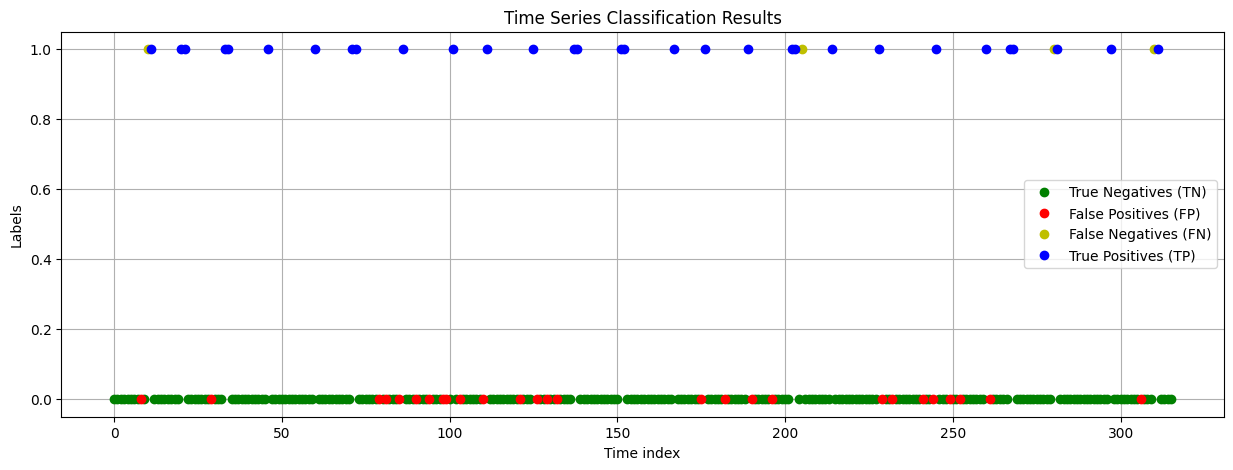

Accuracy: 0.8867088607594936
F1 Score: 0.6083150984682714


In [9]:
run_idx = 0
windows_per_run = 158
plot_classification_results(predicted_labels[windows_per_run*run_idx: windows_per_run*(run_idx+2)],
                            true_labels[windows_per_run*run_idx: windows_per_run*(run_idx+2)])

# compute performance metrics
accuracy = accuracy_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)


print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

preds.shape=(158,)
pred_labels.shape=(158,)
true_labels.shape=(158,)


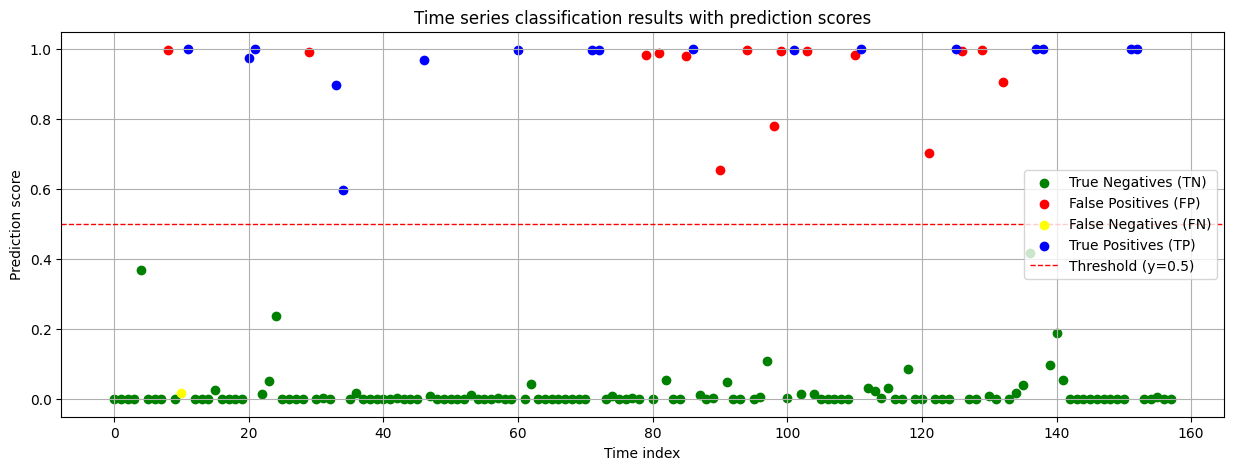

In [10]:
def plot_probabilities(preds, pred_labels, true_labels):
    """
    Plots the time series classification results showing True Negatives, False Positives,
    False Negatives, and True Positives.

    Parameters:
    - preds: The predicted outputs FOR THE POSITIVE CLASS from the model (assumed to be an array or list).
    - pred_labels: The predicted labels (assumed to be an array or list).
    - true_labels: The true labels (assumed to be a numpy array or list).
    """
    
    # Convert inputs to numpy arrays for easier manipulation if they aren't already
    true_labels = np.array(true_labels)
    pred_labels = np.array(pred_labels)

    print(f"{preds.shape=}")
    print(f"{pred_labels.shape=}")
    print(f"{true_labels.shape=}")

    # Define the classifications
    TN = (pred_labels == 0) & (true_labels == 0)
    FP = (pred_labels == 1) & (true_labels == 0)
    FN = (pred_labels == 0) & (true_labels == 1)
    TP = (pred_labels == 1) & (true_labels == 1)

    # Plotting the time series
    time_axis = np.arange(len(true_labels))

    plt.figure(figsize=(15, 5))

    # Plot True Negatives (TN) with green
    plt.scatter(time_axis[TN], preds[TN], color='green', label="True Negatives (TN)")

    # Plot False Positives (FP) with red
    plt.scatter(time_axis[FP], preds[FP], color='red', label="False Positives (FP)")

    # Plot False Negatives (FN) with yellow
    plt.scatter(time_axis[FN], preds[FN], color='yellow', label="False Negatives (FN)")

    # Plot True Positives (TP) with blue
    plt.scatter(time_axis[TP], preds[TP], color='blue', label="True Positives (TP)")

    # Add a dotted red line at y=0.5
    plt.axhline(y=0.5, color='red', linestyle='--', linewidth=1, label="Threshold (y=0.5)")

    plt.xlabel("Time index")
    plt.ylabel("Prediction score")
    plt.grid()
    plt.title("Time series classification results with prediction scores")
    plt.legend(loc='best')
    # plt.show()

def plot_classification_results(pred_labels, true_labels):
    """
    Plots the time series classification results showing True Negatives, False Positives,
    False Negatives, and True Positives.

    Parameters:
    - preds: The predicted outputs from the model (assumed to be a tensor).
    - true_labels: The true labels (assumed to be a numpy array).
    """

    # Define the classifications
    TN = (pred_labels == 0) & (true_labels == 0)
    FP = (pred_labels == 1) & (true_labels == 0)
    FN = (pred_labels == 0) & (true_labels == 1)
    TP = (pred_labels == 1) & (true_labels == 1)

    # Plotting the time series
    time_axis = np.arange(len(true_labels))

    plt.figure(figsize=(15, 5))

    # Plot True Negatives (TN)
    plt.plot(time_axis[TN], true_labels[TN], 'go', label="True Negatives (TN)")

    # Plot False Positives (FP)
    plt.plot(time_axis[FP], true_labels[FP], 'ro', label="False Positives (FP)")

    # Plot False Negatives (FN)
    plt.plot(time_axis[FN], true_labels[FN], 'yo', label="False Negatives (FN)")

    # Plot True Positives (TP)
    plt.plot(time_axis[TP], true_labels[TP], 'bo', label="True Positives (TP)")

    plt.xlabel("Time index")
    plt.ylabel("Labels")
    plt.grid()
    plt.title("Time Series Classification Results")
    plt.legend()
    plt.show()

run_idx = 0
windows_per_run = 158
plot_probabilities(prediction_scores[run_idx*windows_per_run : (run_idx+1)*windows_per_run, 1], 
                   predicted_labels[run_idx*windows_per_run : (run_idx+1)*windows_per_run], true_labels[run_idx*windows_per_run : (run_idx+1)*windows_per_run])

## Extend the predictions score from windows to samples

mahalanobis_distances.shape=(40, 12000); extend_predictions_scores.shape=(474000,); extend_predicted_labels.shape=(474000,); true_labels.shape=(3160,)
preds.shape=(11700,)
pred_labels.shape=(11700,)
true_labels.shape=(11700,)


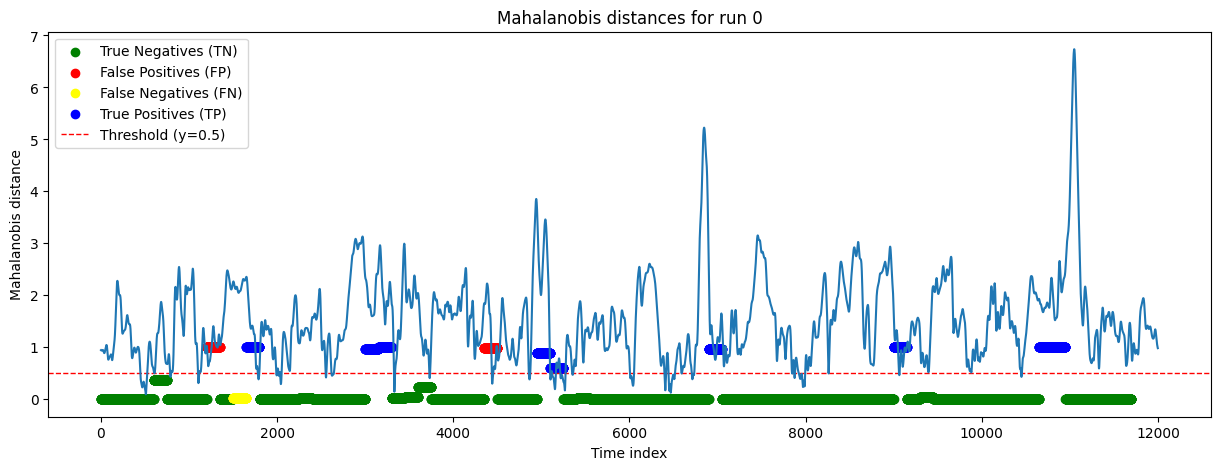

In [11]:
def extend_predictions(prediction_scores, predicted_labels, window_size=150):
    """
    Extends the predictions to the original time series length by repeating the predictions
    for each window.

    Parameters:
    - prediction_scores: The prediction scores from the model (assumed to be a numpy array).
    - predicted_labels: The predicted labels from the model (assumed to be a numpy array).
    - window_size: The size of the window used for prediction.

    Returns:
    - extended_prediction_scores: The prediction scores extended to the original time series length.
    - extended_predicted_labels: The predicted labels extended to the original time series length.
    """

    # Extend the prediction scores
    extended_prediction_scores = np.repeat(prediction_scores, window_size)

    # Extend the predicted labels
    extended_predicted_labels = np.repeat(predicted_labels, window_size)

    return extended_prediction_scores, extended_predicted_labels

def clip_mahalanobis_distances(mahalanobis_distances, window_size, run_length):
    """
    Clips the Mahalanobis distances to match the shape of the prediction scores.
    """
    # Compute the number of windows (the number that has to be clipped)
    clip_number = run_length % window_size

    # the first element of each column correspond to the element lost due to deriving
    mahalanobis_distances_clipped = mahalanobis_distances[:, 1:]

    if clip_number != 0:
        mahalanobis_distances_clipped = mahalanobis_distances_clipped[:, :-clip_number]
    
    return mahalanobis_distances_clipped

# now we would like to compare the predictions between the mahalanobis distances and the prediction scores
extend_predictions_scores, extend_predicted_labels = extend_predictions(prediction_scores[:,1], predicted_labels, window_size=150)

print(f"{mahalanobis_distances.shape=}; {extend_predictions_scores.shape=}; {extend_predicted_labels.shape=}; true_labels.shape={true_labels.shape}")

run_idx = 0
true_labels_rep = np.repeat(true_labels, 150)
windows_per_run = 11700
plot_probabilities(extend_predictions_scores[run_idx*windows_per_run : (run_idx+1)*windows_per_run], 
                   extend_predicted_labels[run_idx*windows_per_run : (run_idx+1)*windows_per_run], true_labels_rep[run_idx*windows_per_run : (run_idx+1)*windows_per_run])
# plot the corresponding run of the Mahalanobis distances
# plt.figure(figsize=(15, 5))
plt.plot(mahalanobis_distances[run_idx])
plt.xlabel("Time index")
plt.ylabel("Mahalanobis distance")
plt.grid()
plt.title("Mahalanobis distances for run {}".format(run_idx))
plt.show()

## Check the performance of the black model

In [12]:
real_changepoints = compute_changepoints(true_labels.reshape(-1, 40))
predicted_changepoints = compute_changepoints(predicted_labels.reshape(-1, 40))

In [13]:
# Example usage with a tolerance of 5 time units
def match_changepoints(true_changepoints, predicted_changepoints, tolerance=5):
    """
    Matches each predicted changepoint to a true changepoint within a tolerance window
    and returns counts of matches for precision and recall calculation.
    """
    # Ensure true_changepoints and predicted_changepoints are lists of individual points
    true_changepoints = list(true_changepoints)
    predicted_changepoints = list(predicted_changepoints)

    true_matched = set()  # Keeps track of matched true changepoints
    pred_matched = set()  # Keeps track of matched predicted changepoints

    # Try to match each predicted changepoint to a true changepoint
    for pred_cp in predicted_changepoints:
        for true_cp in true_changepoints:
            # Check if the difference between pred_cp and true_cp is within tolerance
            if abs(pred_cp - true_cp) <= tolerance and true_cp not in true_matched:
                true_matched.add(true_cp)
                pred_matched.add(pred_cp)
                break  # Move to next predicted changepoint after finding a match
    
    # True positives, predicted positives, and total true changepoints
    true_positives = len(true_matched)
    pred_positives = len(pred_matched)
    total_true = len(true_changepoints)
    total_pred = len(predicted_changepoints)
    
    return true_positives, pred_positives, total_true, total_pred


def compute_precision_recall_f1(true_changepoints, predicted_changepoints, tolerance=5):
    """
    Computes precision, recall, and F1-score for changepoint detection based on
    matched changepoints within a given tolerance window.
    """
    true_positives, _, total_true, total_pred = match_changepoints(
        true_changepoints, predicted_changepoints, tolerance
    )
    
    # Precision: fraction of predicted changepoints that are correct
    precision = true_positives / total_pred if total_pred > 0 else 0
    
    # Recall: fraction of true changepoints that are correctly predicted
    recall = true_positives / total_true if total_true > 0 else 0
    
    # F1 Score: harmonic mean of precision and recall
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return precision, recall, f1_score

def compute_total_precision_recall_f1(real_changepoints, predicted_changepoints, tolerance=5):
    total_precision = 0
    total_recall = 0
    total_f1_score = 0
    for real_cp, pred_cp in zip(real_changepoints, predicted_changepoints):
        precision, recall, f1_score = compute_precision_recall_f1(real_cp, pred_cp, tolerance)
        total_precision += precision
        total_recall += recall
        total_f1_score += f1_score

    return total_precision / len(real_changepoints), total_recall / len(real_changepoints), total_f1_score / len(real_changepoints)

tolerances = np.arange(0,10,1)
total_precisions, total_recalls, total_f1_scores = [], [], []
for tolerance in tolerances:
    total_precision, total_recall, total_f1_score = compute_total_precision_recall_f1(real_changepoints, predicted_changepoints, tolerance=tolerance)
    total_precisions.append(total_precision)
    total_recalls.append(total_recall)
    total_f1_scores.append(total_f1_score)
    print(f"tolerance: {tolerance}, precision: {np.round(total_precision,3)}, recall: {np.round(total_recall,3)}, f1 score: {np.round(total_f1_score,3)}")
# total_precision, total_recall, total_f1_score = compute_total_precision_recall_f1(real_changepoints, predicted_changepoints, tolerance=1)
# print(f"precision: {np.round(total_precision,3)}, recall: {np.round(total_recall,3)}, f1 score: {np.round(total_f1_score,3)}")

tolerance: 0, precision: 0.451, recall: 0.729, f1 score: 0.547
tolerance: 1, precision: 0.525, recall: 0.843, f1 score: 0.635
tolerance: 2, precision: 0.556, recall: 0.893, f1 score: 0.673
tolerance: 3, precision: 0.568, recall: 0.909, f1 score: 0.687
tolerance: 4, precision: 0.573, recall: 0.916, f1 score: 0.692
tolerance: 5, precision: 0.583, recall: 0.934, f1 score: 0.705
tolerance: 6, precision: 0.592, recall: 0.947, f1 score: 0.716
tolerance: 7, precision: 0.594, recall: 0.95, f1 score: 0.718
tolerance: 8, precision: 0.599, recall: 0.956, f1 score: 0.723
tolerance: 9, precision: 0.604, recall: 0.964, f1 score: 0.729


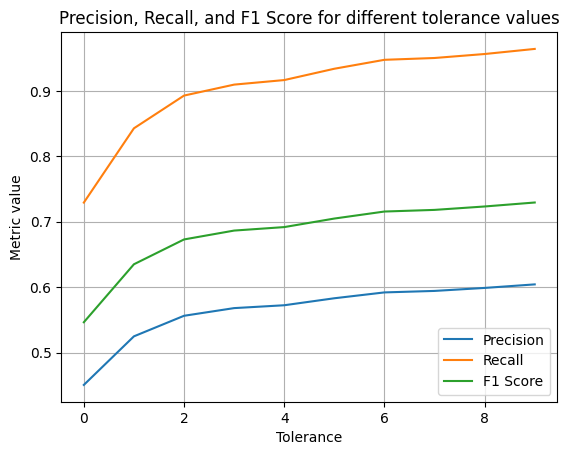

In [14]:
plt.plot(tolerances, total_precisions, label="Precision")
plt.plot(tolerances, total_recalls, label="Recall")
plt.plot(tolerances, total_f1_scores, label="F1 Score")
plt.xlabel("Tolerance")
plt.ylabel("Metric value")
plt.grid()
plt.title("Precision, Recall, and F1 Score for different tolerance values")
plt.legend()
plt.show()


In [15]:
print(real_changepoints[0])
print(predicted_changepoints[0])

[ 7  9 19 22 36 39 44 63]
[10 19 22 35 39 44 46 53 63 67 71]


## Play with whitebox model


In [16]:
whitebox_labels = np.load(r'/home/mihai/Thesis/Data/Models/distraction_start_timesample_list.npy', allow_pickle=True)

In [17]:
whitebox_cp_predictions = [np.array(cps) // 150 for cps in whitebox_labels]
print(whitebox_cp_predictions[0])
print(real_changepoints[0])

total_precision, total_recall, total_f1_score = compute_total_precision_recall_f1(real_changepoints, whitebox_cp_predictions, tolerance=1)
print(f"precision: {np.round(total_precision,3)}, recall: {np.round(total_recall,3)}, f1 score: {np.round(total_f1_score,3)}")

[18 21 22 32 40 41 45 49 55 56 59 63 72]
[ 7  9 19 22 36 39 44 63]
precision: 0.228, recall: 0.501, f1 score: 0.305


## Do the same but with the model with overlap

In [18]:
prediction_scores_overlap = np.loadtxt("predicted_scores_overlap_50.csv", delimiter=',')
predicted_labels_overlap = np.loadtxt("predicted_labels_overlap_50.csv", delimiter=',')
true_labels_overlap = np.loadtxt("true_labels_overlap_50.csv", delimiter=',')
tc_test = np.loadtxt(r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDPE/mdist.csv', delimiter=',')

smoothed: precision: 0.854, recall: 0.369, f1 score: 0.507 

vanilla: precision: 0.442, recall: 0.34, f1 score: 0.368

White box detector w/o x and derivatives: precision: 0.253, recall: 0.18, f1 score: 0.201
White box detector with x and derivatives: Total precision = 0.47, Total recall = 0.42, Total F1 Score = 0.45

In [19]:
# if a label is 1 but its both labels to its left and right are 0, then it is a false positive
# smooth this way predicted_labels_overlap
def smooth_predictions(predicted_labels):
    predicted_labels_smoother = np.copy(predicted_labels)
    for i in range(1, len(predicted_labels)-1):
        if predicted_labels[i] == 1 and (predicted_labels[i-1] == 0 and predicted_labels[i+1] == 0):
            predicted_labels_smoother[i] = 0 

    return predicted_labels_smoother

predicted_labels_overlap_smoother = smooth_predictions(predicted_labels_overlap)

real_changepoints = compute_changepoints(true_labels_overlap.reshape(-1, 40))
predicted_changepoints = compute_changepoints(predicted_labels_overlap_smoother.reshape(-1, 40))

total_precision, total_recall, total_f1_score = compute_total_precision_recall_f1(real_changepoints, predicted_changepoints, tolerance=1)
print(f"precision: {np.round(total_precision,3)}, recall: {np.round(total_recall,3)}, f1 score: {np.round(total_f1_score,3)}")

precision: 0.624, recall: 0.717, f1 score: 0.661


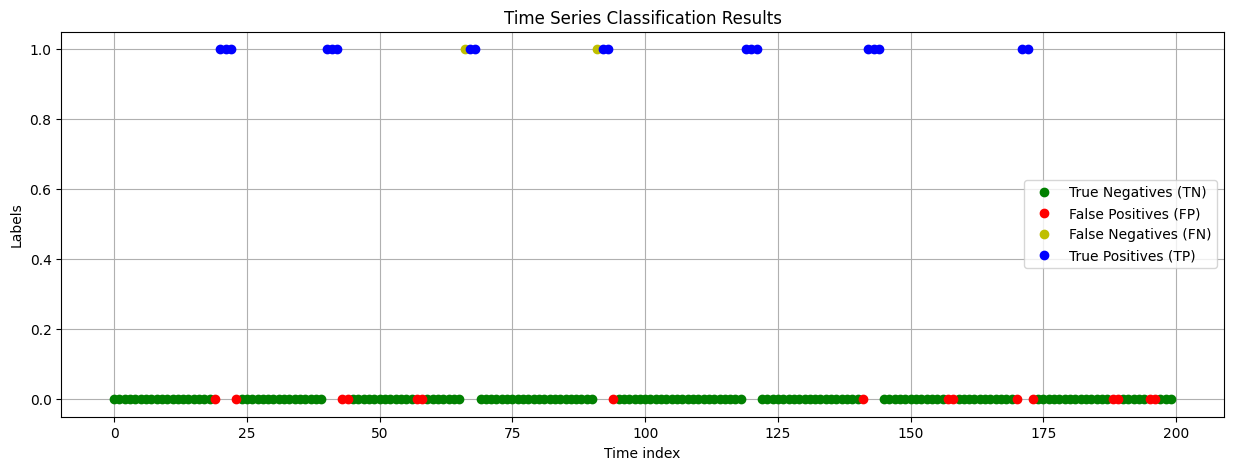

[0. 1. 0. 0. 0. 0. 0. 1. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
[0. 0. 0. 0. 0. 0. 1. 1. 1. 0.]


In [20]:
plot_classification_results(predicted_labels_overlap_smoother[:200], true_labels_overlap[:200])
print(predicted_labels_overlap[60:70])
print(predicted_labels_overlap_smoother[60:70])
print(true_labels_overlap[60:70])

## Experiment varying the threshold

precision: 0.0, recall: 0.0, f1 score: 0.0
precision: 0.373, recall: 0.754, f1 score: 0.492
precision: 0.403, recall: 0.785, f1 score: 0.526
precision: 0.423, recall: 0.79, f1 score: 0.544
precision: 0.435, recall: 0.792, f1 score: 0.555
precision: 0.451, recall: 0.799, f1 score: 0.57
precision: 0.468, recall: 0.803, f1 score: 0.585
precision: 0.473, recall: 0.802, f1 score: 0.589
precision: 0.482, recall: 0.805, f1 score: 0.596
precision: 0.485, recall: 0.804, f1 score: 0.598
precision: 0.488, recall: 0.808, f1 score: 0.602
precision: 0.494, recall: 0.801, f1 score: 0.604
precision: 0.499, recall: 0.801, f1 score: 0.608
precision: 0.506, recall: 0.801, f1 score: 0.614
precision: 0.511, recall: 0.799, f1 score: 0.617
precision: 0.512, recall: 0.792, f1 score: 0.616
precision: 0.514, recall: 0.784, f1 score: 0.615
precision: 0.52, recall: 0.786, f1 score: 0.62
precision: 0.529, recall: 0.786, f1 score: 0.625
precision: 0.532, recall: 0.785, f1 score: 0.627
precision: 0.535, recall: 0.78

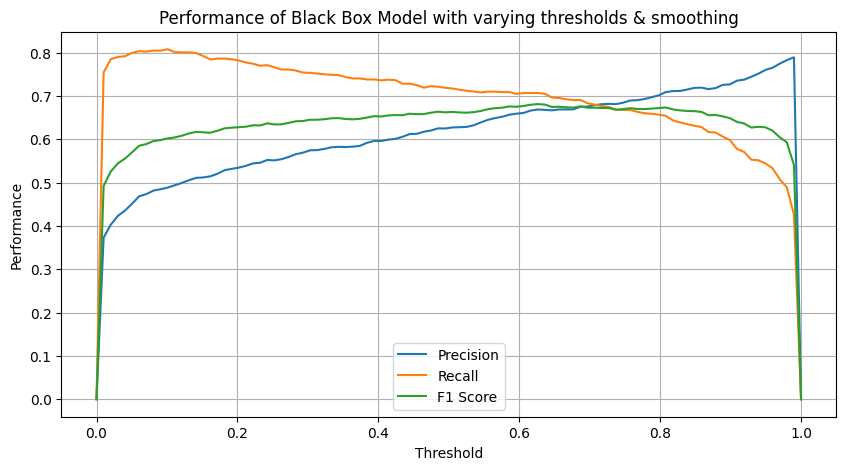

In [21]:
thresholds = np.linspace(0, 1, 100)
precisions, recalls, f1_scores = [], [], []
for threshold in thresholds:
    predicted_labels_threshold = (prediction_scores_overlap[:, 1] > threshold).astype(int)
    predicted_labels_threshold_smoothed = smooth_predictions(predicted_labels_threshold)
    predicted_changepoints_threshold = compute_changepoints(predicted_labels_threshold_smoothed.reshape(-1, 40))


    precision, recall, f1_score = compute_total_precision_recall_f1(real_changepoints, predicted_changepoints_threshold, tolerance=1)
    print(f"precision: {np.round(precision,3)}, recall: {np.round(recall,3)}, f1 score: {np.round(f1_score,3)}")
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

plt.figure(figsize=(10, 5))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Performance')
plt.legend()
plt.grid()
plt.title('Performance of Black Box Model with varying thresholds & smoothing')
plt.show()

## Train the meta-detector

In [44]:
mahalanobis_distances = np.loadtxt("distances_per_run.csv", delimiter=',')
clipped_md = clip_mahalanobis_distances(mahalanobis_distances, window_size=150, run_length=11999)
tc_test_clipped = clip_mahalanobis_distances(tc_test.transpose(), window_size=150, run_length=11999)
extend_predictions_scores_reshaped = extend_predictions_scores.reshape(40,-1)

FileNotFoundError: distances_per_run.csv not found.

In [ ]:
# Map your data to predictions and labels
blackbox_predictions = extend_predictions_scores_reshaped.flatten()  # Step-level predictions
whitebox_predictions = clipped_md.flatten()  # Window-level predictions
true_labels = tc_test_clipped.flatten()  # True labels


# Create a DataFrame for easy handling
data = pd.DataFrame({
    'step_predictions': blackbox_predictions,
    'window_predictions': whitebox_predictions,
    'true_labels': true_labels
})

# Split data into training and testing sets
X = data[['step_predictions', 'window_predictions']]  # Predictor variables
y = data['true_labels']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the meta-model
meta_model = LogisticRegression(class_weight='balanced')
meta_model.fit(X_train, y_train)

# Predict on the test set and evaluate accuracy
final_predictions = meta_model.predict(X_test)
accuracy = accuracy_score(y_test, final_predictions)
print(f'Stacking Ensemble Accuracy: {accuracy:.2f}')

# Generate and print a detailed classification report
print(classification_report(y_test, final_predictions))

Stacking Ensemble Accuracy: 0.78
              precision    recall  f1-score   support

         0.0       0.97      0.79      0.87    137368
         1.0       0.06      0.35      0.10      4832

    accuracy                           0.78    142200
   macro avg       0.51      0.57      0.49    142200
weighted avg       0.94      0.78      0.85    142200



In [ ]:
# Evaluate step_predictions as a standalone classifier
blackbox_predictions_binary = (blackbox_predictions > 0.5).astype(int)  # Convert probabilities to binary labels
blackbox_accuracy = accuracy_score(true_labels, blackbox_predictions_binary)
print("Performance of Black Box Classifier:")
print(f"Accuracy: {blackbox_accuracy:.2f}")
print(classification_report(true_labels, blackbox_predictions_binary))

# Evaluate window_predictions as a standalone classifier
whitebox_predictions_binary = (whitebox_predictions > 0.5).astype(int)  # Convert probabilities to binary labels
whitebox_accuracy = accuracy_score(true_labels, whitebox_predictions_binary)
print("\nPerformance of White Box Classifier:")
print(f"Accuracy: {whitebox_accuracy:.2f}")
print(classification_report(true_labels, whitebox_predictions_binary))

Performance of Black Box Classifier:
Accuracy: 0.81
              precision    recall  f1-score   support

         0.0       0.97      0.83      0.89    457894
         1.0       0.06      0.30      0.10     16106

    accuracy                           0.81    474000
   macro avg       0.51      0.57      0.50    474000
weighted avg       0.94      0.81      0.87    474000


Performance of White Box Classifier:
Accuracy: 0.12
              precision    recall  f1-score   support

         0.0       0.97      0.10      0.18    457894
         1.0       0.03      0.91      0.07     16106

    accuracy                           0.12    474000
   macro avg       0.50      0.50      0.12    474000
weighted avg       0.94      0.12      0.17    474000



## Try to combine the detected changepoints

In [ ]:
whitebox_changepoints = np.load(r'/home/mihai/Thesis/Data/Models/distraction_start_timesample_list.npy', allow_pickle=True)
whitebox_cp_windows = [np.array(cps) // 150 for cps in whitebox_changepoints]
blackbox_predicted_scores = np.loadtxt("prediction_scores.csv", delimiter=',')
blackbox_true_labels = np.loadtxt("true_labels.csv", delimiter=',')

blackbox_predicted_labels = (blackbox_predicted_scores[:, 1] > 0.7).astype(int)
blackbox_predicted_labels_per_run = blackbox_predicted_labels.reshape(40, -1)
blackbox_true_labels_per_run = blackbox_true_labels.reshape(40, -1)

# combine the two predictions: if the whitebox and blackbox agree with a tollerance of 1, then the prediction is 1
combined_predictions = np.zeros_like(blackbox_predicted_labels_per_run)

combined_predictions = combined_predictions.flatten()
true_labels = tc_test_clipped.flatten()

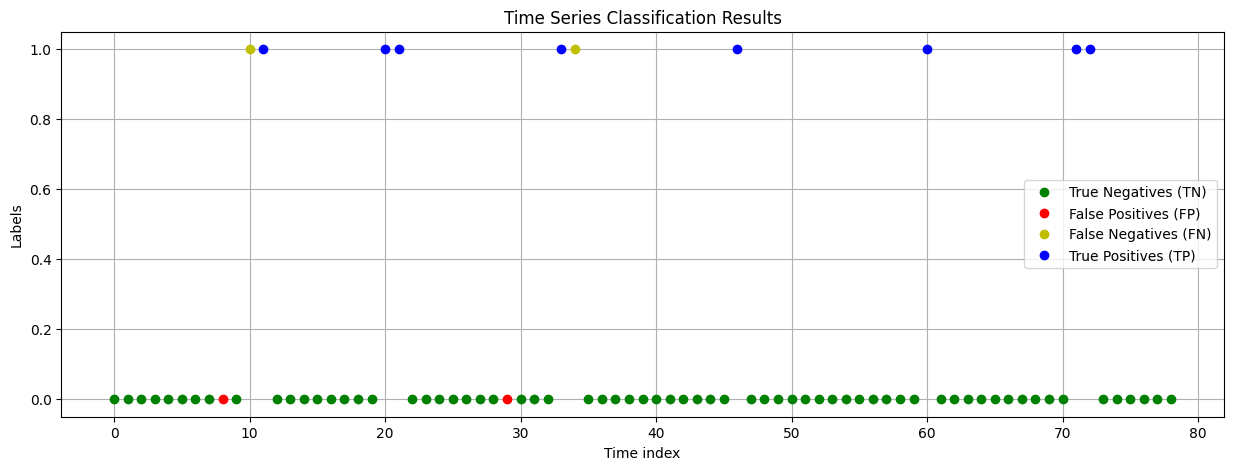

In [ ]:
# Plot results for a specific run
plot_classification_results(blackbox_predicted_labels_per_run[0], blackbox_true_labels_per_run[0])  # Replace with desired run index

In [27]:
# Calculate counts for each category across all runs in a single pass
total_TN = np.sum((combined_predictions == 0) & (blackbox_true_labels_per_run == 0))
total_FP = np.sum((combined_predictions == 1) & (blackbox_true_labels_per_run == 0))
total_FN = np.sum((combined_predictions == 0) & (blackbox_true_labels_per_run == 1))
total_TP = np.sum((combined_predictions == 1) & (blackbox_true_labels_per_run == 1))

print(np.sum(combined_predictions))
print(np.sum(blackbox_true_labels_per_run))

# Print out the results
print("Total counts across all runs:")
print(f"True Negatives (TN): {total_TN}")
print(f"False Positives (FP): {total_FP}")
print(f"False Negatives (FN): {total_FN}")
print(f"True Positives (TP): {total_TP}")


NameError: name 'blackbox_true_labels_per_run' is not defined

In [28]:
smarter_blackbox_predictions = (blackbox_predicted_scores[:, 1] > 0.7).astype(int).reshape(40, -1)

# Calculate counts for each category across all runs in a single pass
total_TN = np.sum((smarter_blackbox_predictions == 0) & (blackbox_true_labels_per_run == 0))
total_FP = np.sum((smarter_blackbox_predictions == 1) & (blackbox_true_labels_per_run == 0))
total_FN = np.sum((smarter_blackbox_predictions == 0) & (blackbox_true_labels_per_run == 1))
total_TP = np.sum((smarter_blackbox_predictions == 1) & (blackbox_true_labels_per_run == 1))

print(np.sum(combined_predictions))
print(np.sum(blackbox_true_labels_per_run))
print(np.sum(smarter_blackbox_predictions))

# Print out the results
print("Total counts across all runs:")
print(f"True Negatives (TN): {total_TN}")
print(f"False Positives (FP): {total_FP}")
print(f"False Negatives (FN): {total_FN}")
print(f"True Positives (TP): {total_TP}")

NameError: name 'blackbox_predicted_scores' is not defined

## Issue:

how to combine the classifiers when the performance of one of them is so poor?

## Compare MD with OCSVM

In [29]:
from joblib import load
from utils import *

error_not_distracted, u_signal_not_distracted, x_signal_not_distracted = process_signals(error_file= r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRN/e.csv', u_file=r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRN/u.csv', x_file=r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRN/x.csv')
error_distracted, u_signal_distracted, x_signal_distracted         = process_signals(error_file= r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDPE/e.csv', u_file=r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDPE/u.csv', x_file=r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDPE/x.csv')
mahalanobis_distances = np.loadtxt("distances_per_run.csv", delimiter=',')
tc_test = np.loadtxt(r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDPE/mdist.csv', delimiter=',')


person_idx = 0

# Load the saved model
ocsvm = load(f'ocsvm_model_{person_idx}.joblib')

# combine the entire list in the priors
error_not_distracted_person = np.concatenate(error_not_distracted[person_idx])
u_not_distracted_person = np.concatenate(u_signal_not_distracted[person_idx])
x_not_distracted_person = np.concatenate(x_signal_not_distracted[person_idx])

# X_not_distracted = np.column_stack((error_not_distracted_person[:-1], u_not_distracted_person[:-1], x_not_distracted_person[:-1]))

X_not_distracted = np.column_stack((error_not_distracted_person[:-1], u_not_distracted_person[:-1]))
                                                                                              
error_distracted_person = np.concatenate(error_distracted[person_idx])
u_distracted_person = np.concatenate(u_signal_distracted[person_idx])
x_distracted_person = np.concatenate(x_signal_distracted[person_idx])

# X_test = np.column_stack((error_distracted_person, u_distracted_person, x_distracted_person))
X_test = np.column_stack((error_distracted_person, u_distracted_person))


FileNotFoundError: distances_per_run.csv not found.

In [ ]:
distances = ocsvm.decision_function(X_test).ravel() 

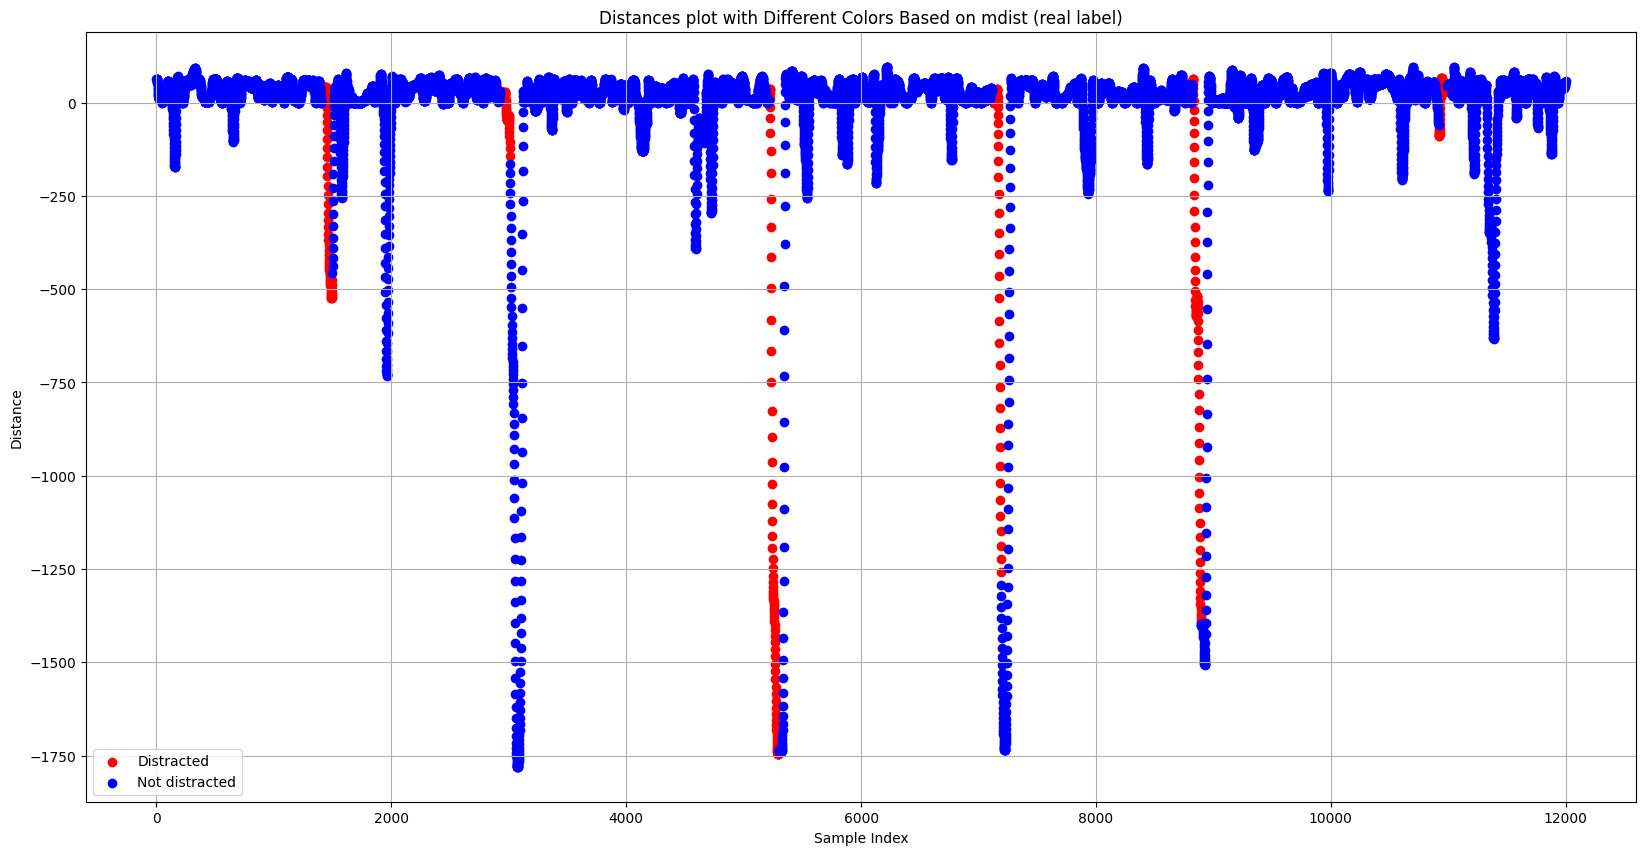

In [ ]:


tc_test_col = tc_test[:, 2]
plot_masked_signal(tc_test_col, distances[24000:36000])

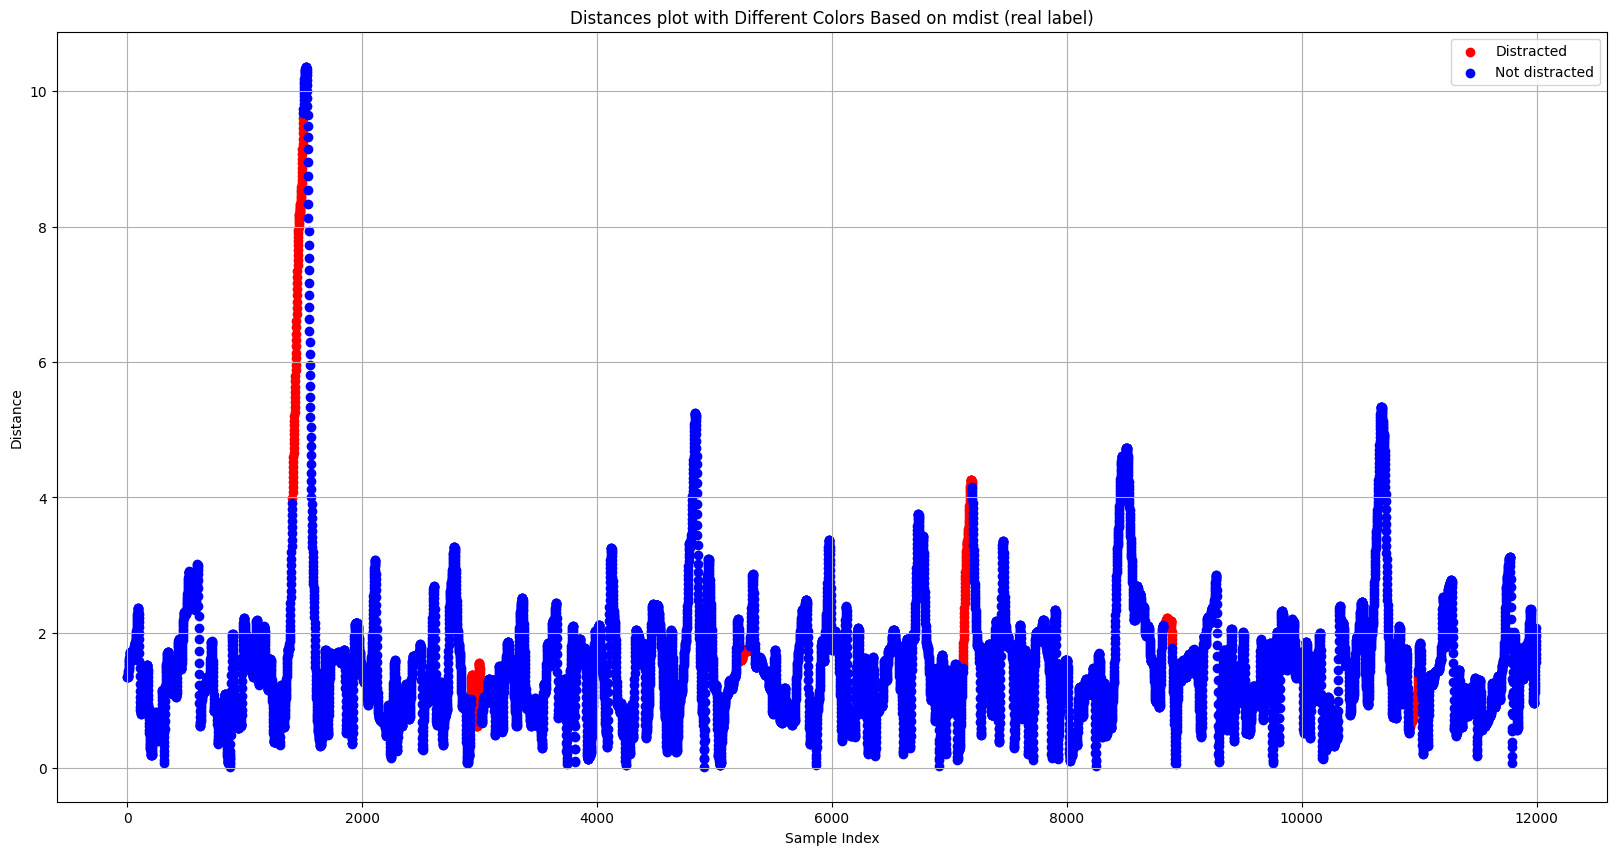

tc_test_col.shape=(12000,); mahalanobis_distances[2,:].shape=(12000,)


In [ ]:
plot_masked_signal(tc_test_col, mahalanobis_distances[2,:])

print(f"{tc_test_col.shape=}; {mahalanobis_distances[2,:].shape=}")

In [30]:
len(error_distracted)
len(error_distracted[0])

4

In [31]:
# Compute the distances according to the OCSVM classifier

distances_all_runs = []

for person_idx in range(10):  # Iterate over people
    ocsvm = load(f'ocsvm_model_{person_idx}.joblib')
    for person_run in range(4):  # Iterate over runs per person
        # Ensure correct slicing or indexing
        X_test = np.column_stack((
            error_distracted[person_idx][person_run],
            u_signal_distracted[person_idx][person_run]
        ))
        
        distances = ocsvm.decision_function(X_test).ravel()
        print(f"Person {person_idx}, Run {person_run}: {distances.shape}")
        distances_all_runs.append(distances)

# Convert distances_all_runs to a single array for saving
distances_all_runs = np.array(distances_all_runs)

# Save the results
np.savetxt('distances_ocsvm.csv', distances_all_runs, delimiter=',', fmt='%s')


Person 0, Run 0: (12000,)
Person 0, Run 1: (12000,)
Person 0, Run 2: (12000,)
Person 0, Run 3: (12000,)
Person 1, Run 0: (12000,)
Person 1, Run 1: (12000,)
Person 1, Run 2: (12000,)
Person 1, Run 3: (12000,)
Person 2, Run 0: (12000,)
Person 2, Run 1: (12000,)
Person 2, Run 2: (12000,)
Person 2, Run 3: (12000,)
Person 3, Run 0: (12000,)
Person 3, Run 1: (12000,)
Person 3, Run 2: (12000,)
Person 3, Run 3: (12000,)
Person 4, Run 0: (12000,)
Person 4, Run 1: (12000,)
Person 4, Run 2: (12000,)
Person 4, Run 3: (12000,)
Person 5, Run 0: (12000,)
Person 5, Run 1: (12000,)
Person 5, Run 2: (12000,)
Person 5, Run 3: (12000,)
Person 6, Run 0: (12000,)
Person 6, Run 1: (12000,)
Person 6, Run 2: (12000,)
Person 6, Run 3: (12000,)
Person 7, Run 0: (12000,)
Person 7, Run 1: (12000,)
Person 7, Run 2: (12000,)
Person 7, Run 3: (12000,)
Person 8, Run 0: (12000,)
Person 8, Run 1: (12000,)
Person 8, Run 2: (12000,)
Person 8, Run 3: (12000,)
Person 9, Run 0: (12000,)
Person 9, Run 1: (12000,)
Person 9, Ru

In [32]:
error_distracted = np.loadtxt(r"/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDPE/e.csv", delimiter=',')
u_signal_distracted = np.loadtxt(r"/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDPE/u.csv", delimiter=',')
tc_test = np.loadtxt(r"/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDPE/mdist.csv", delimiter=',')

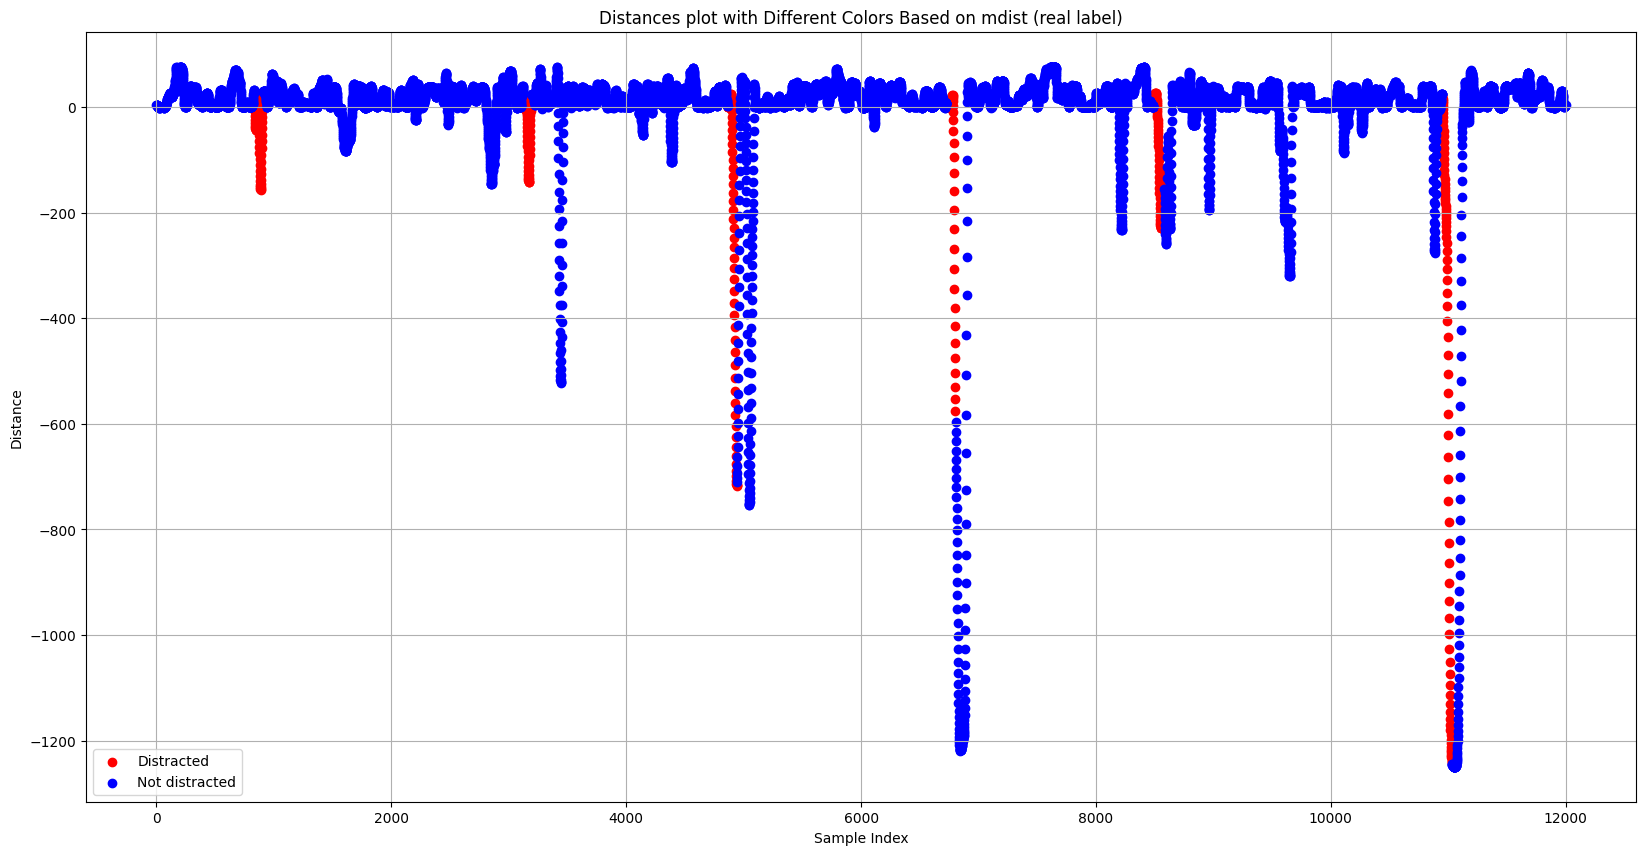

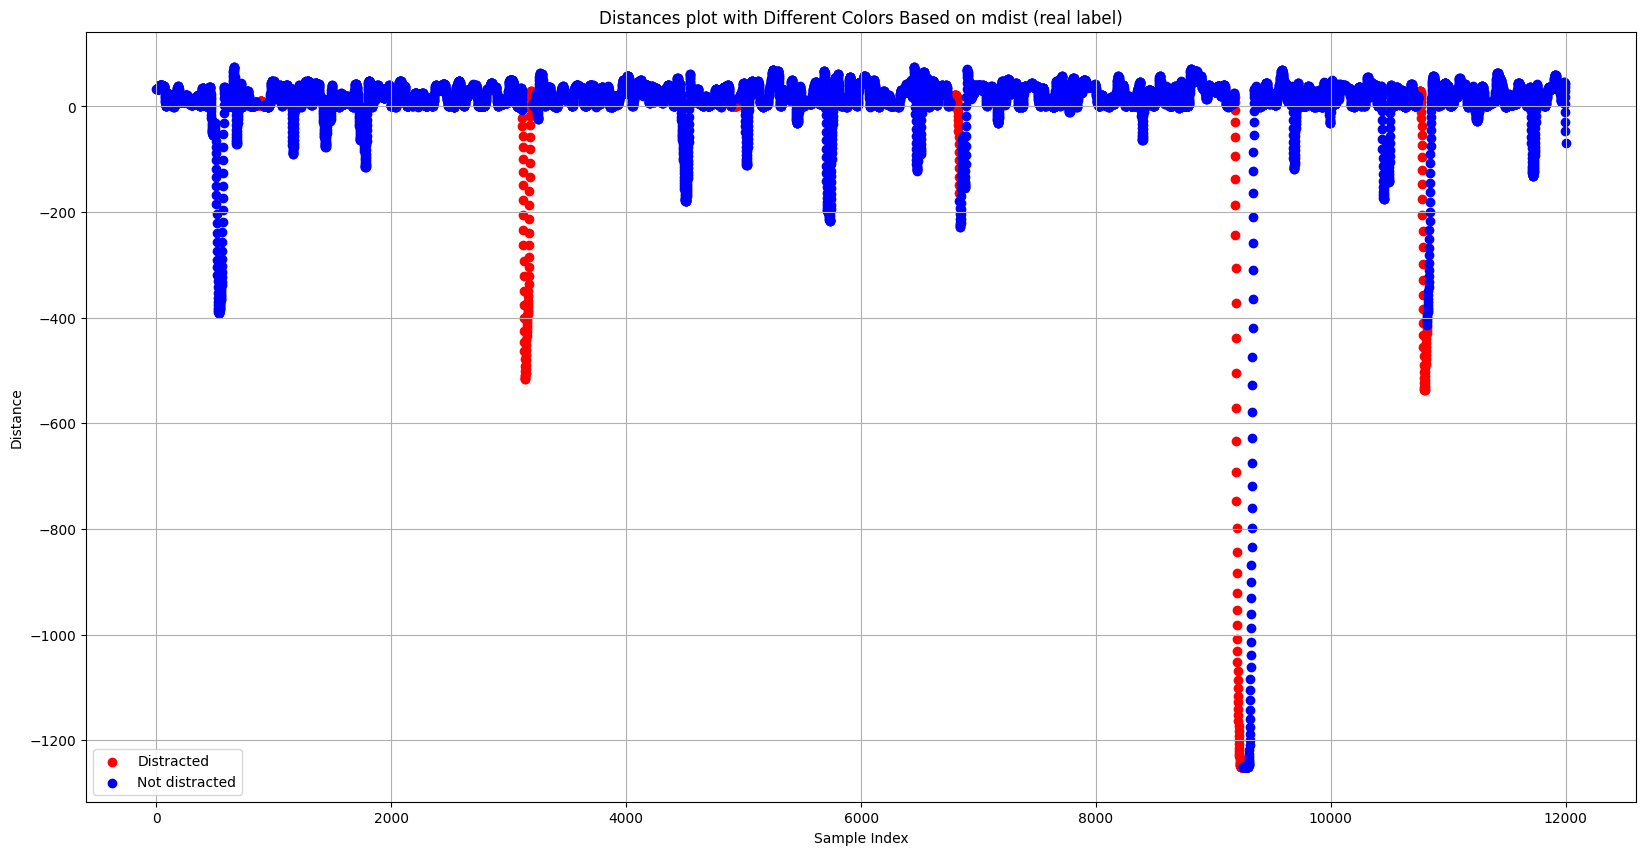

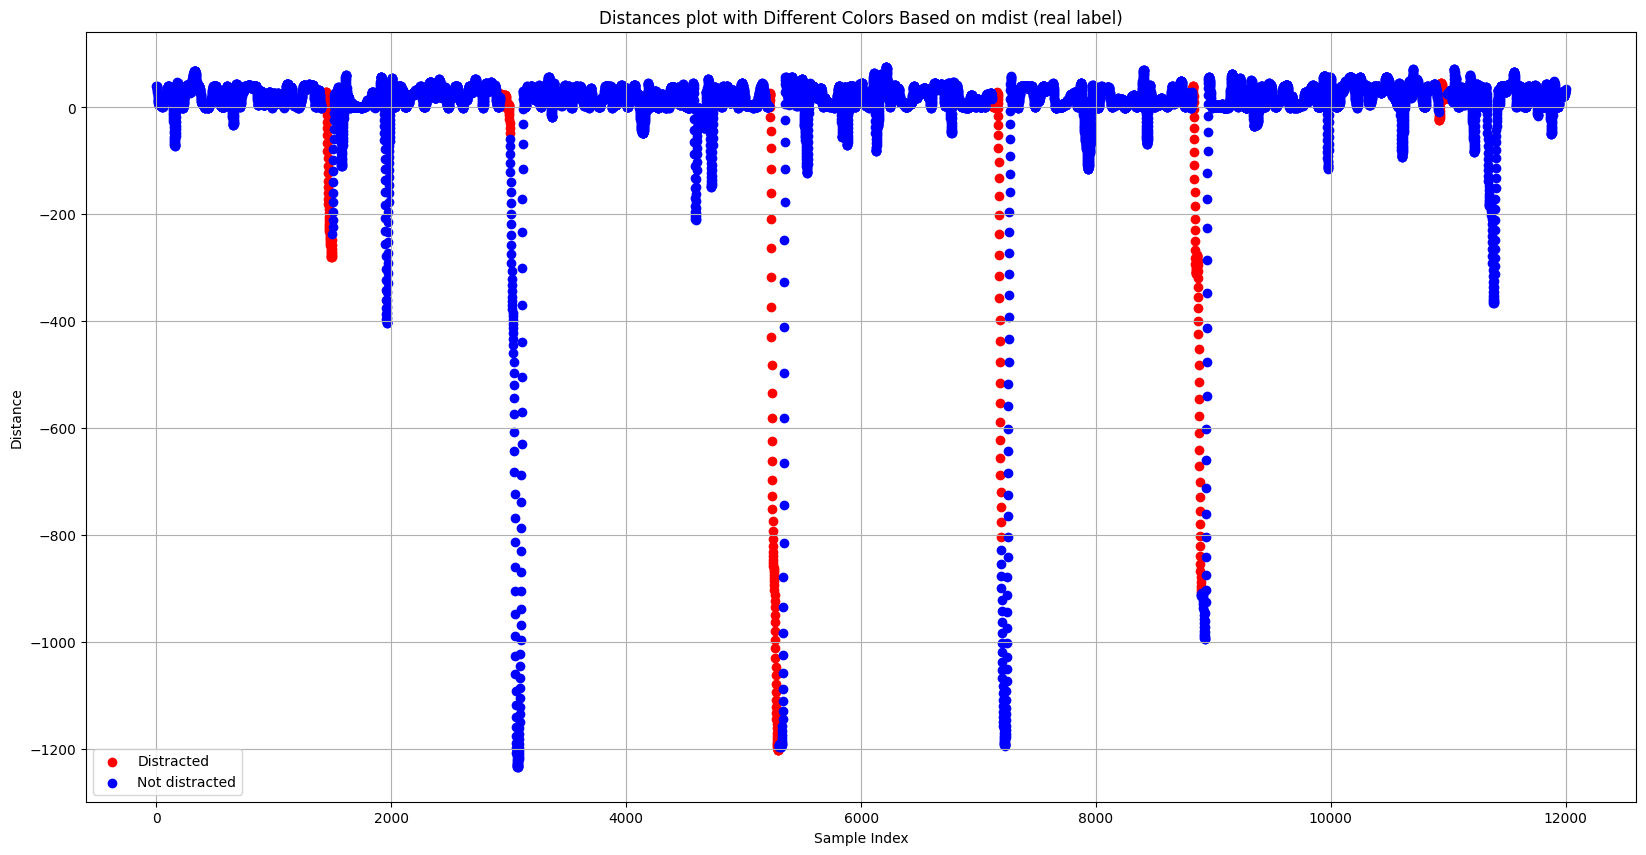

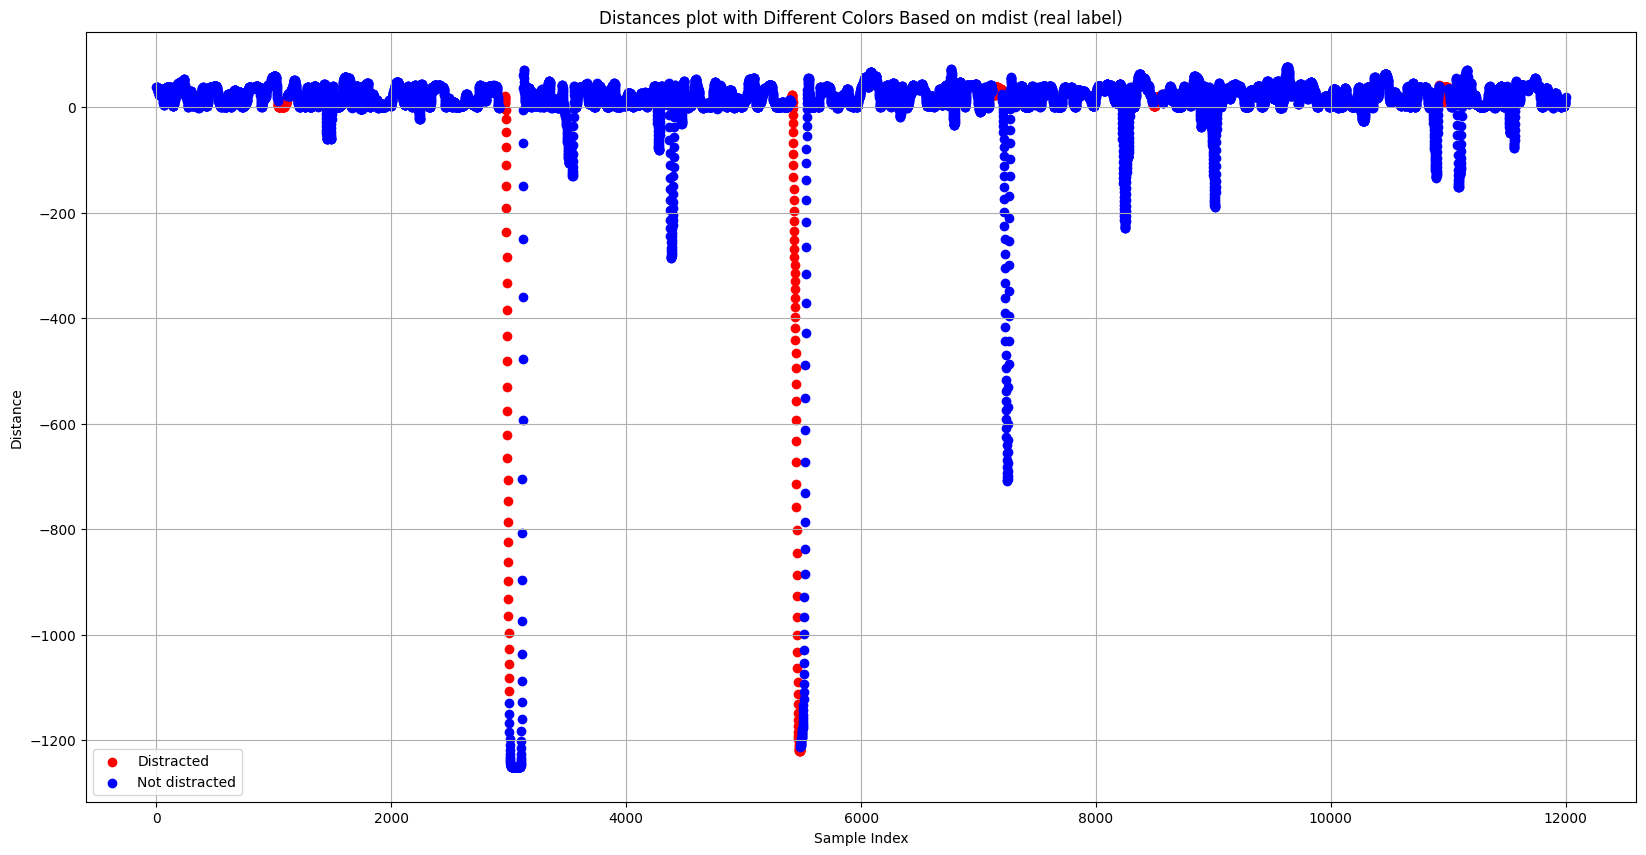

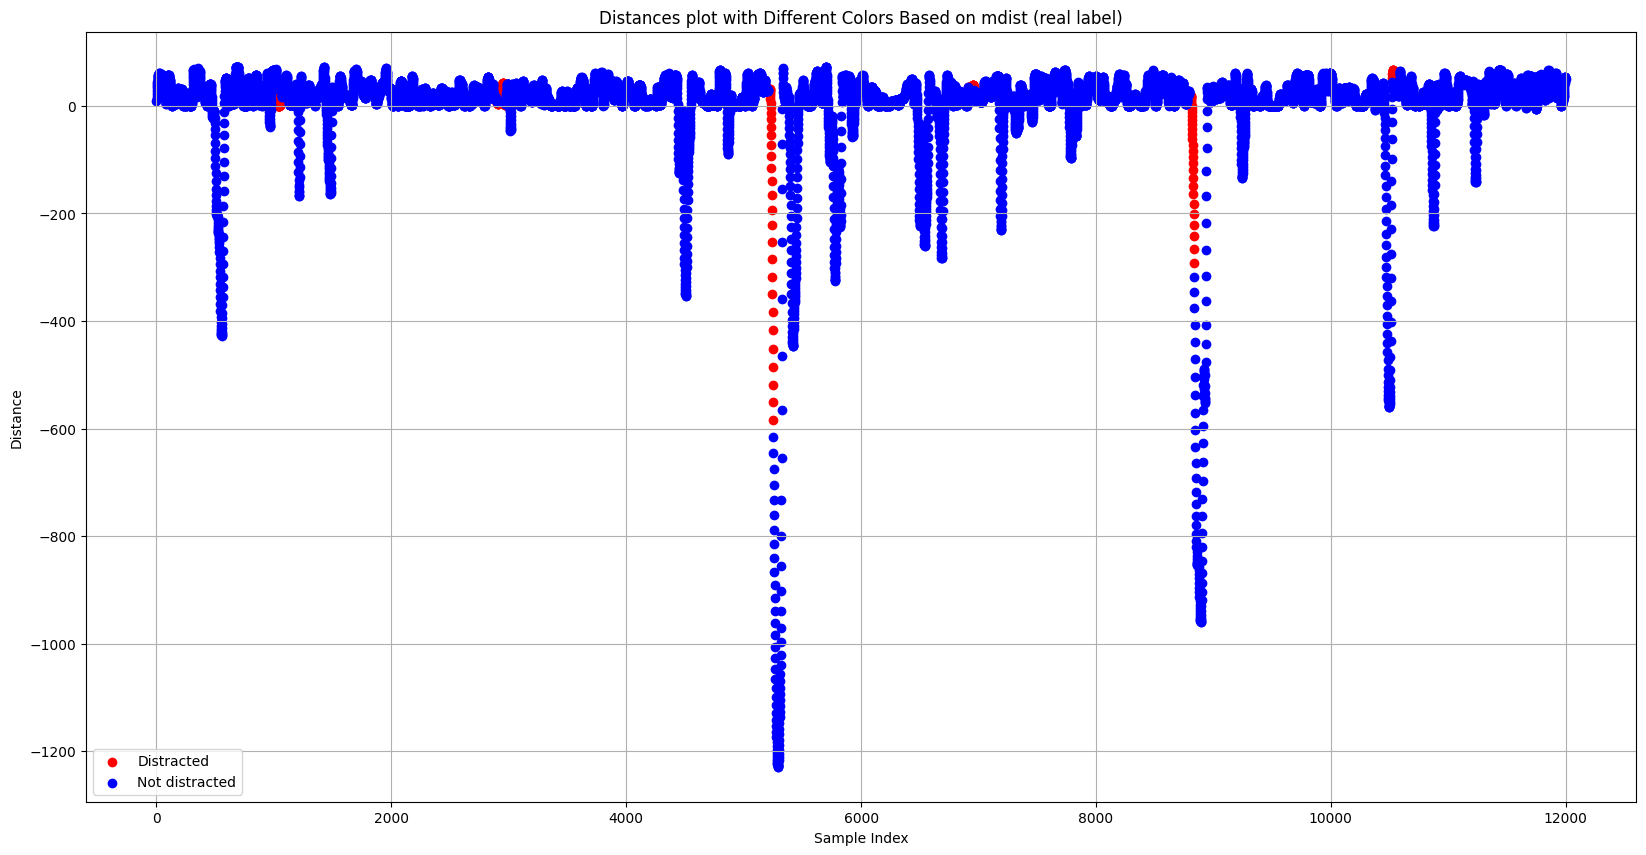

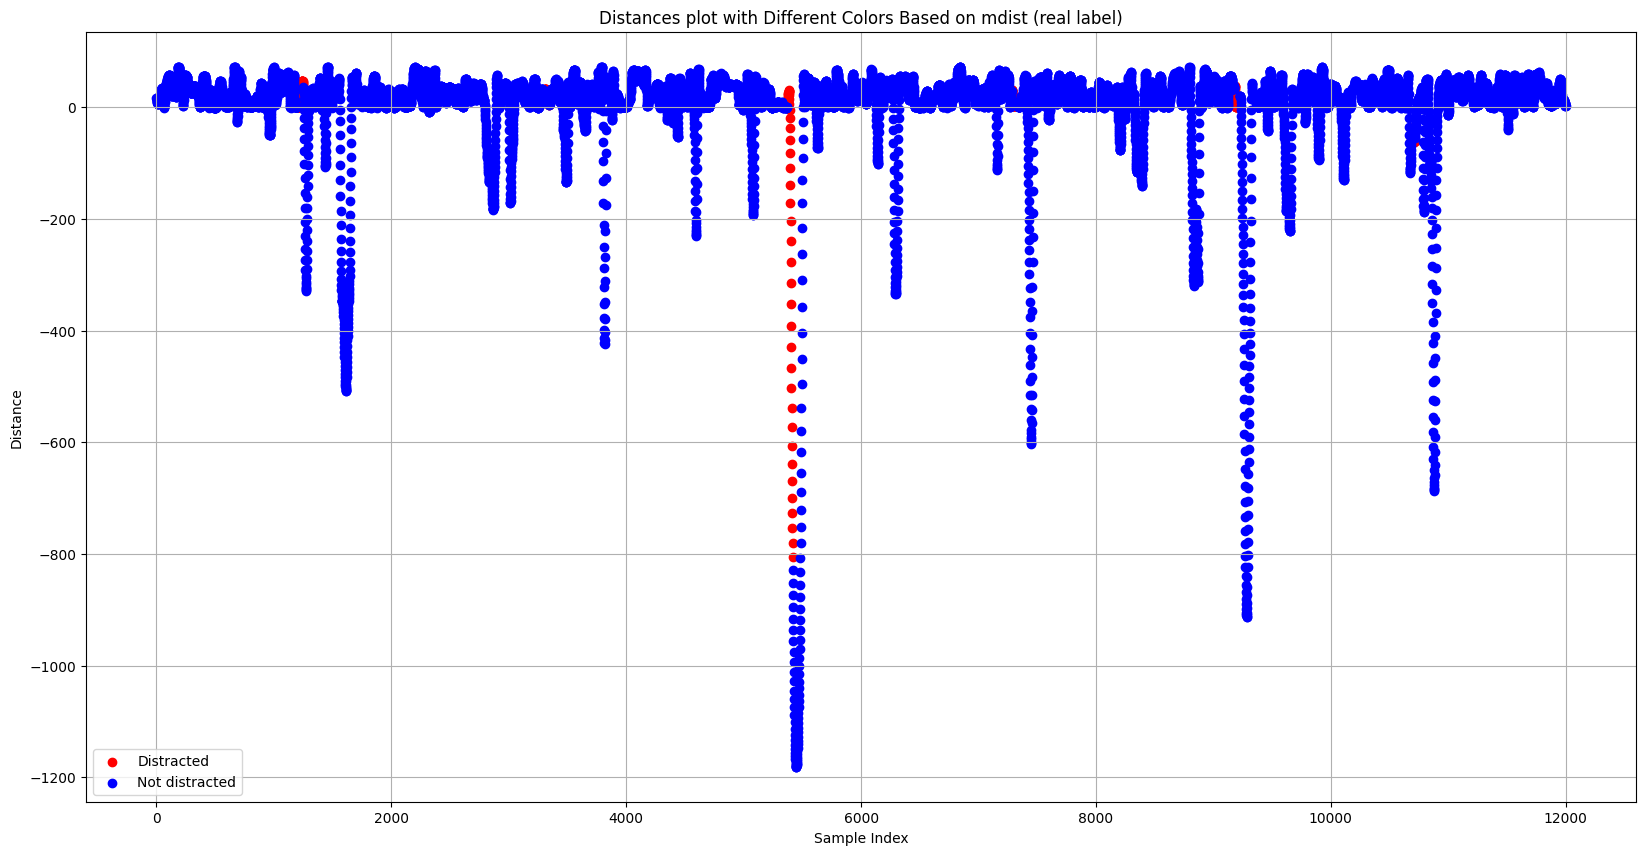

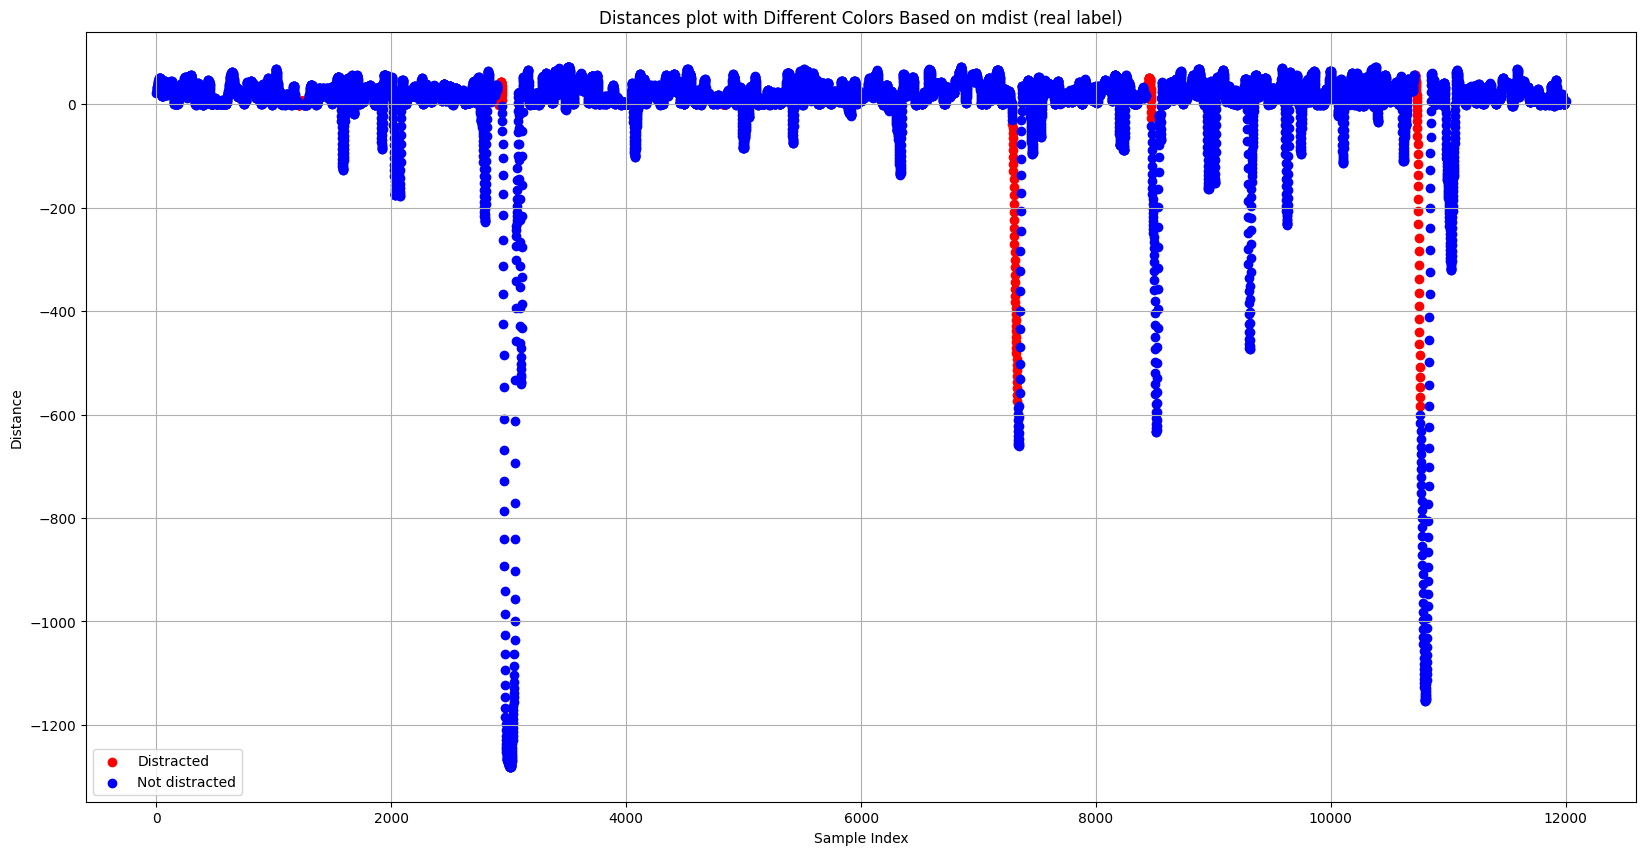

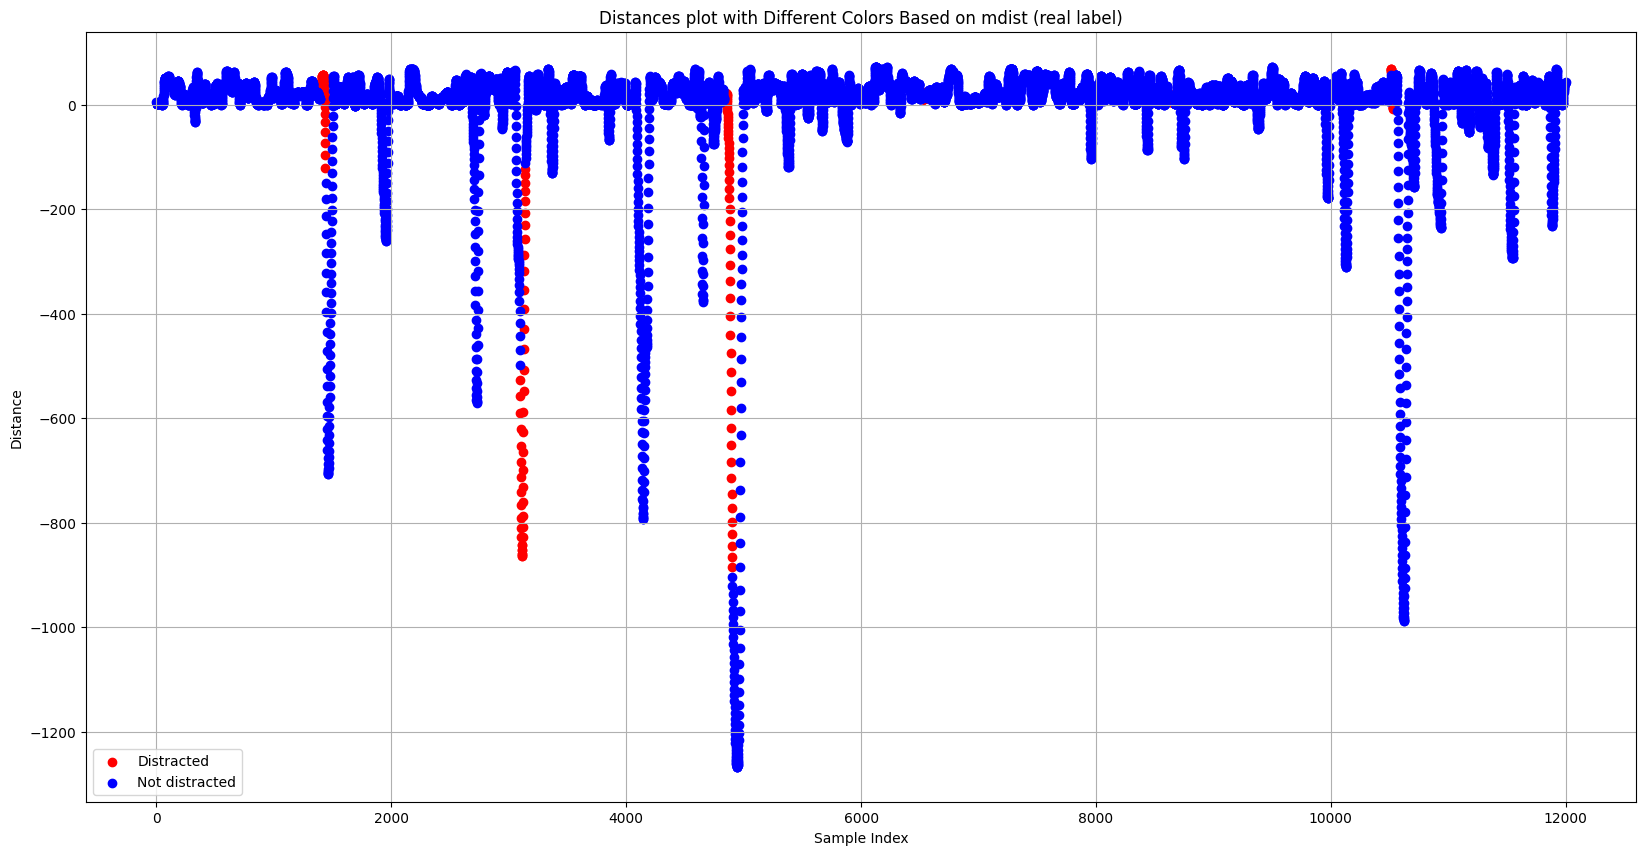

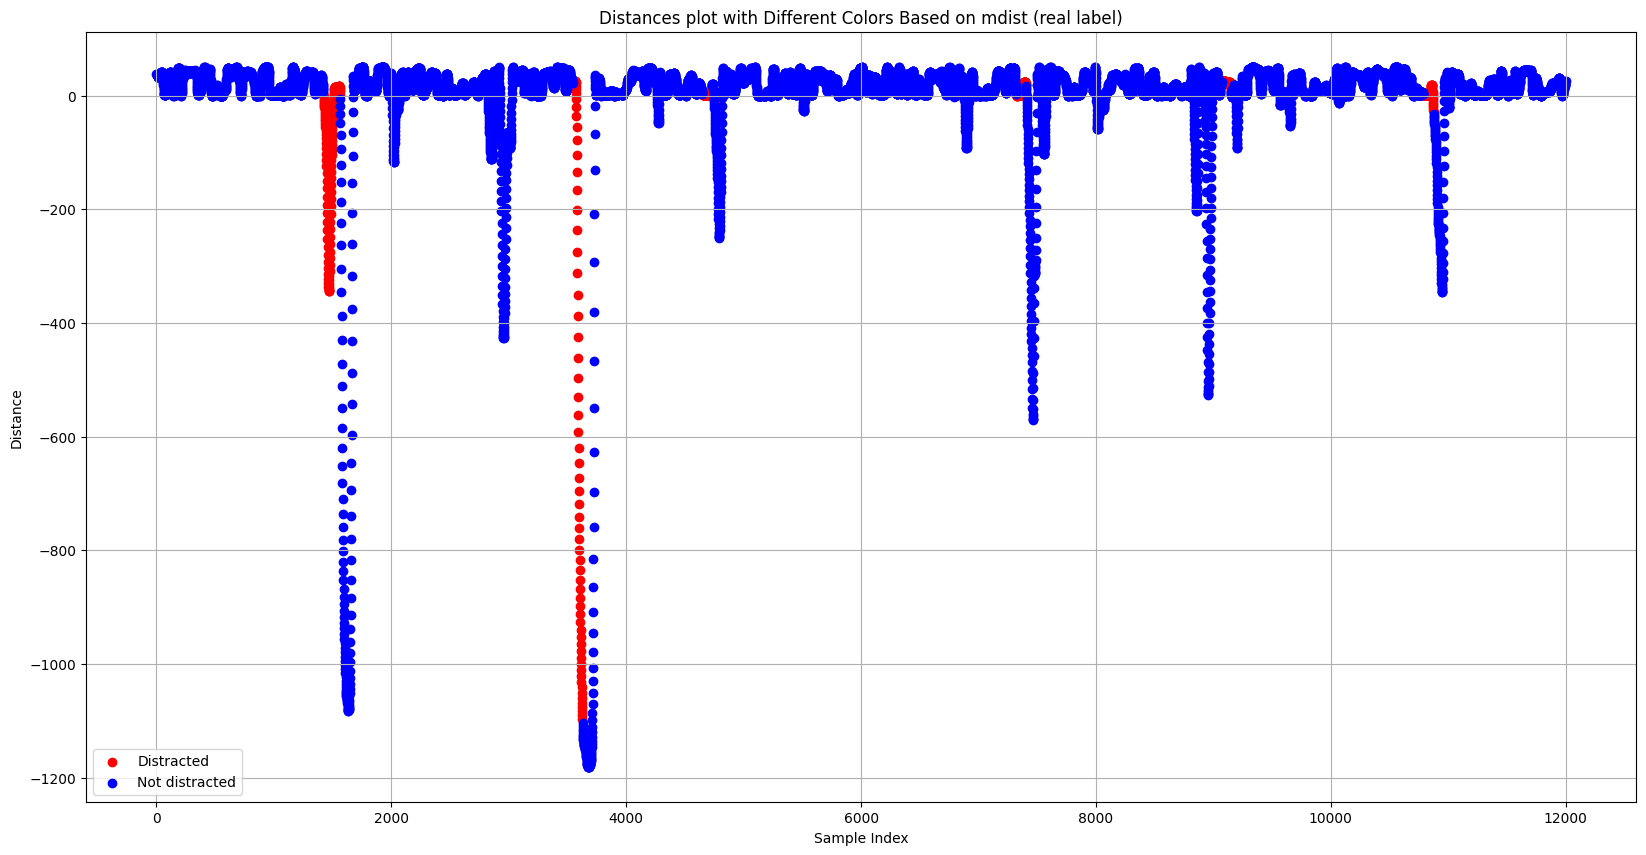

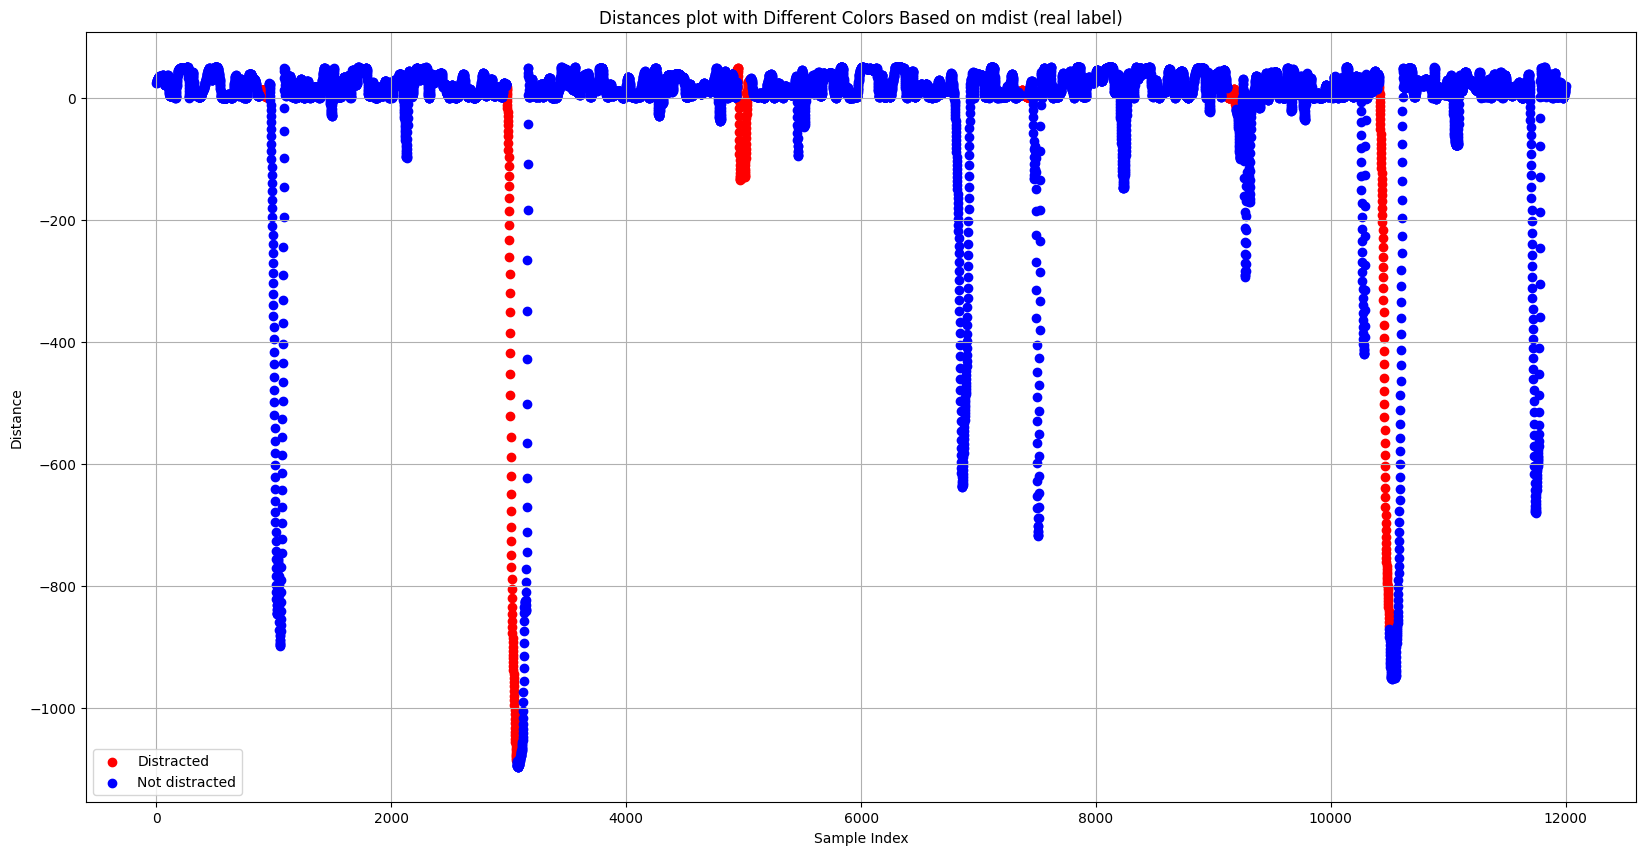

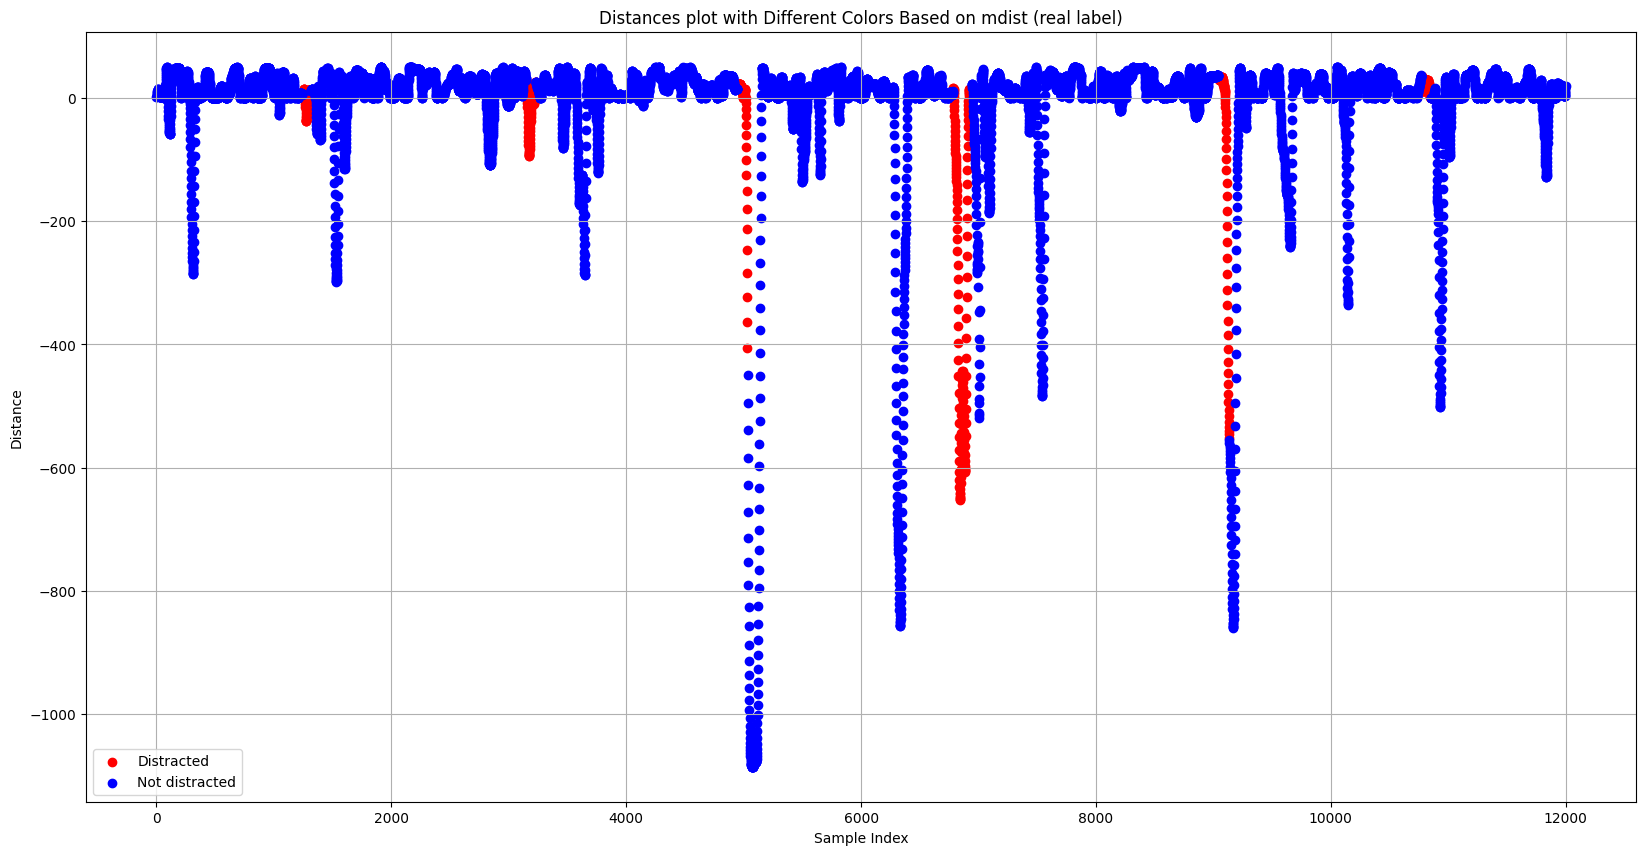

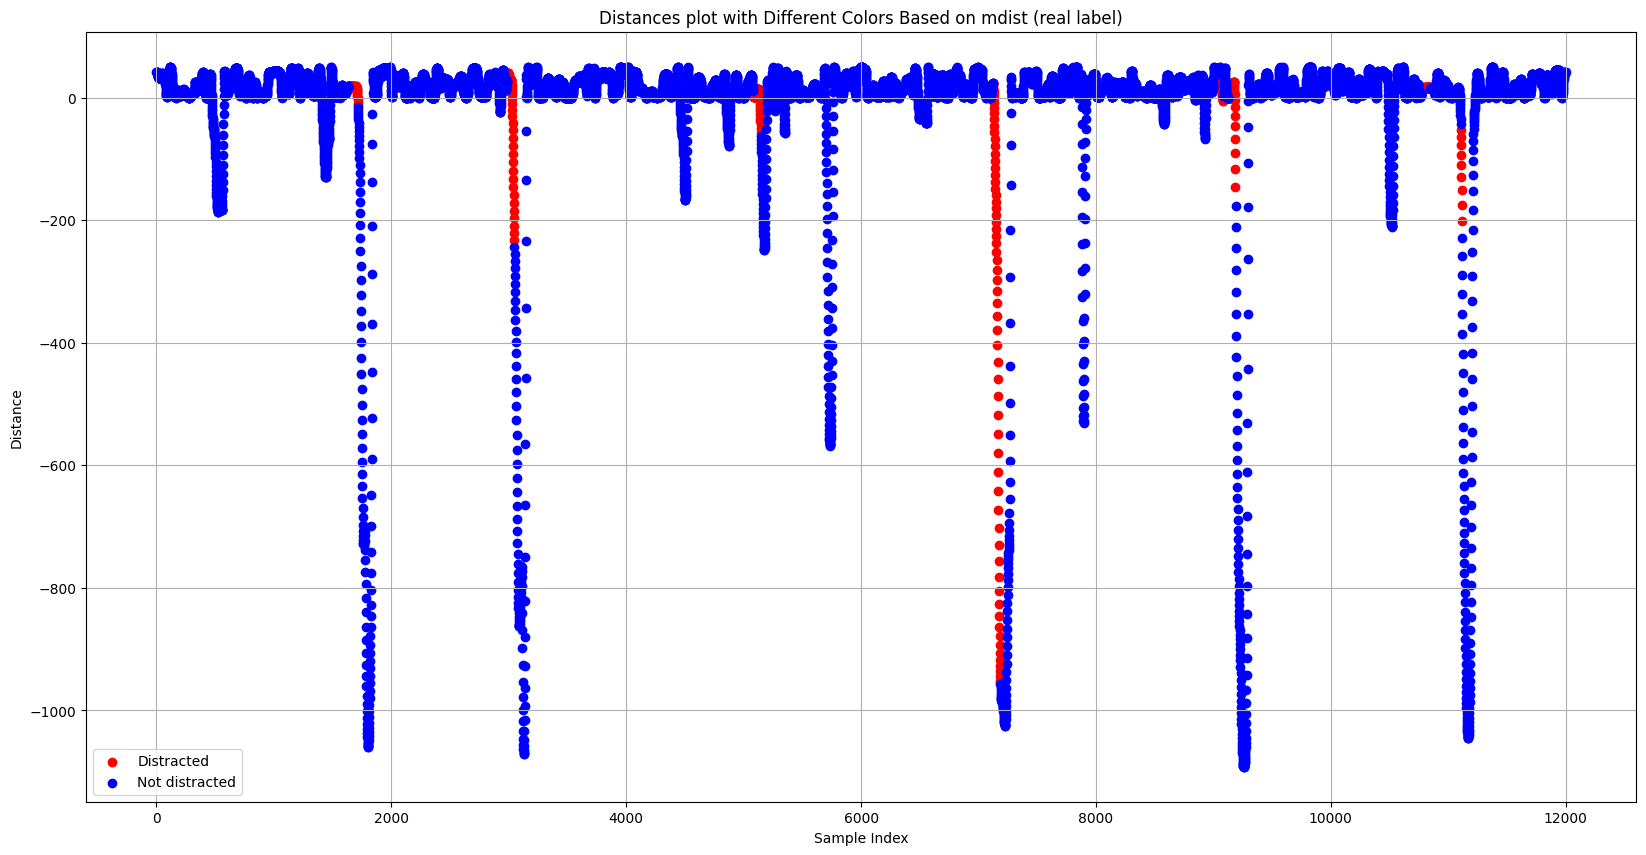

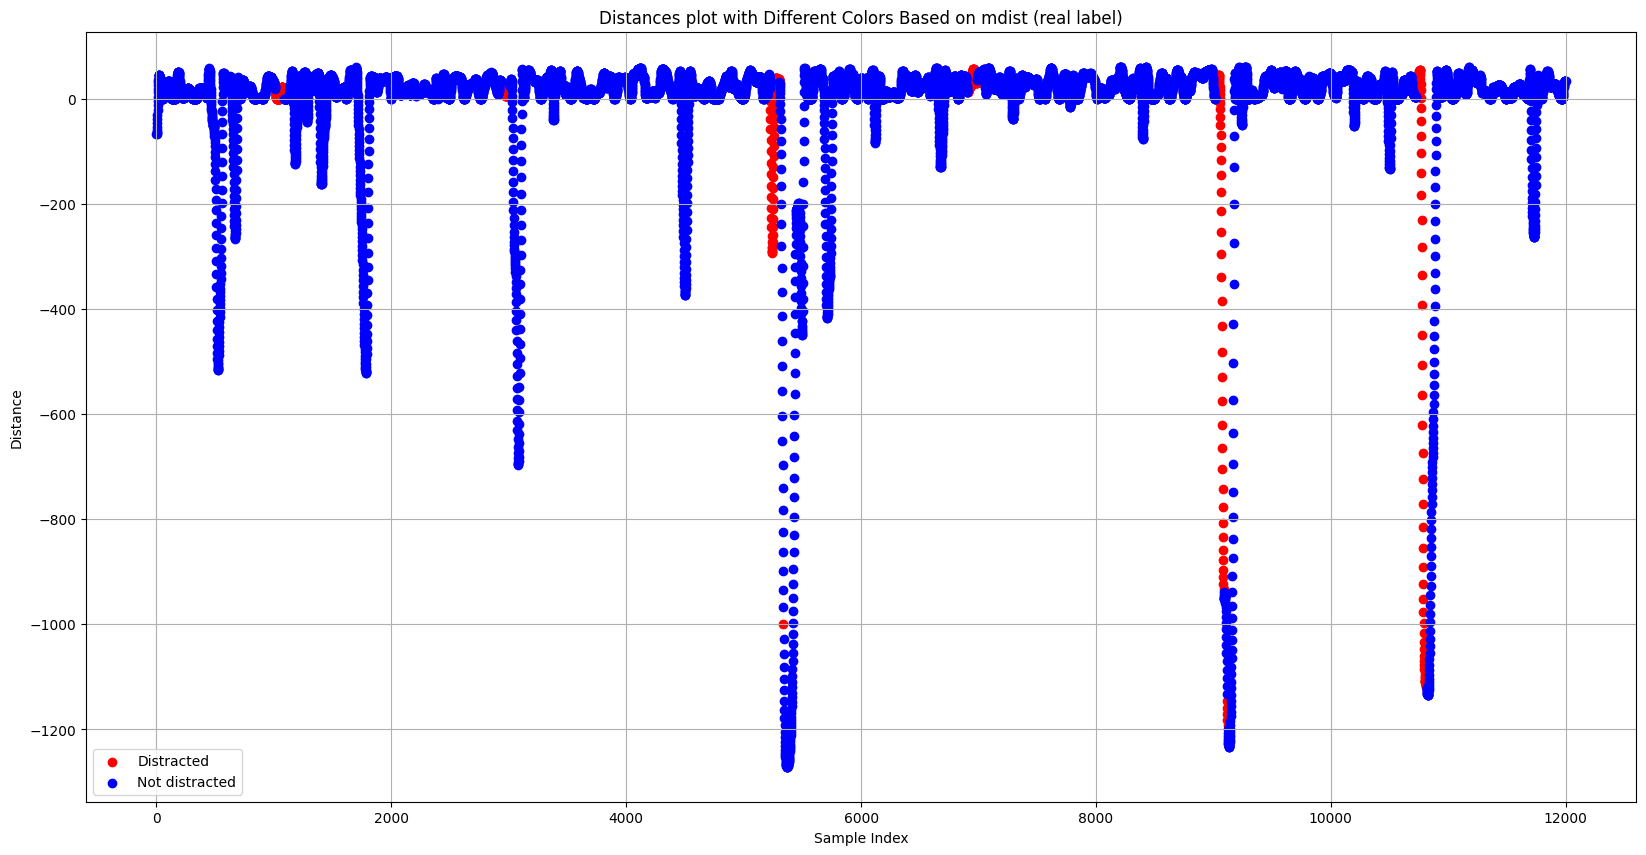

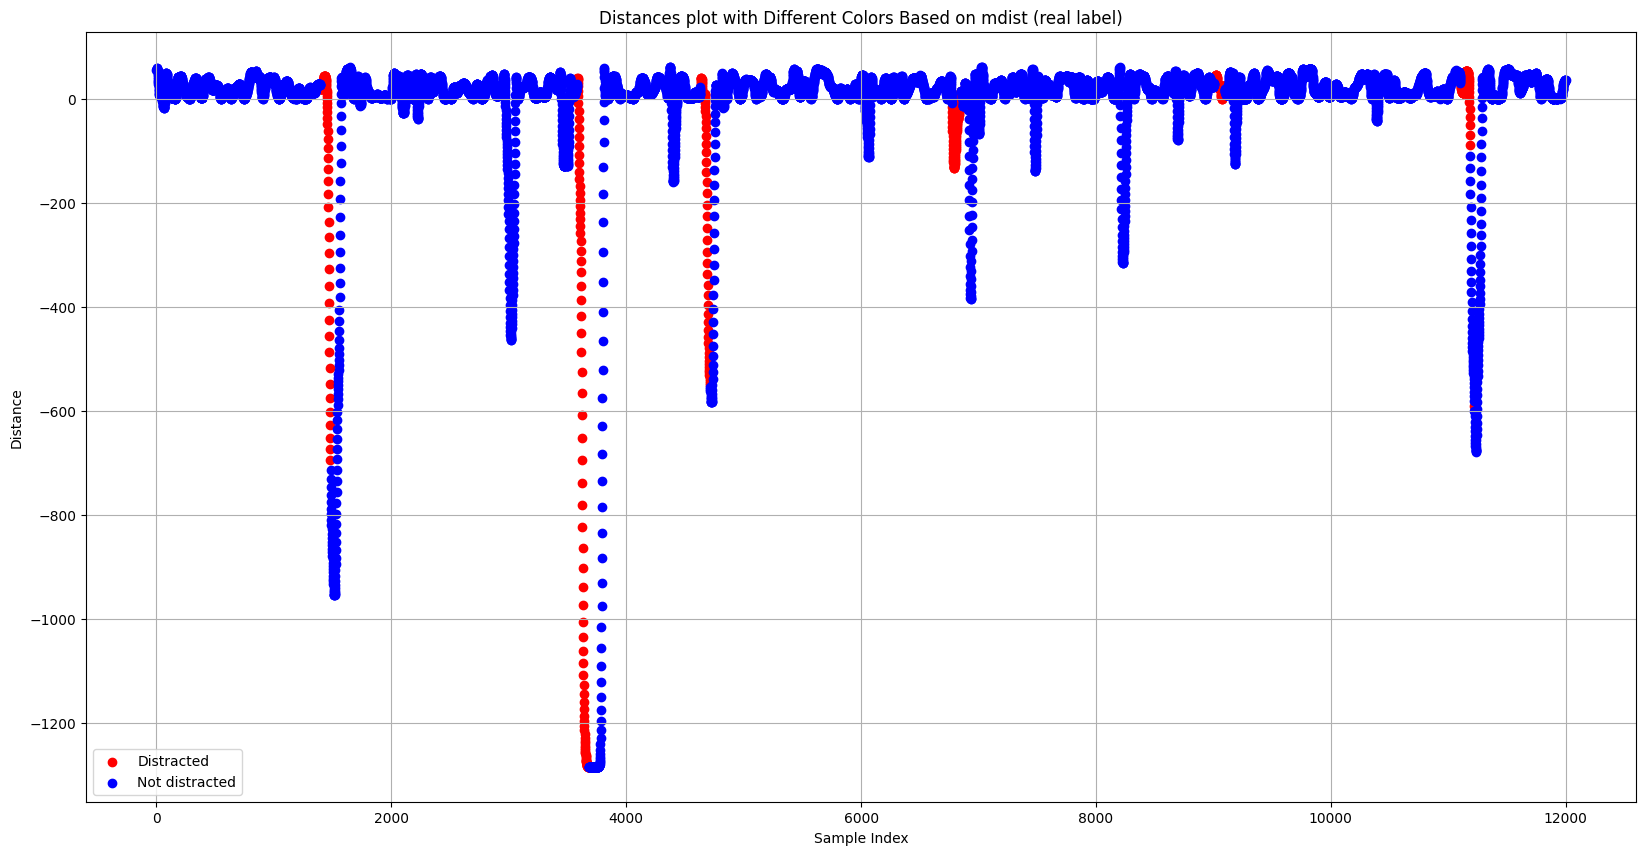

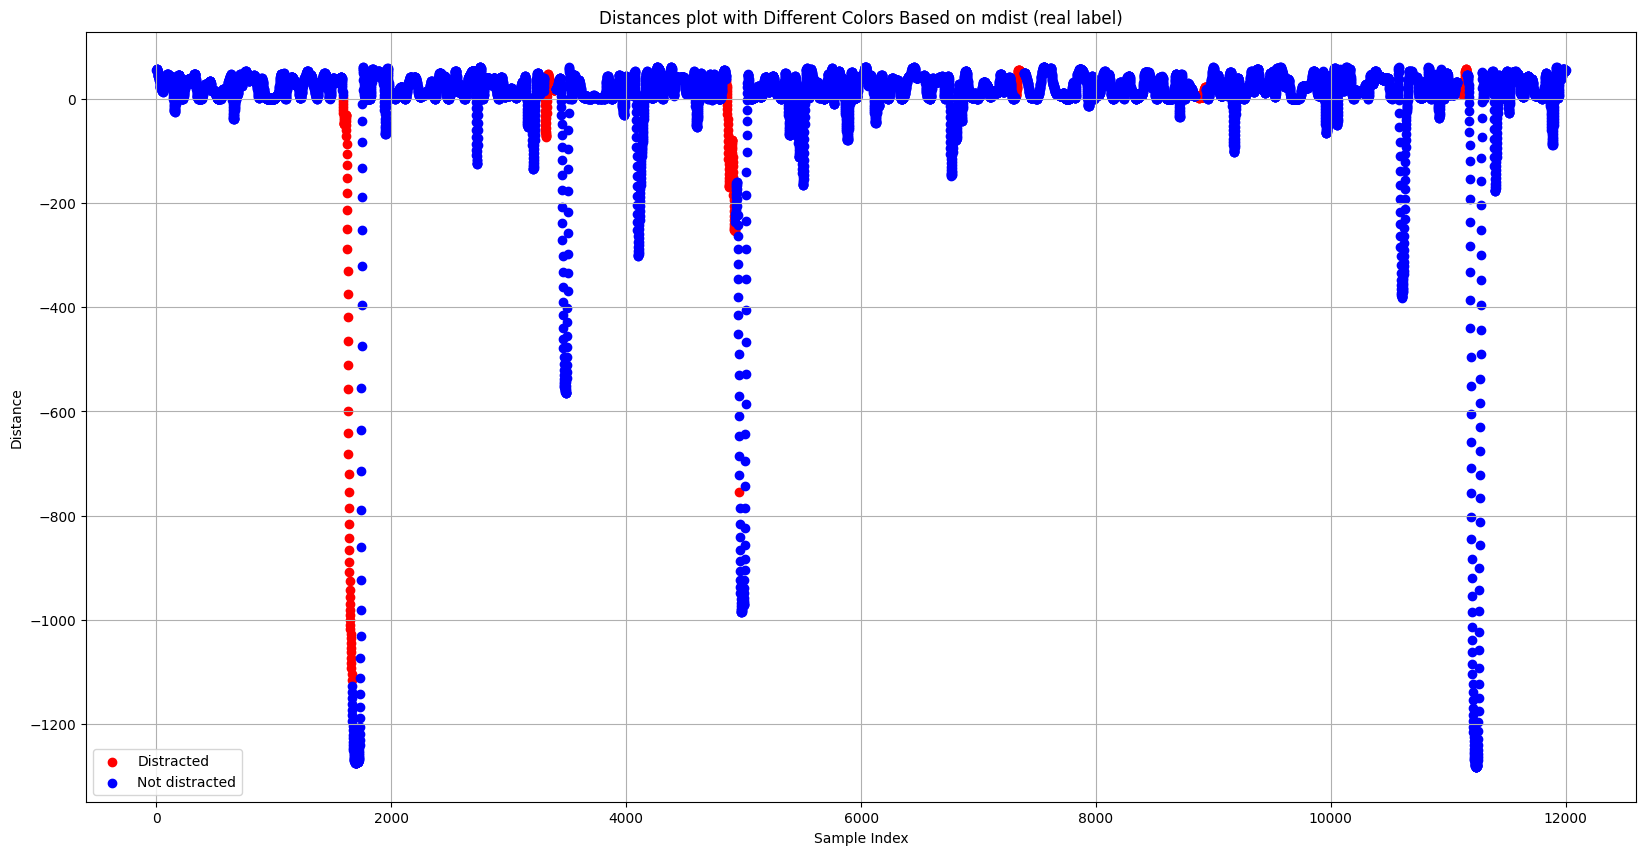

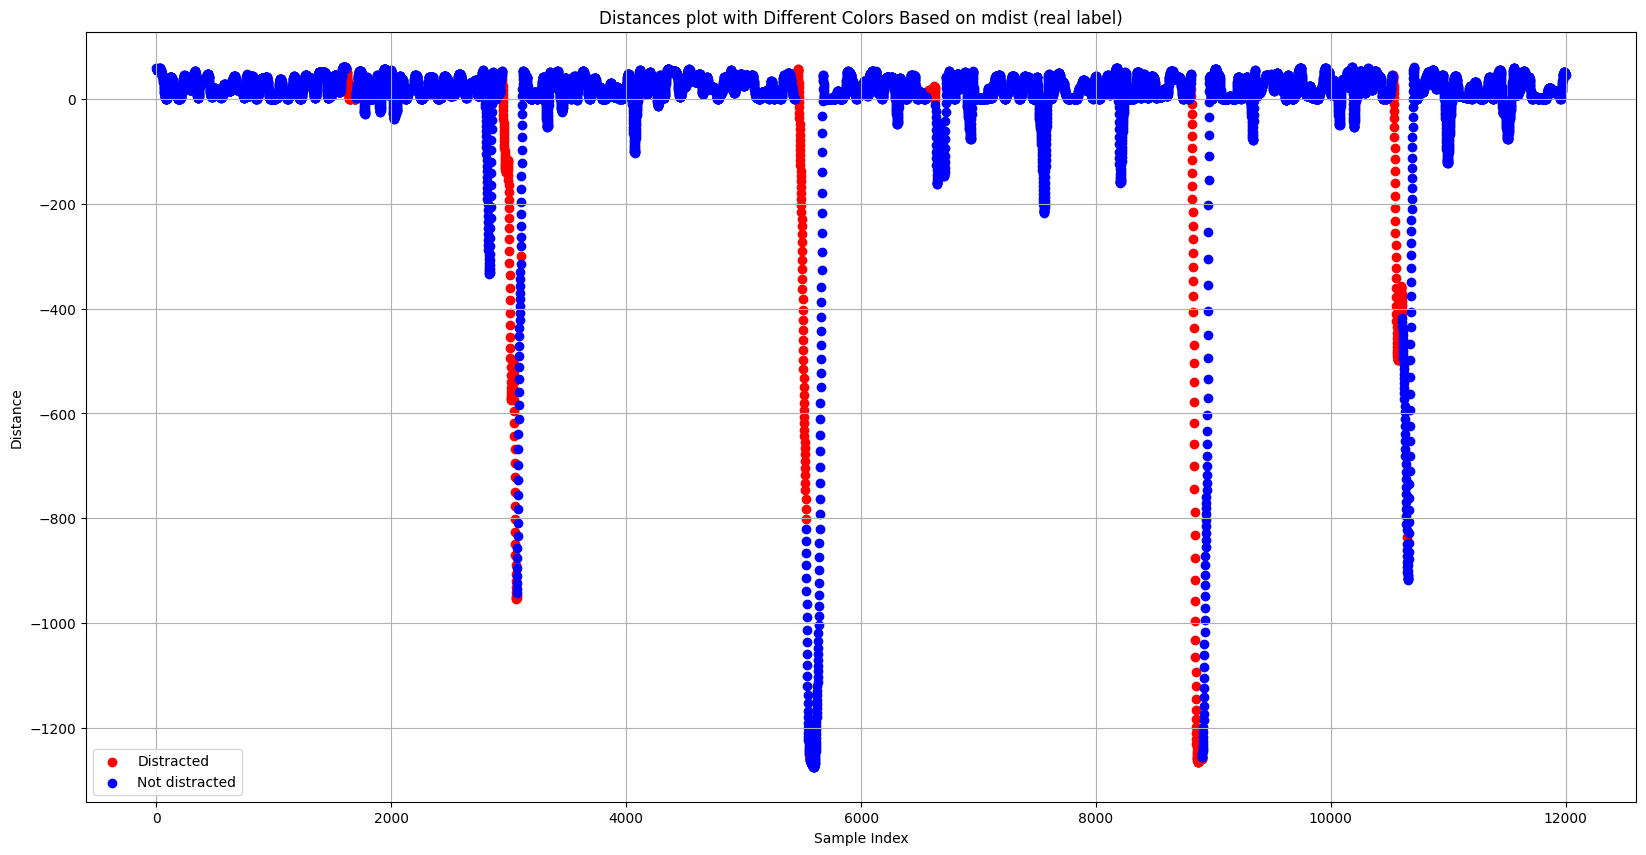

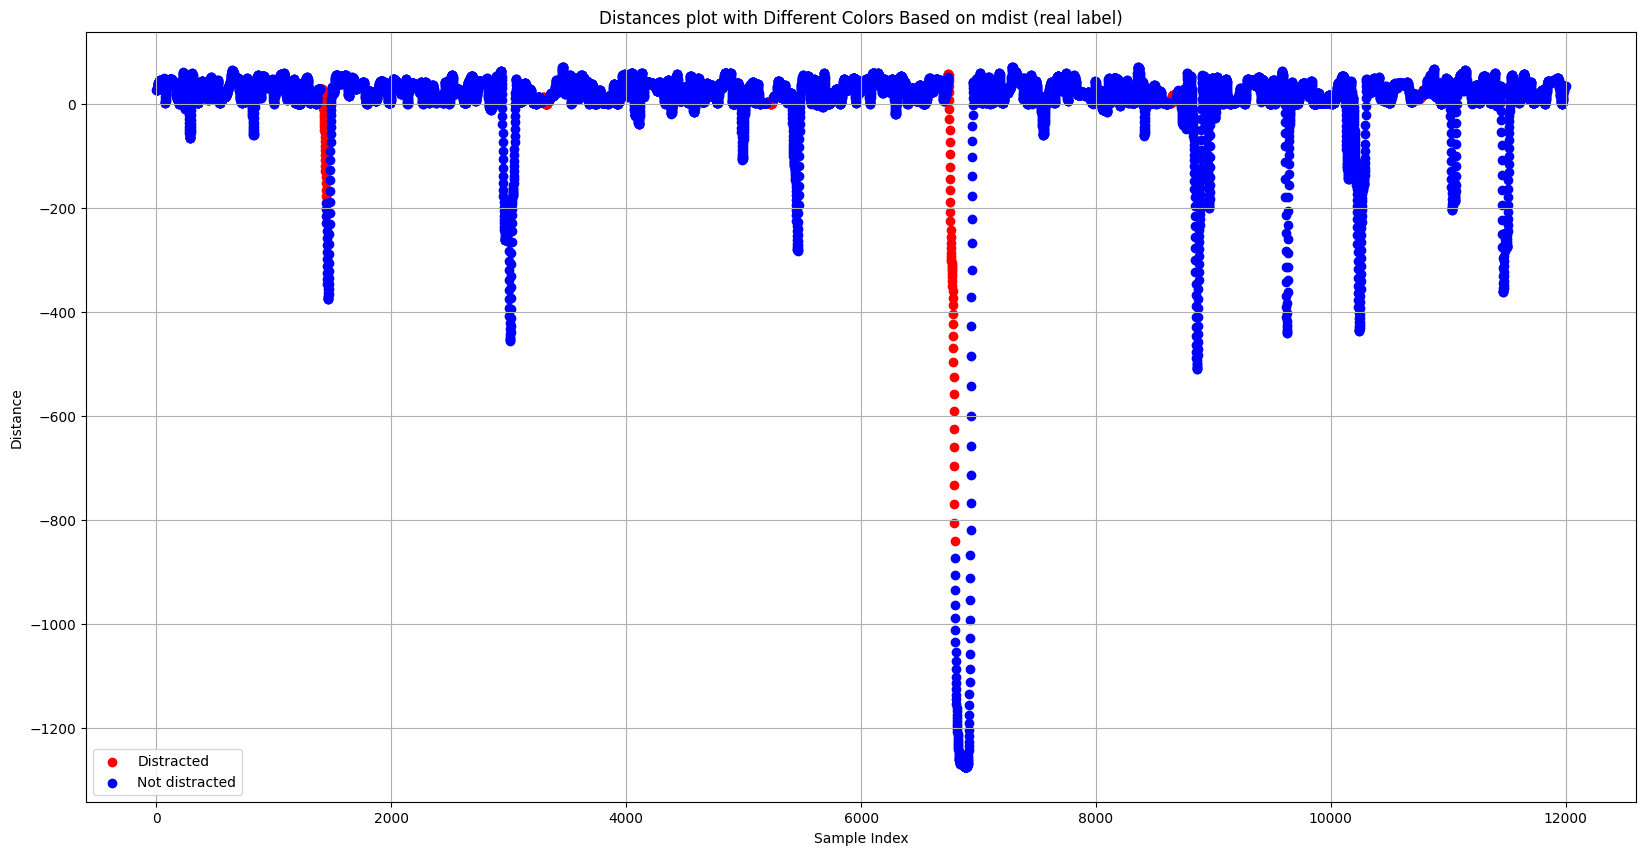

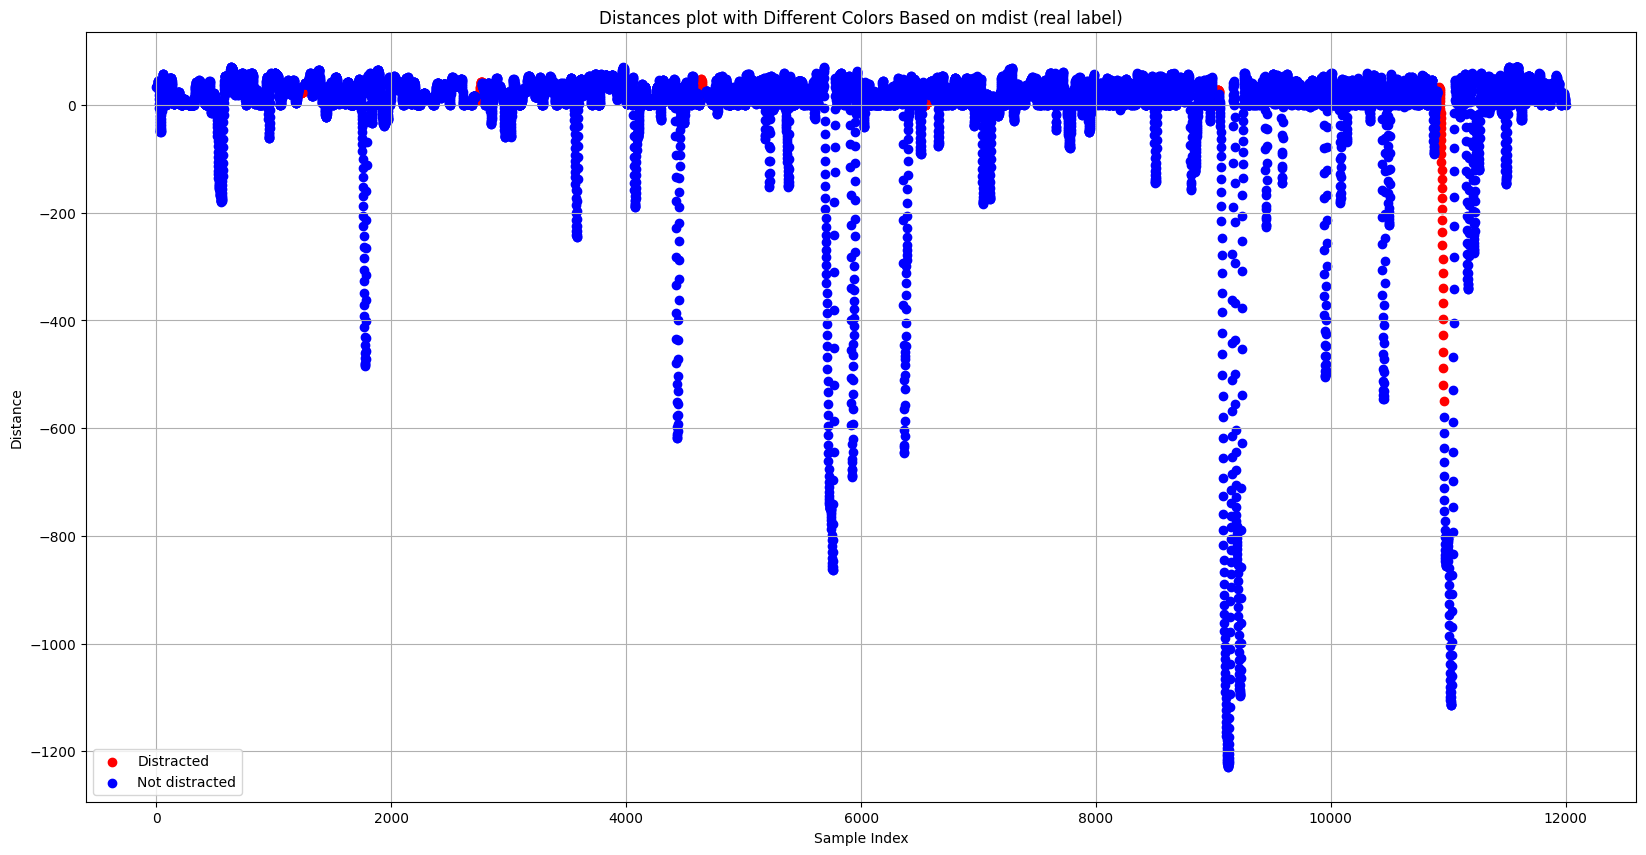

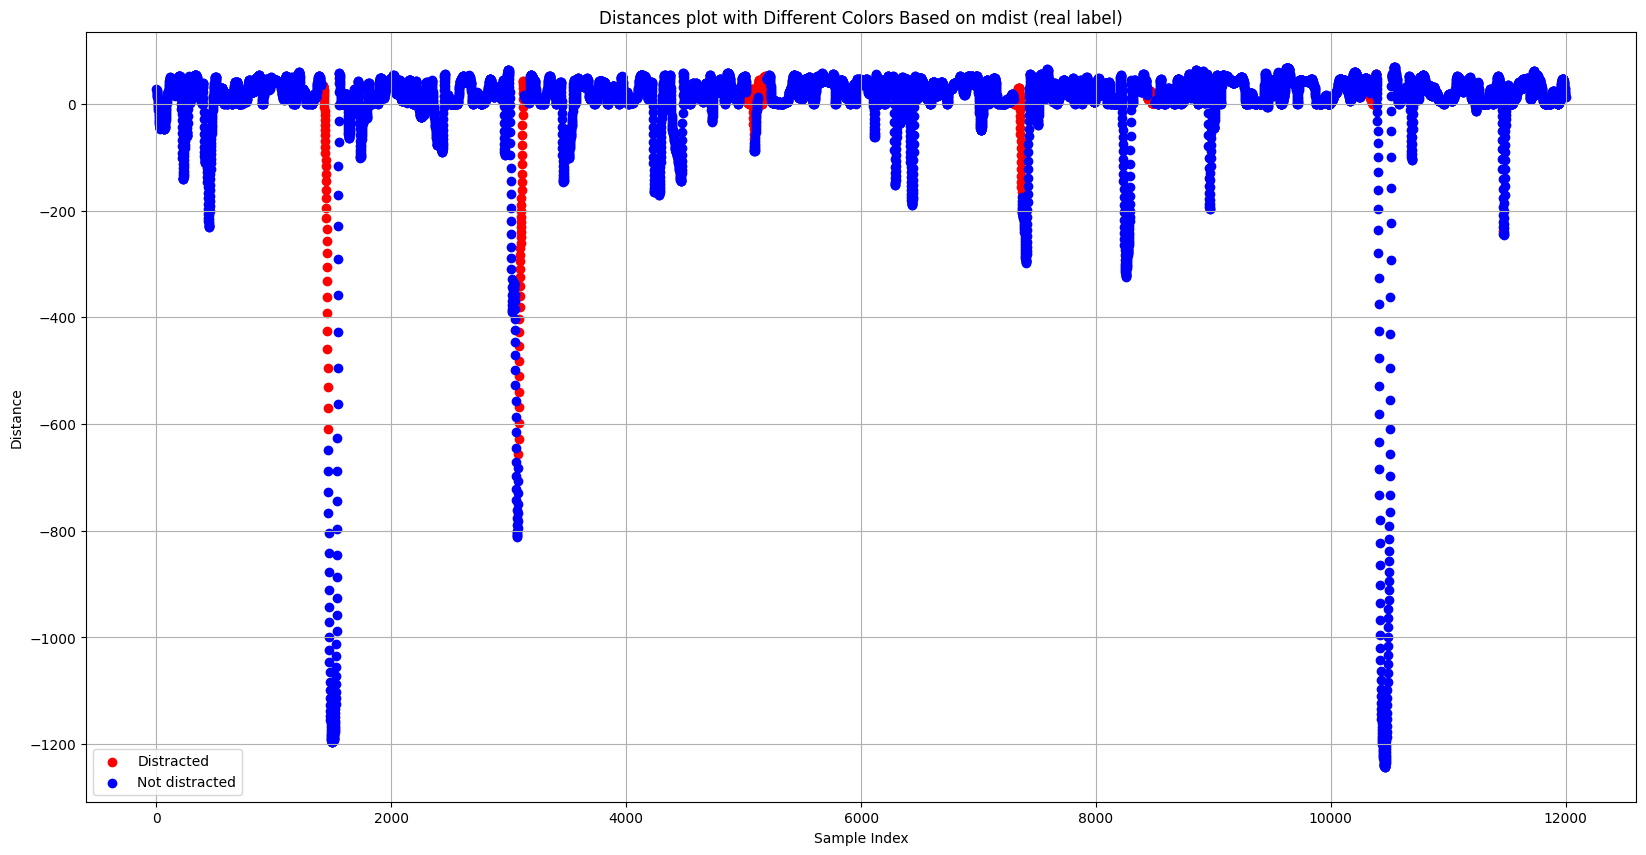

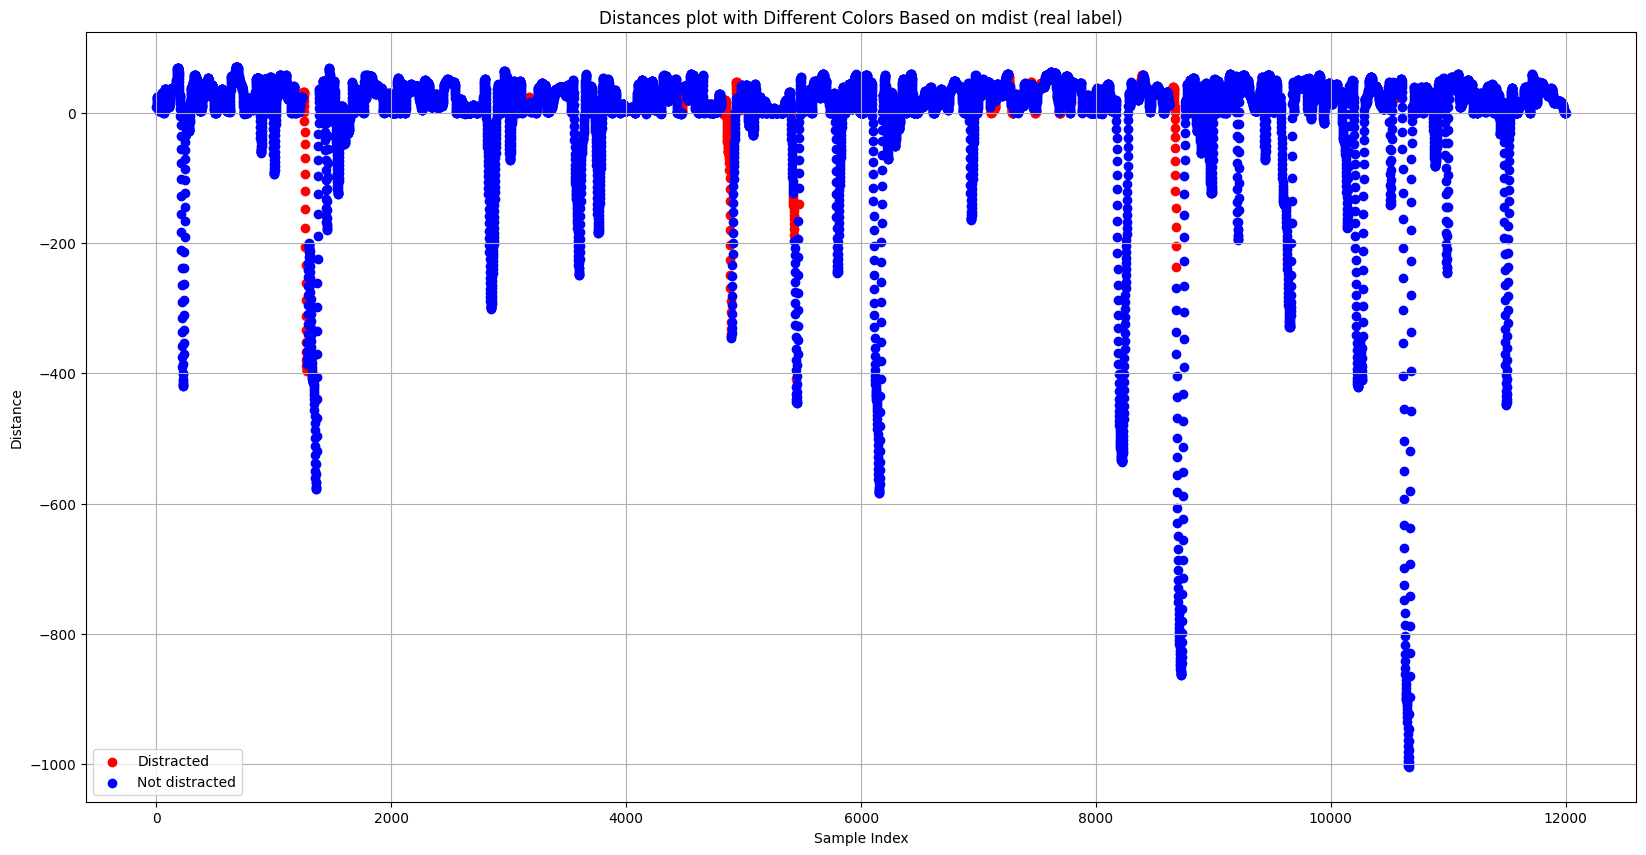

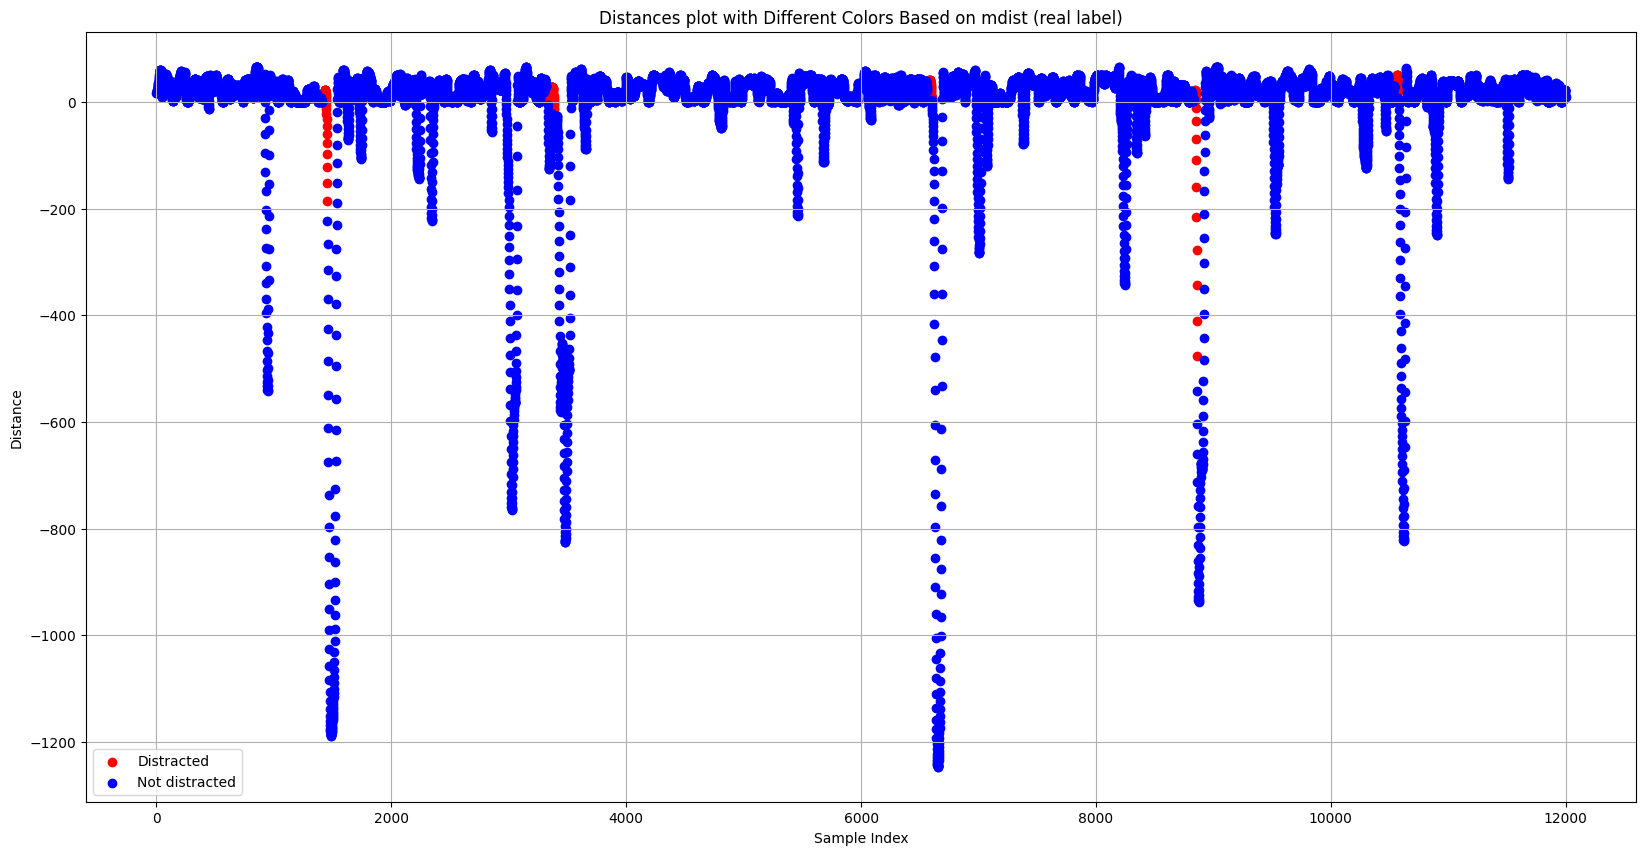

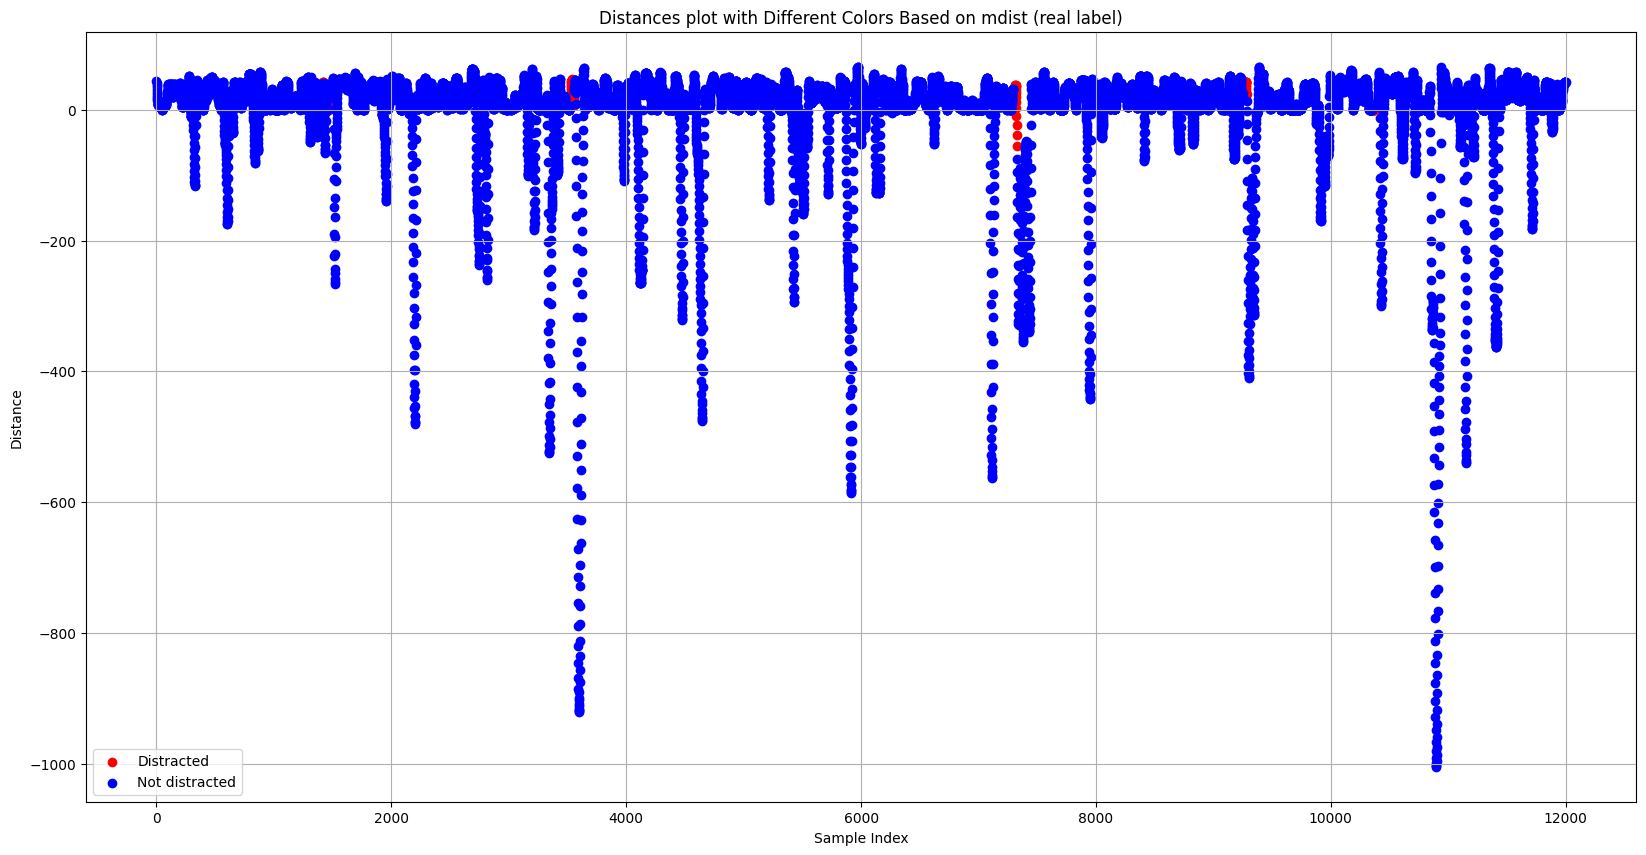

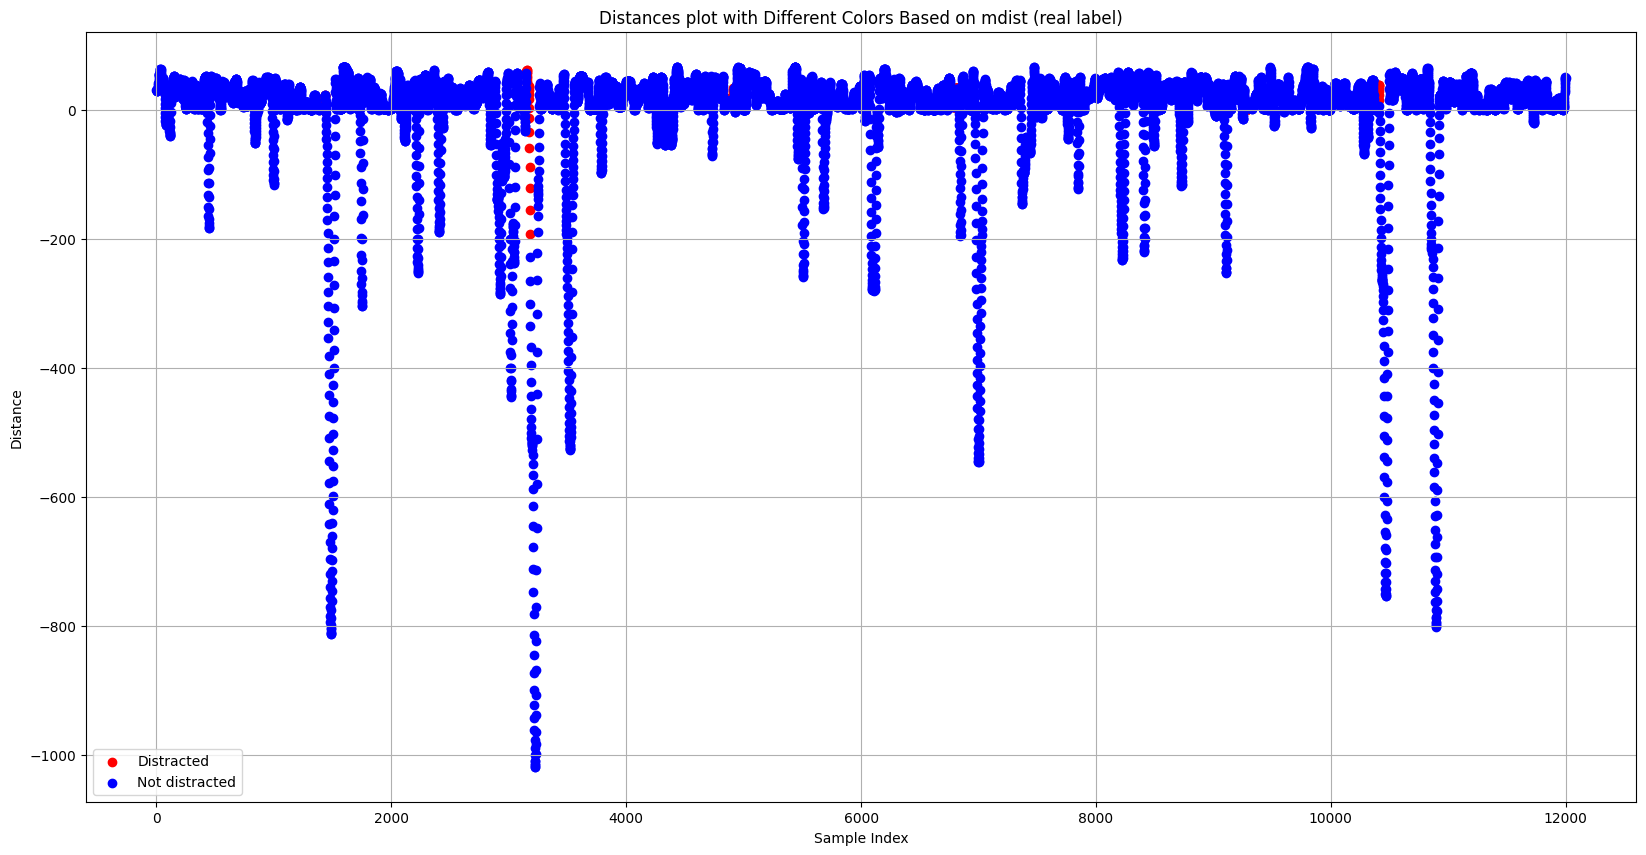

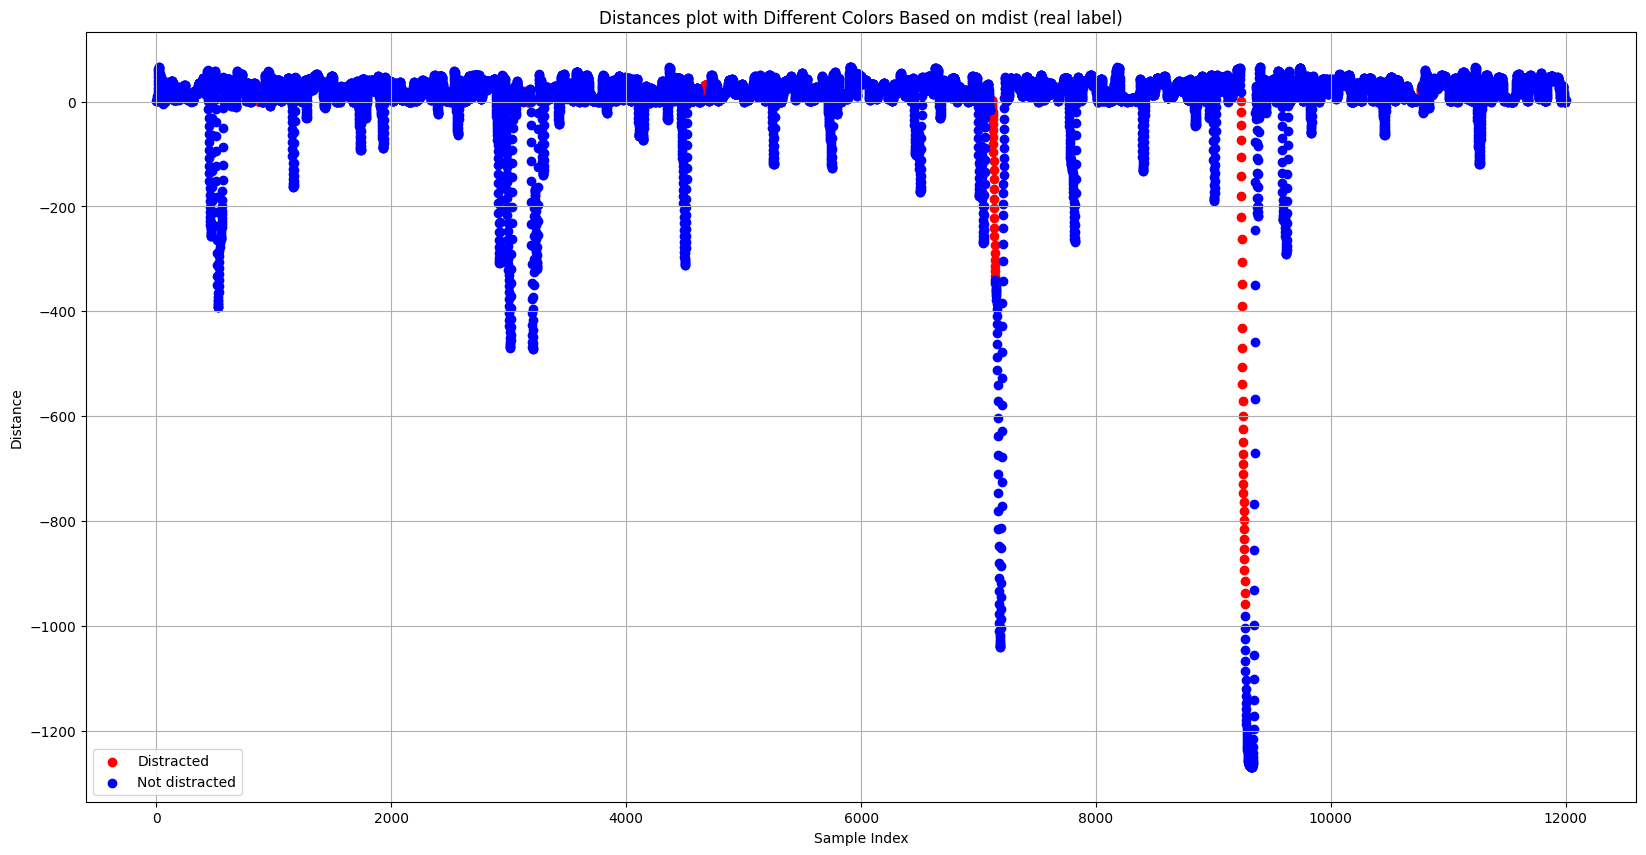

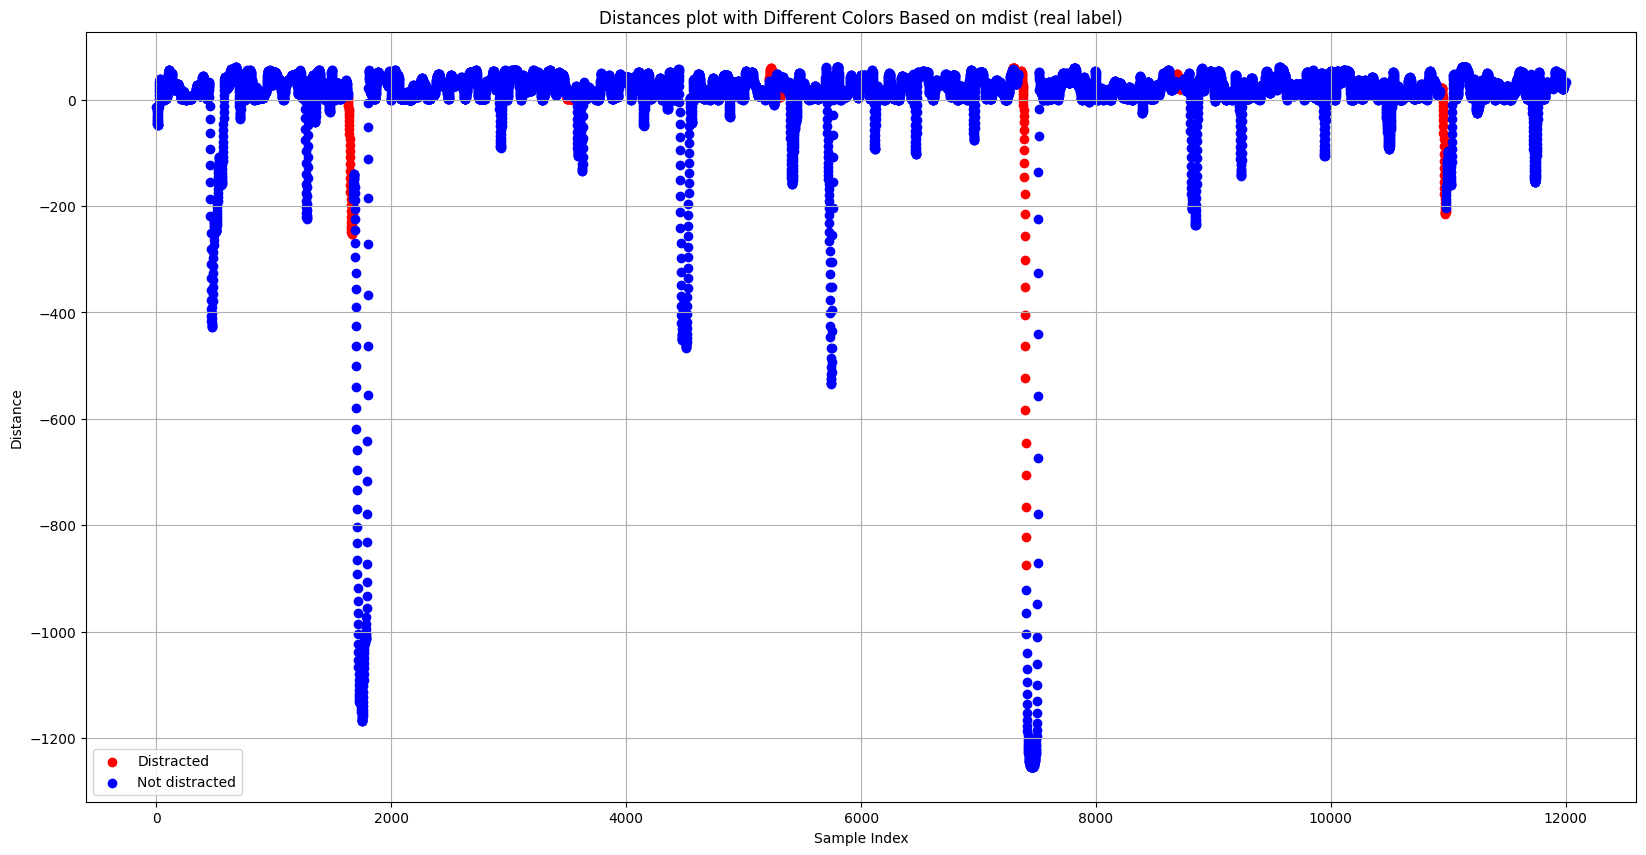

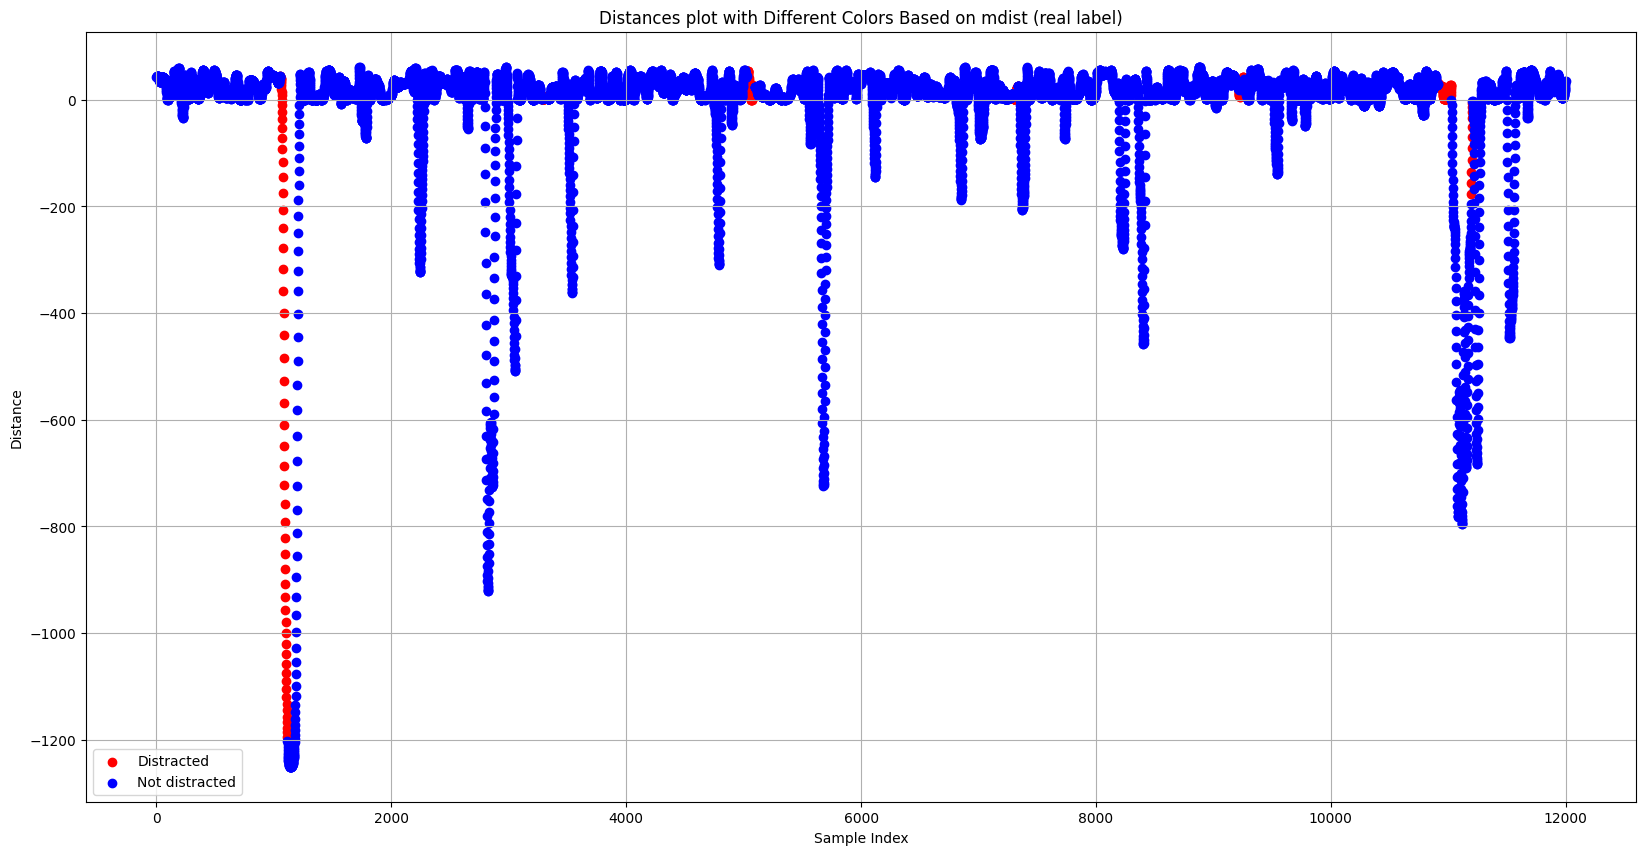

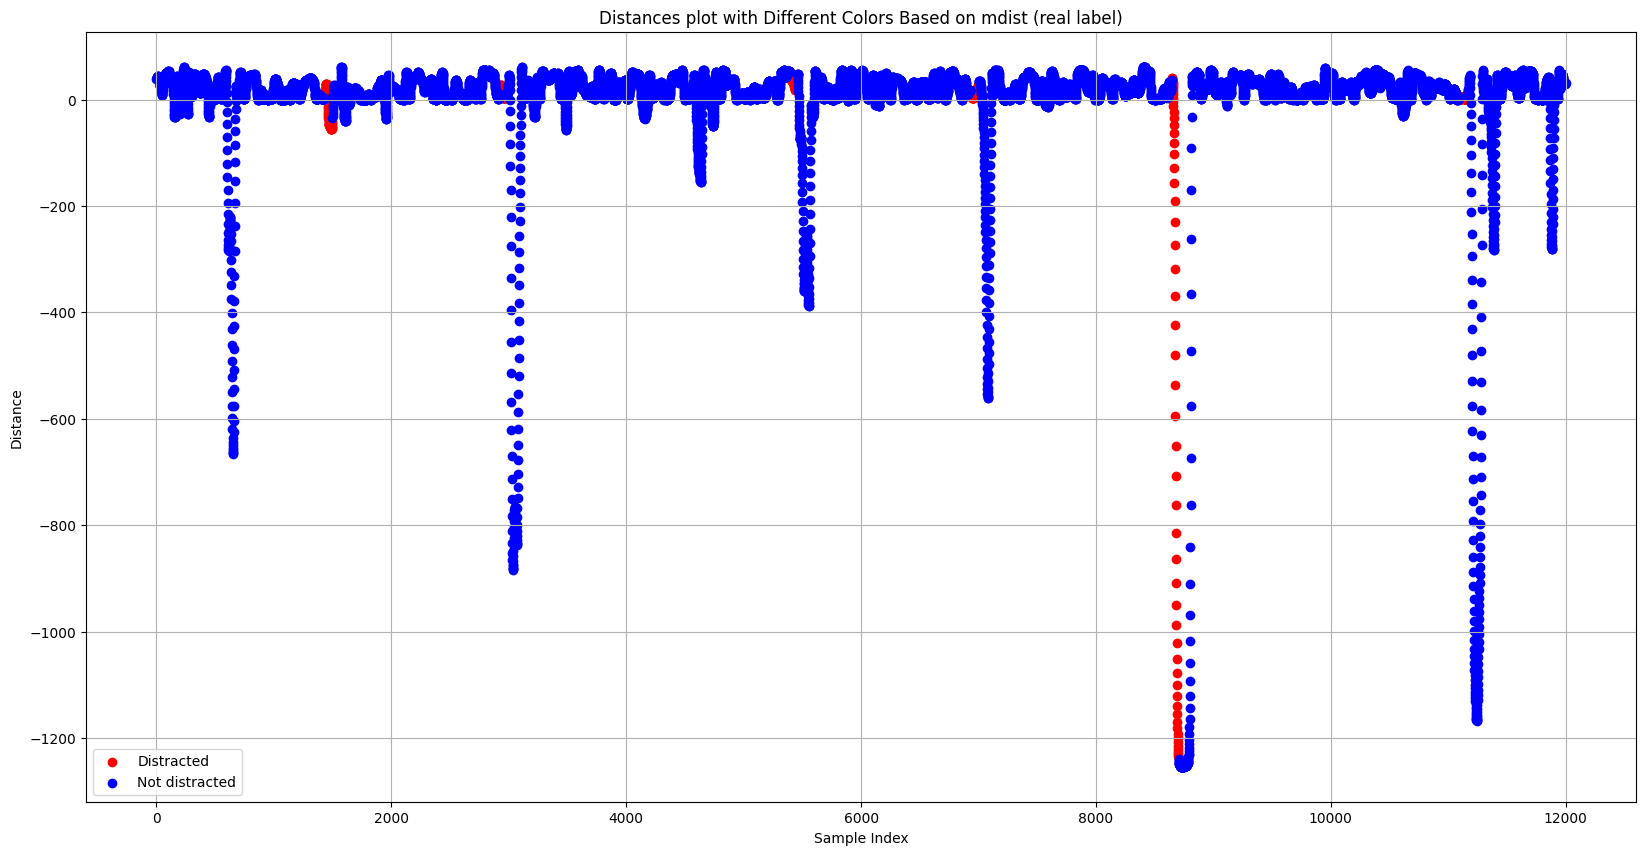

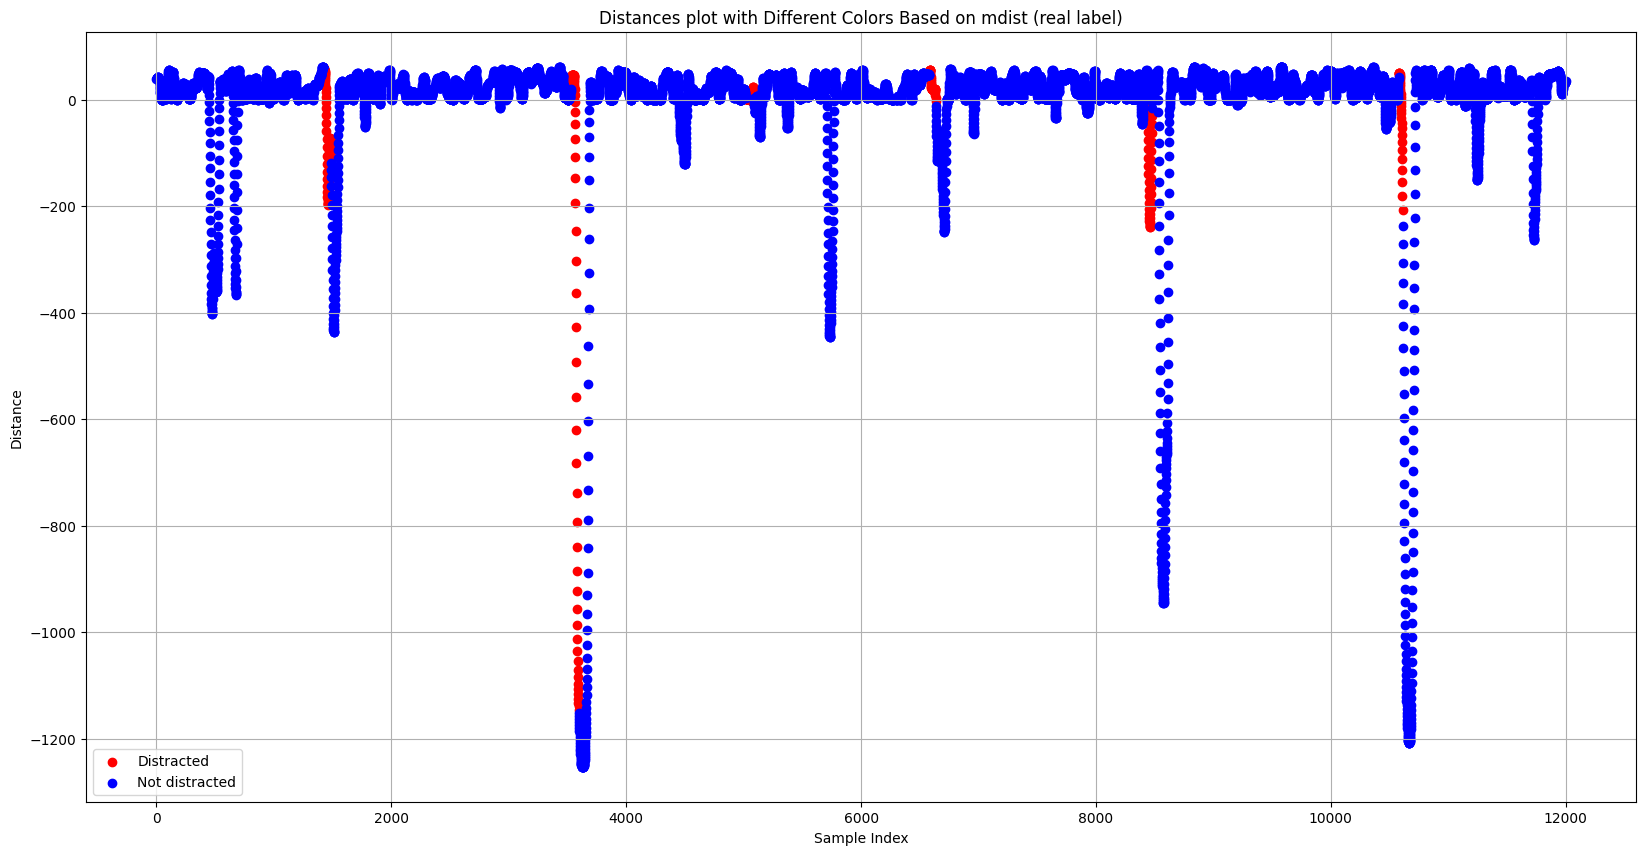

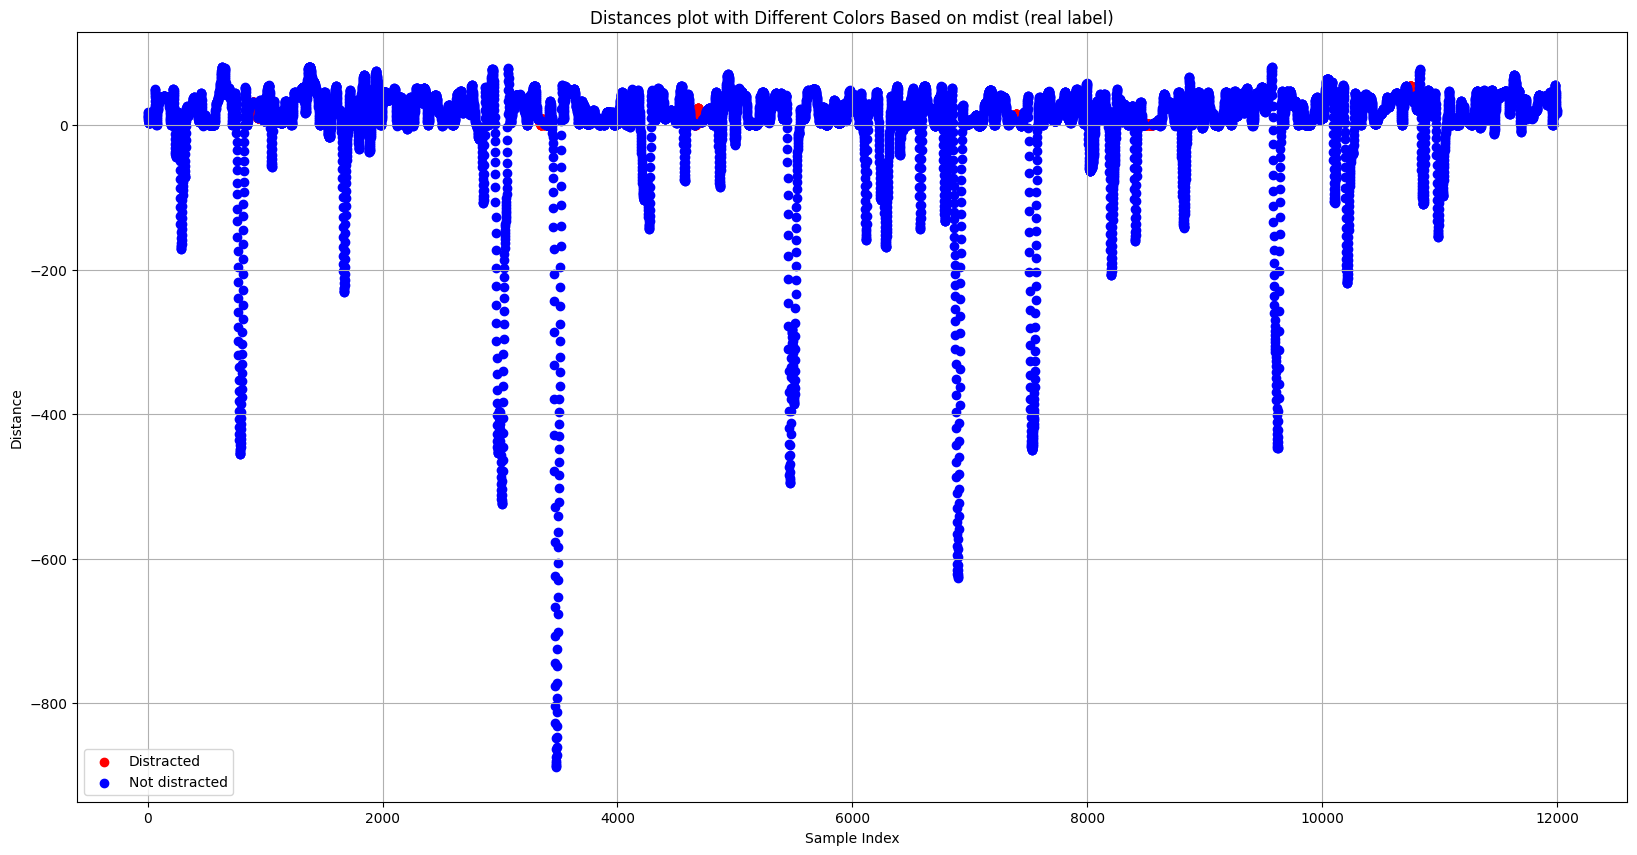

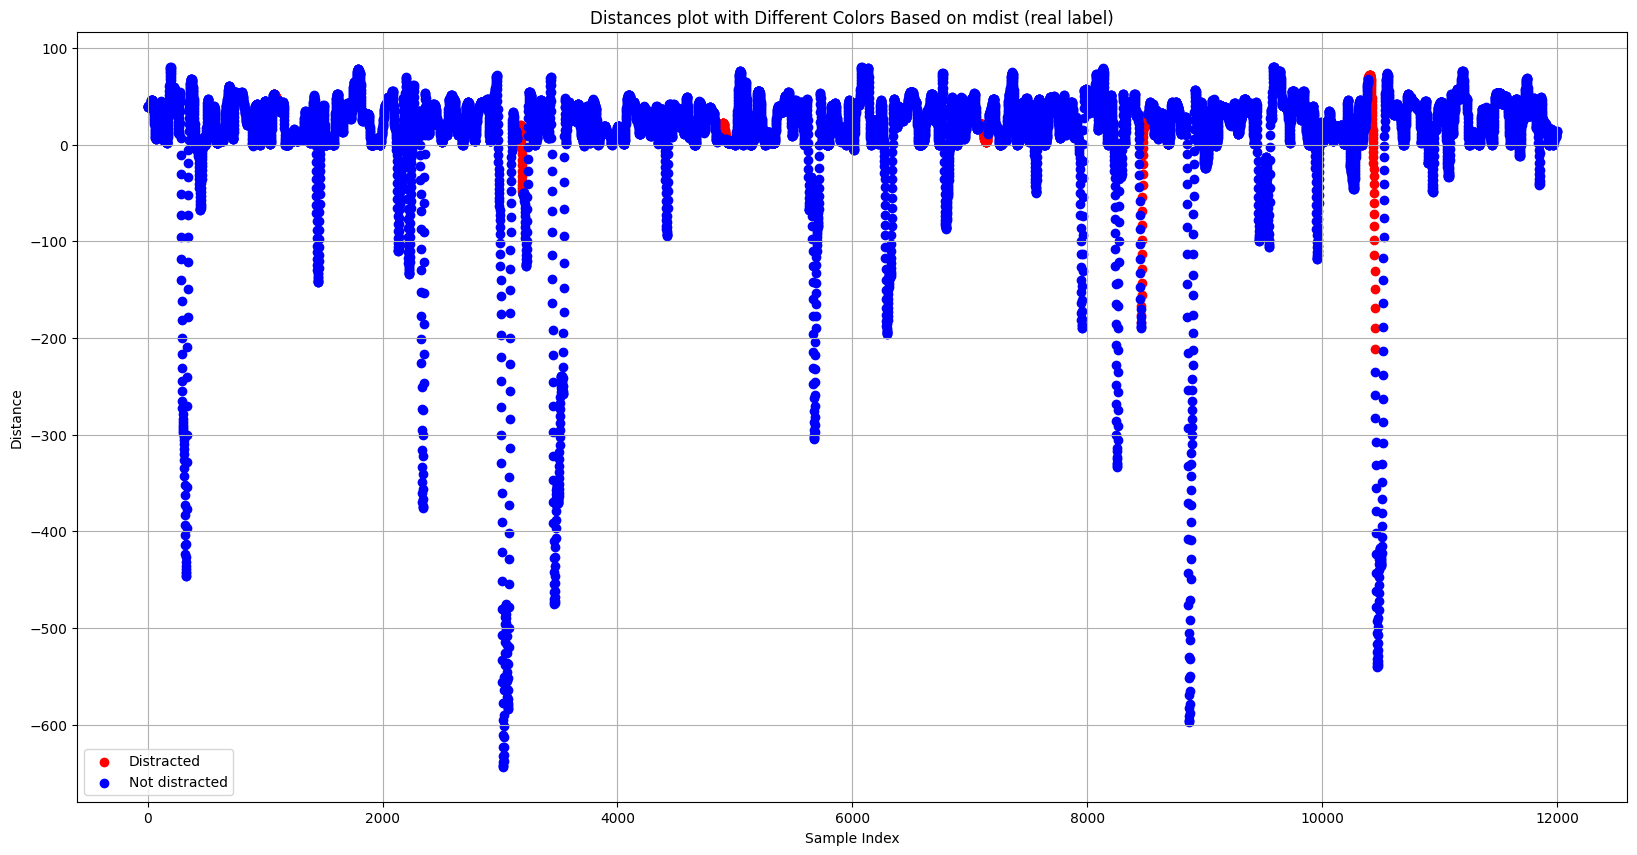

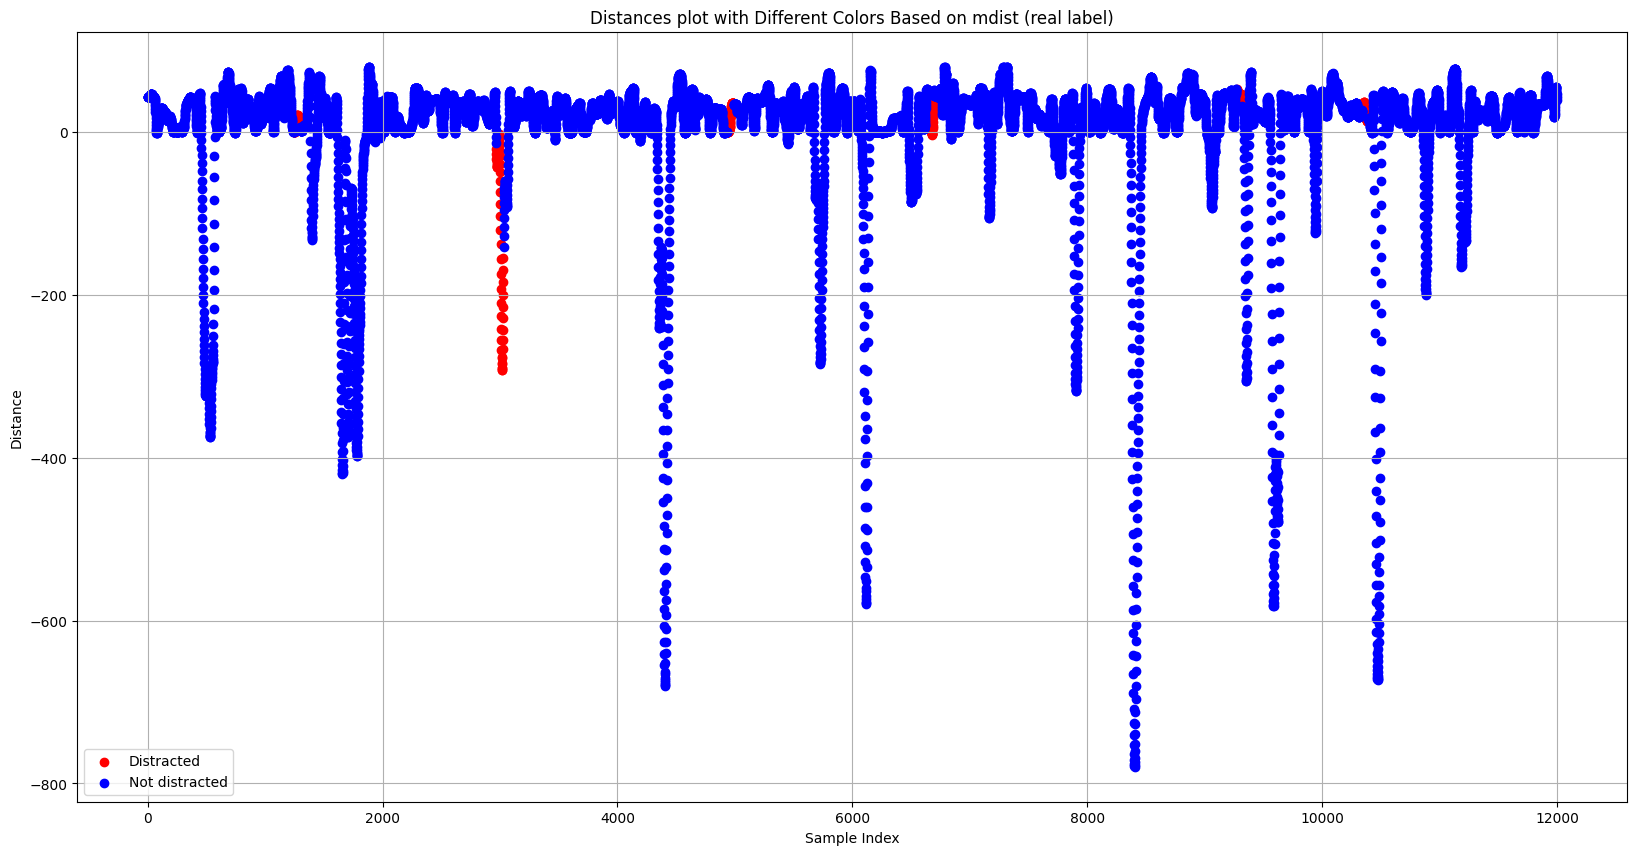

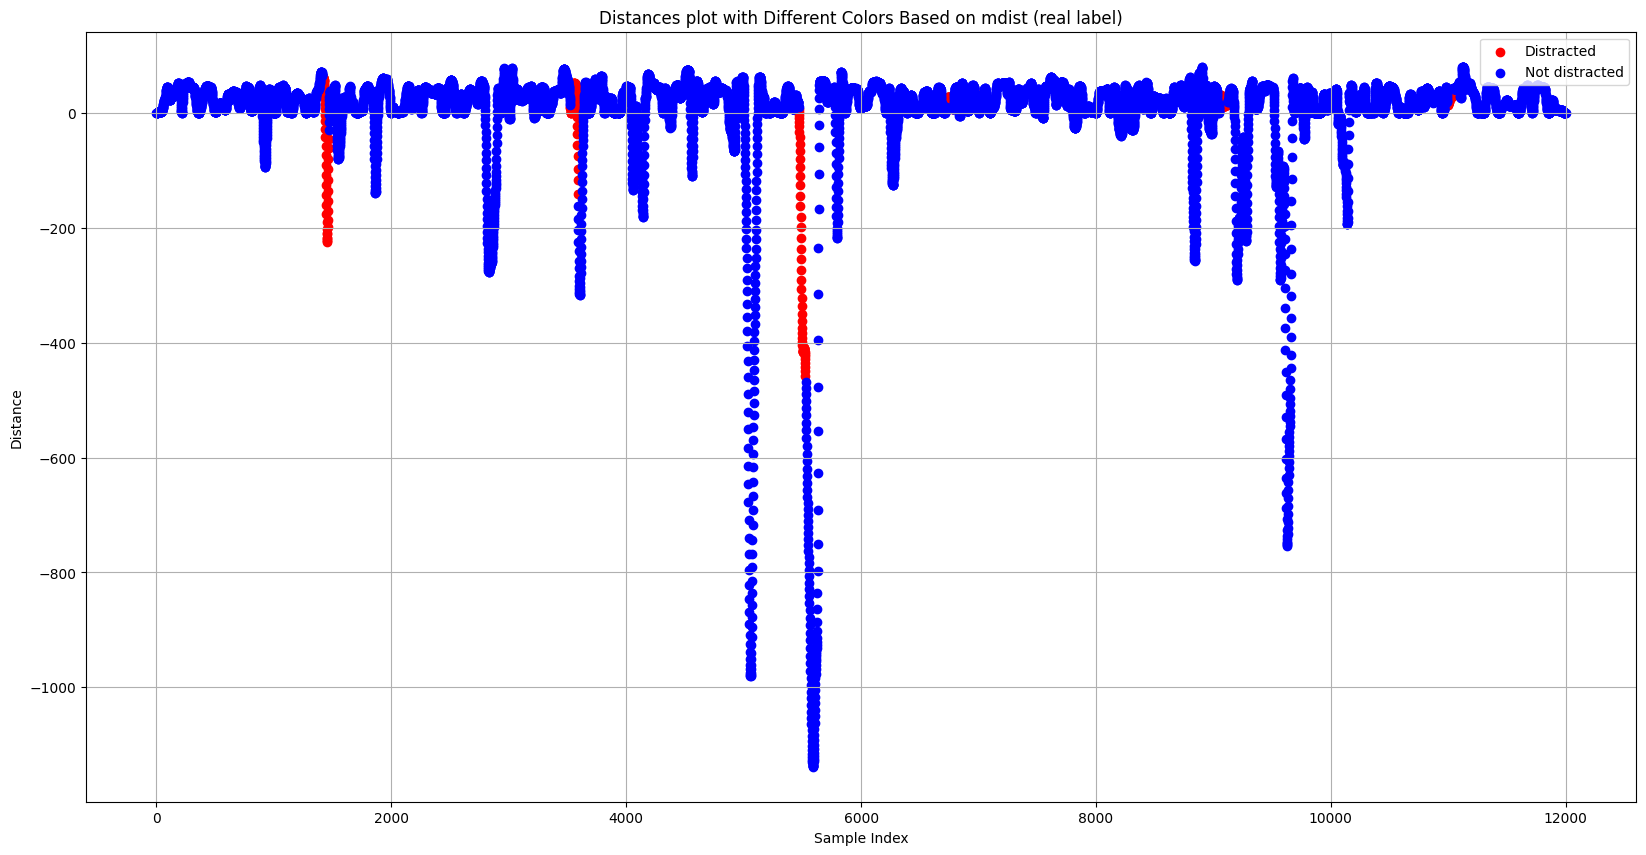

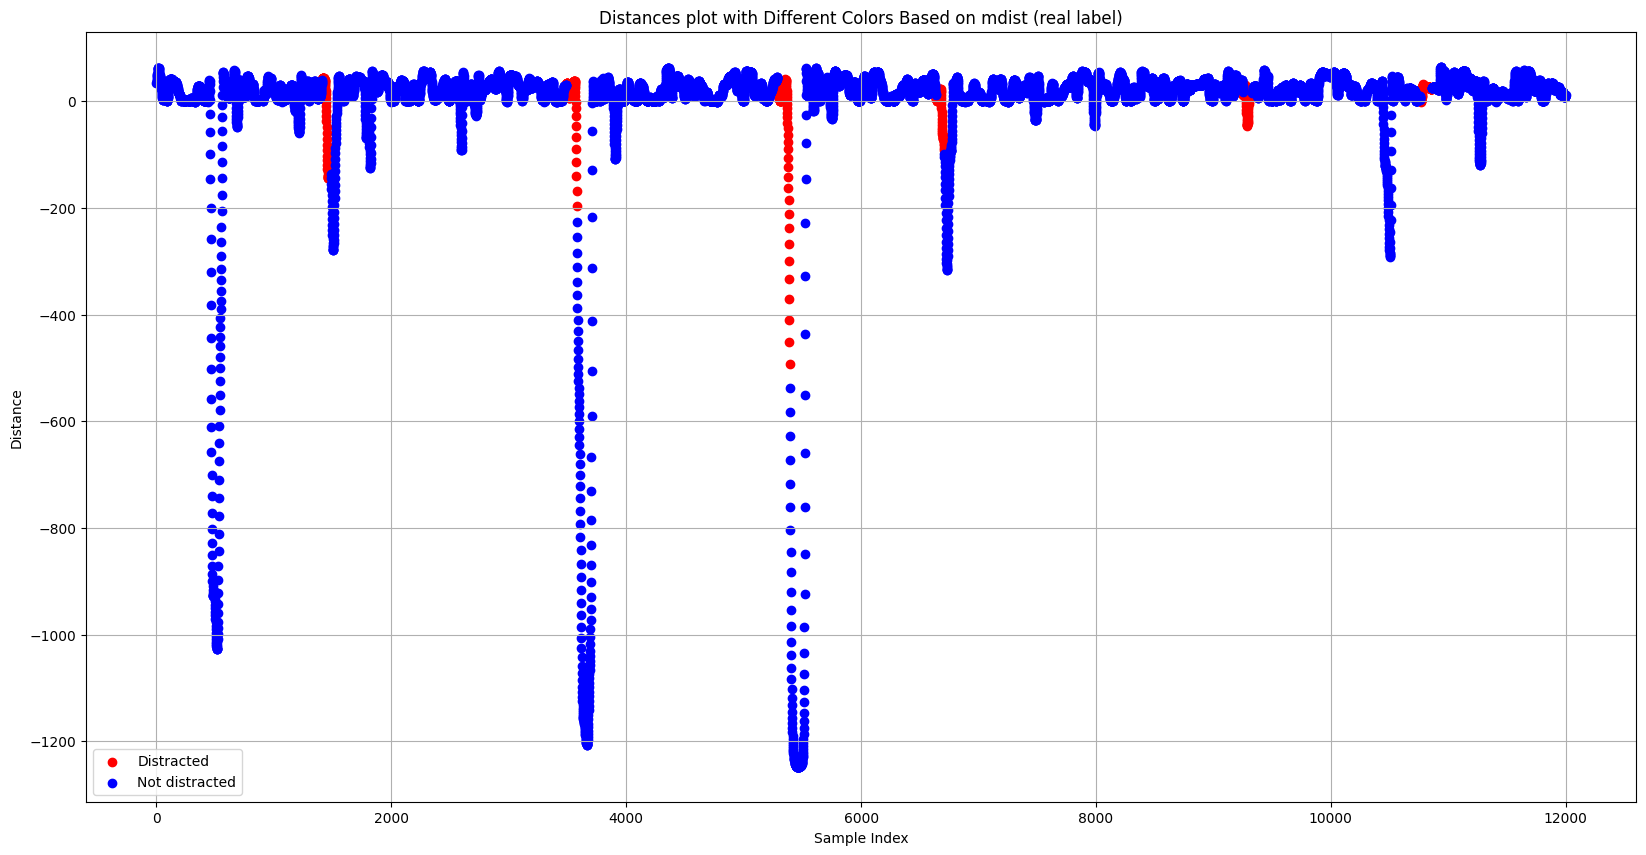

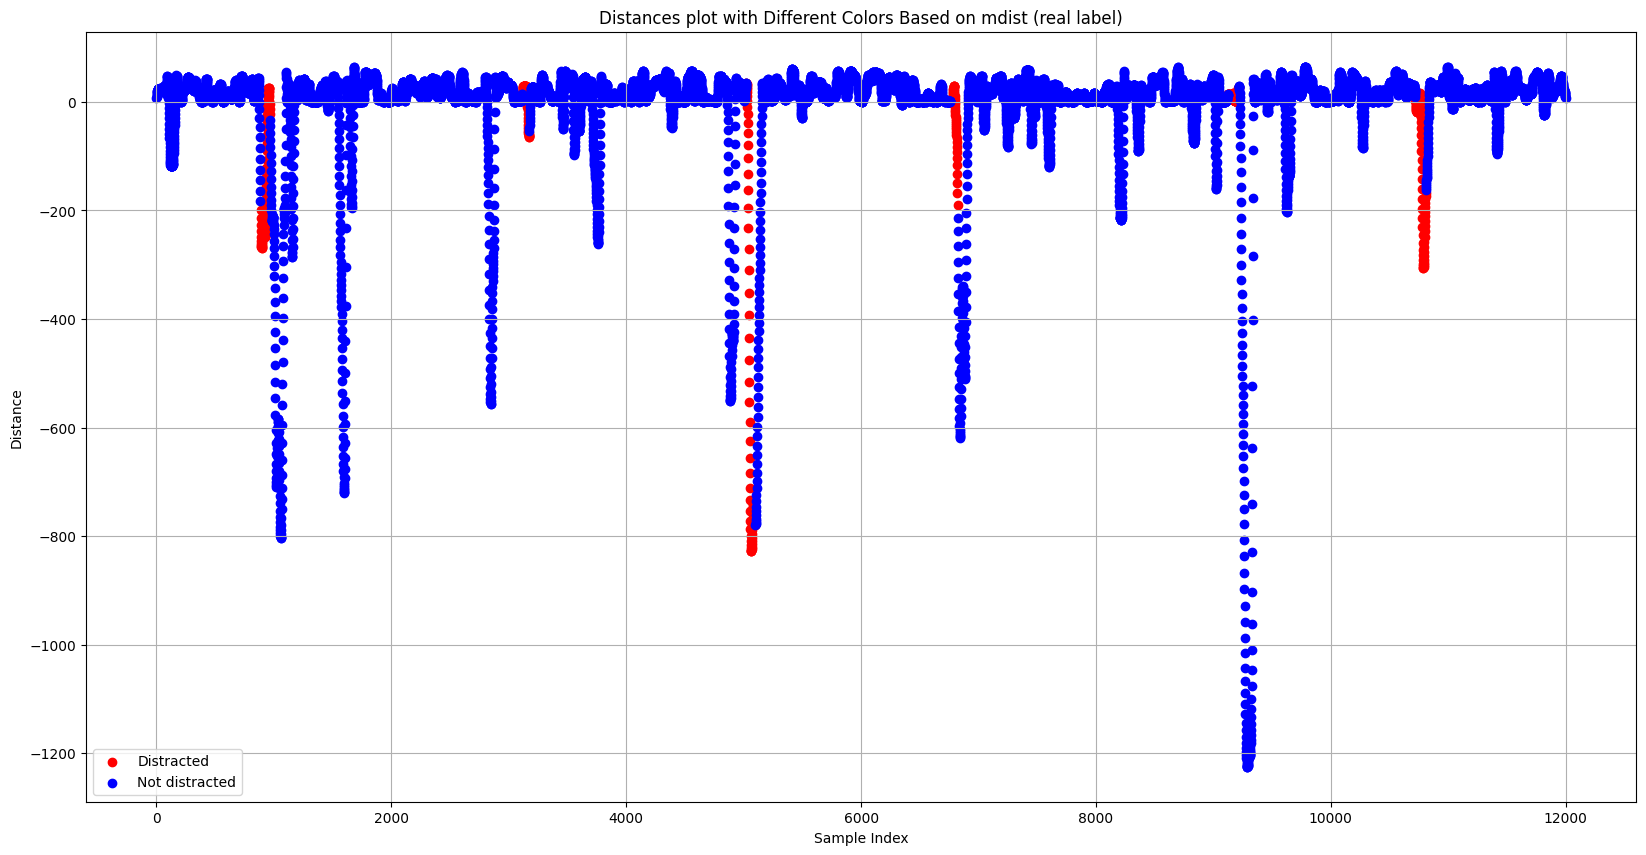

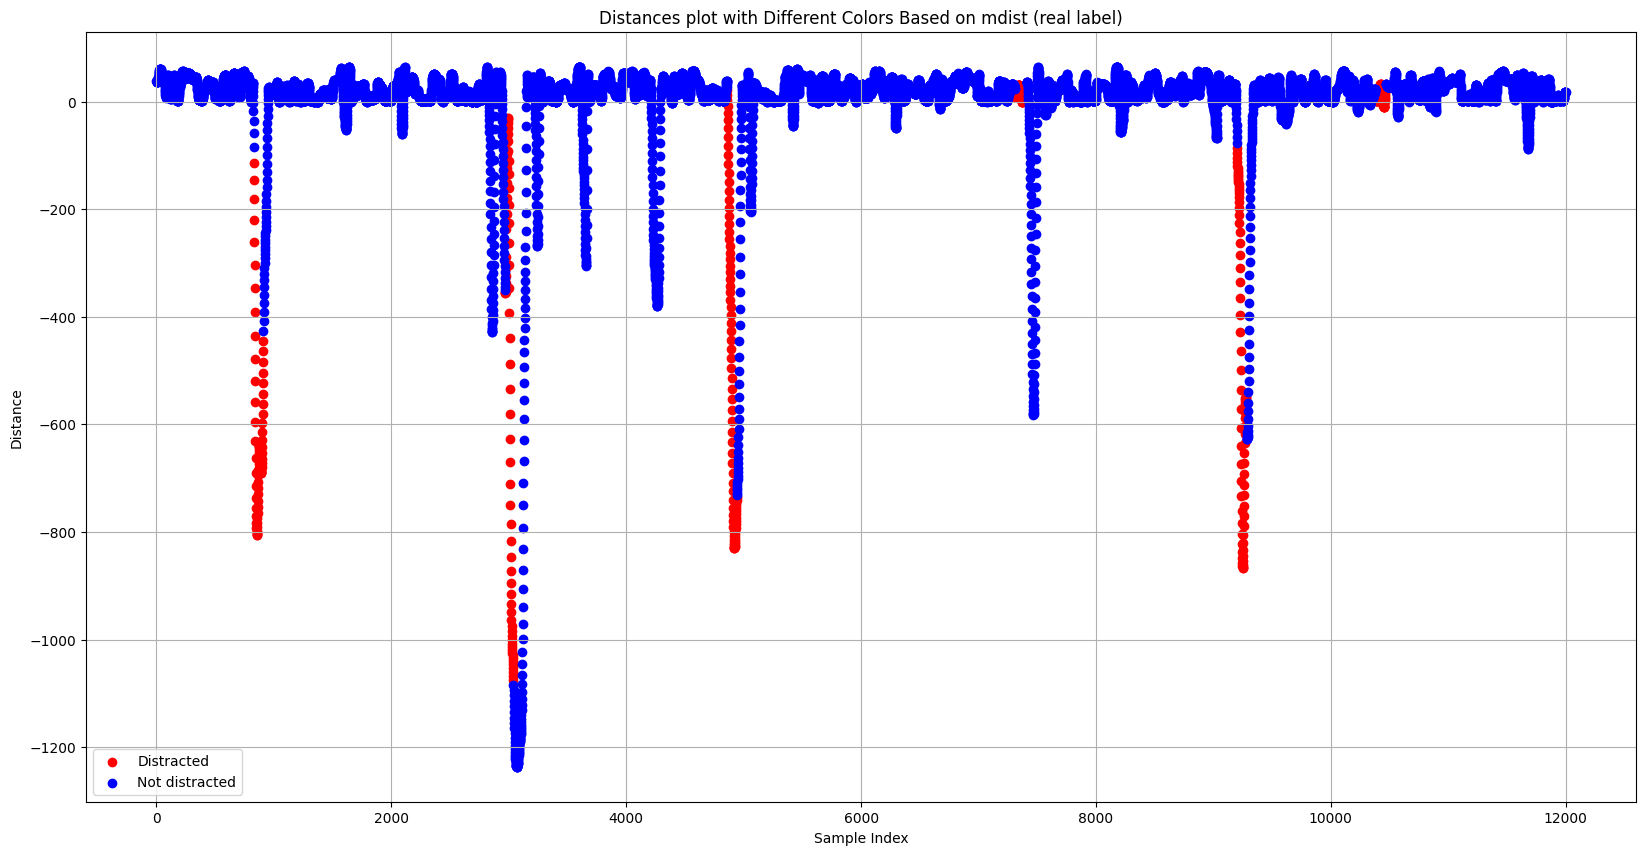

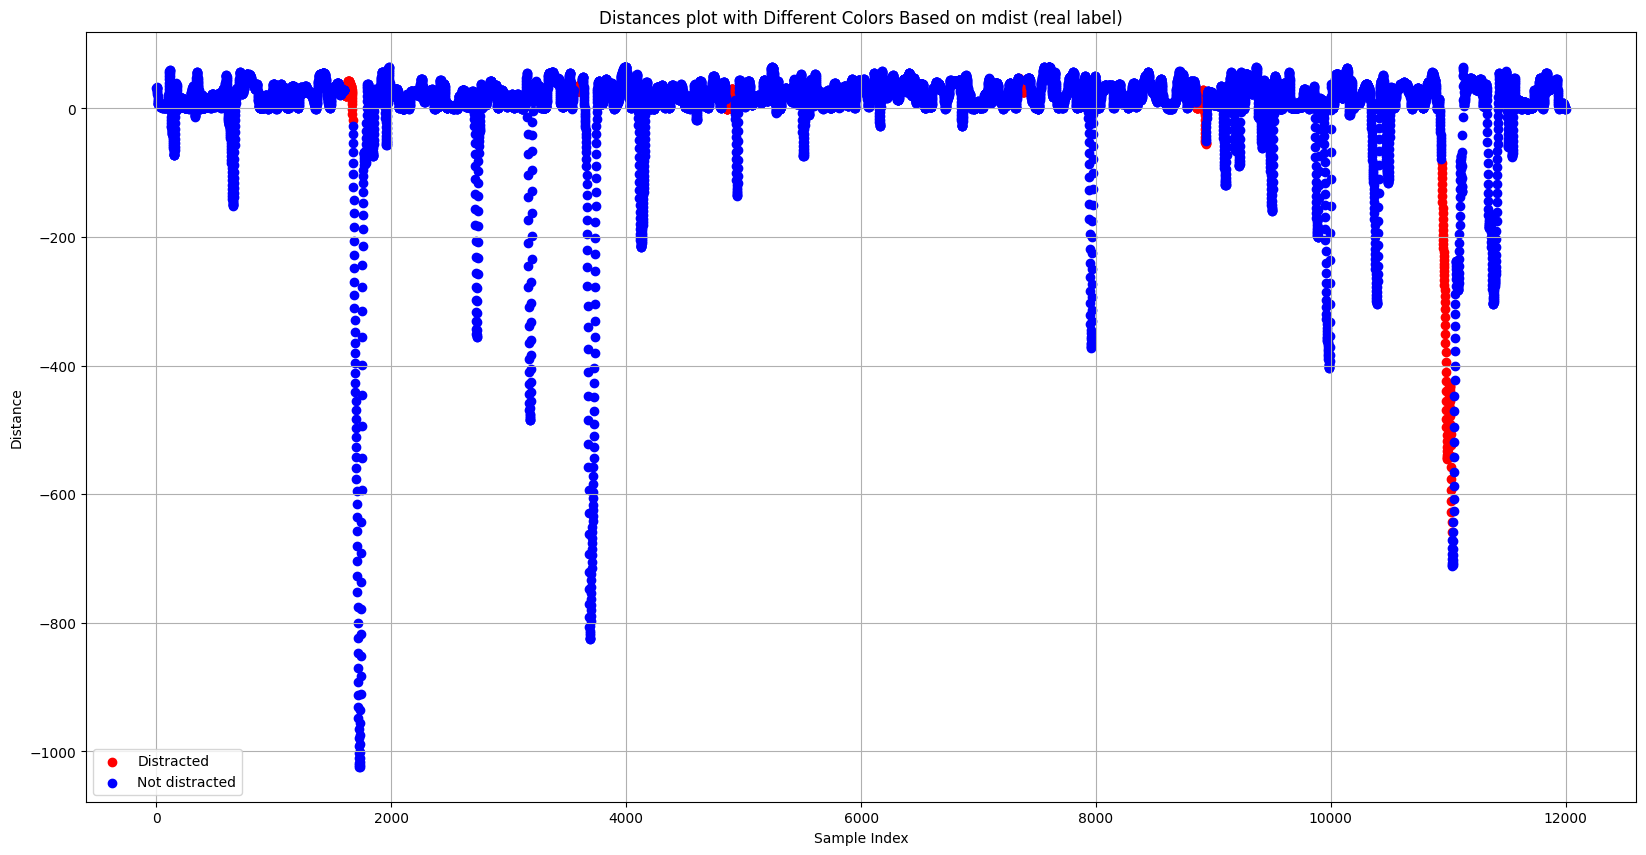

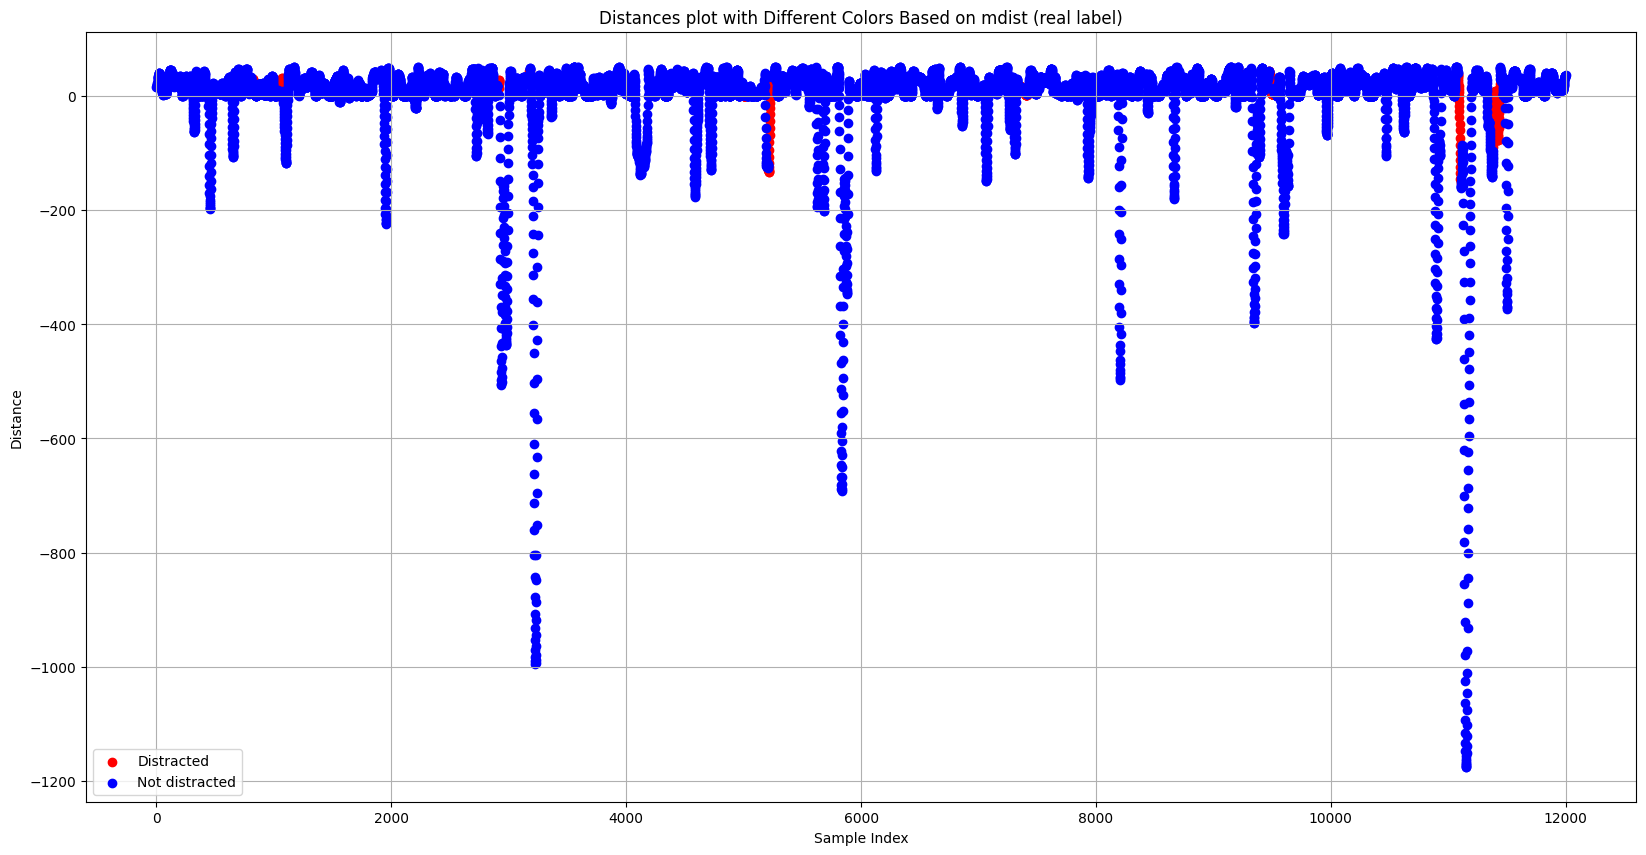

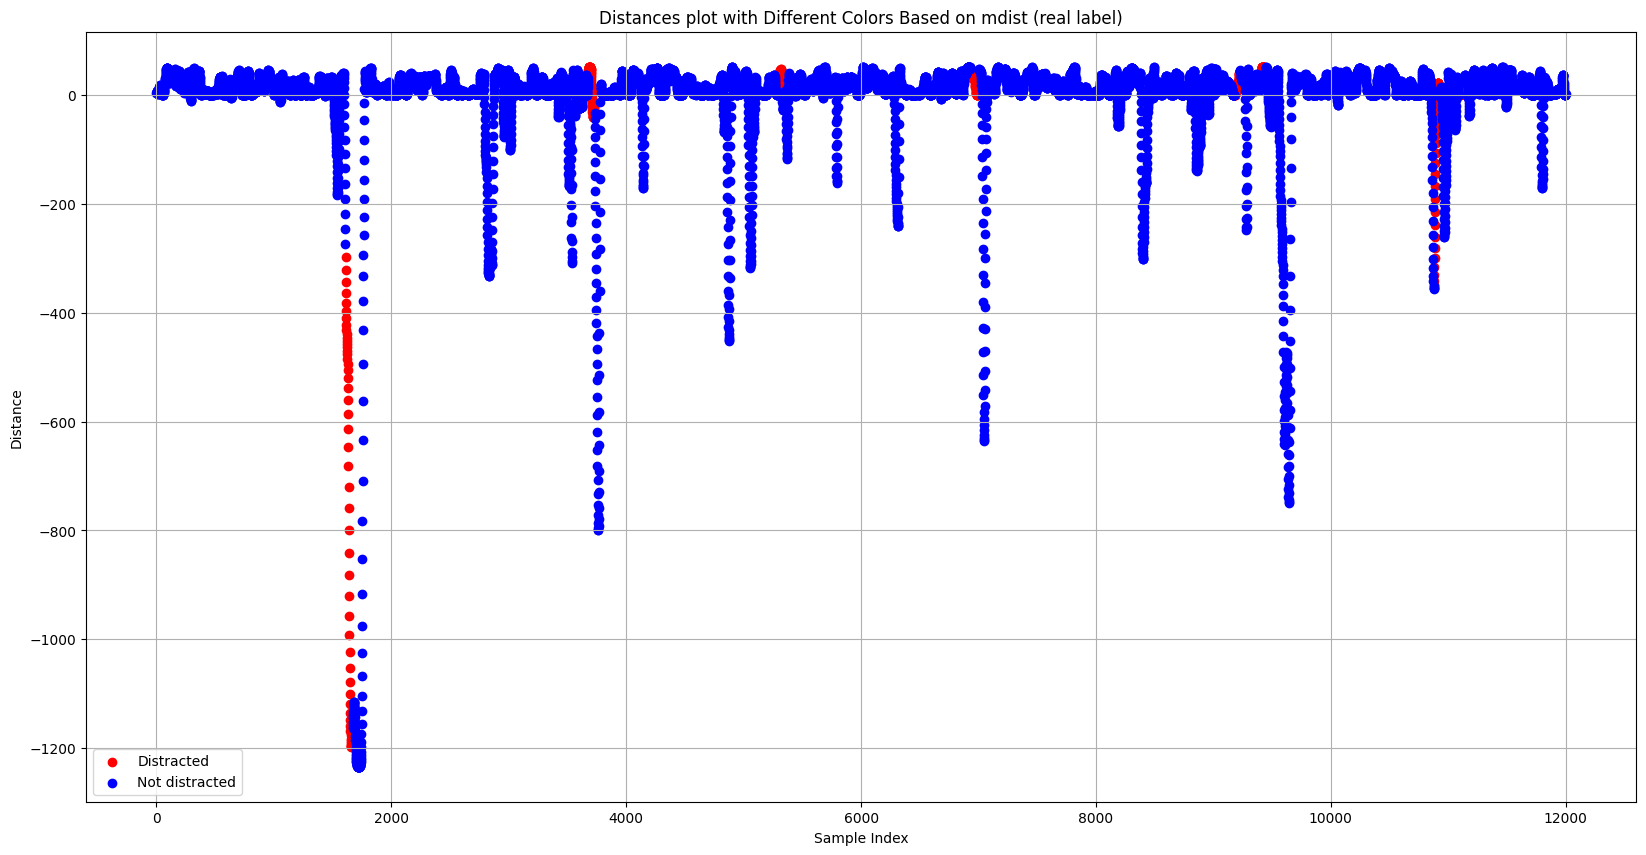

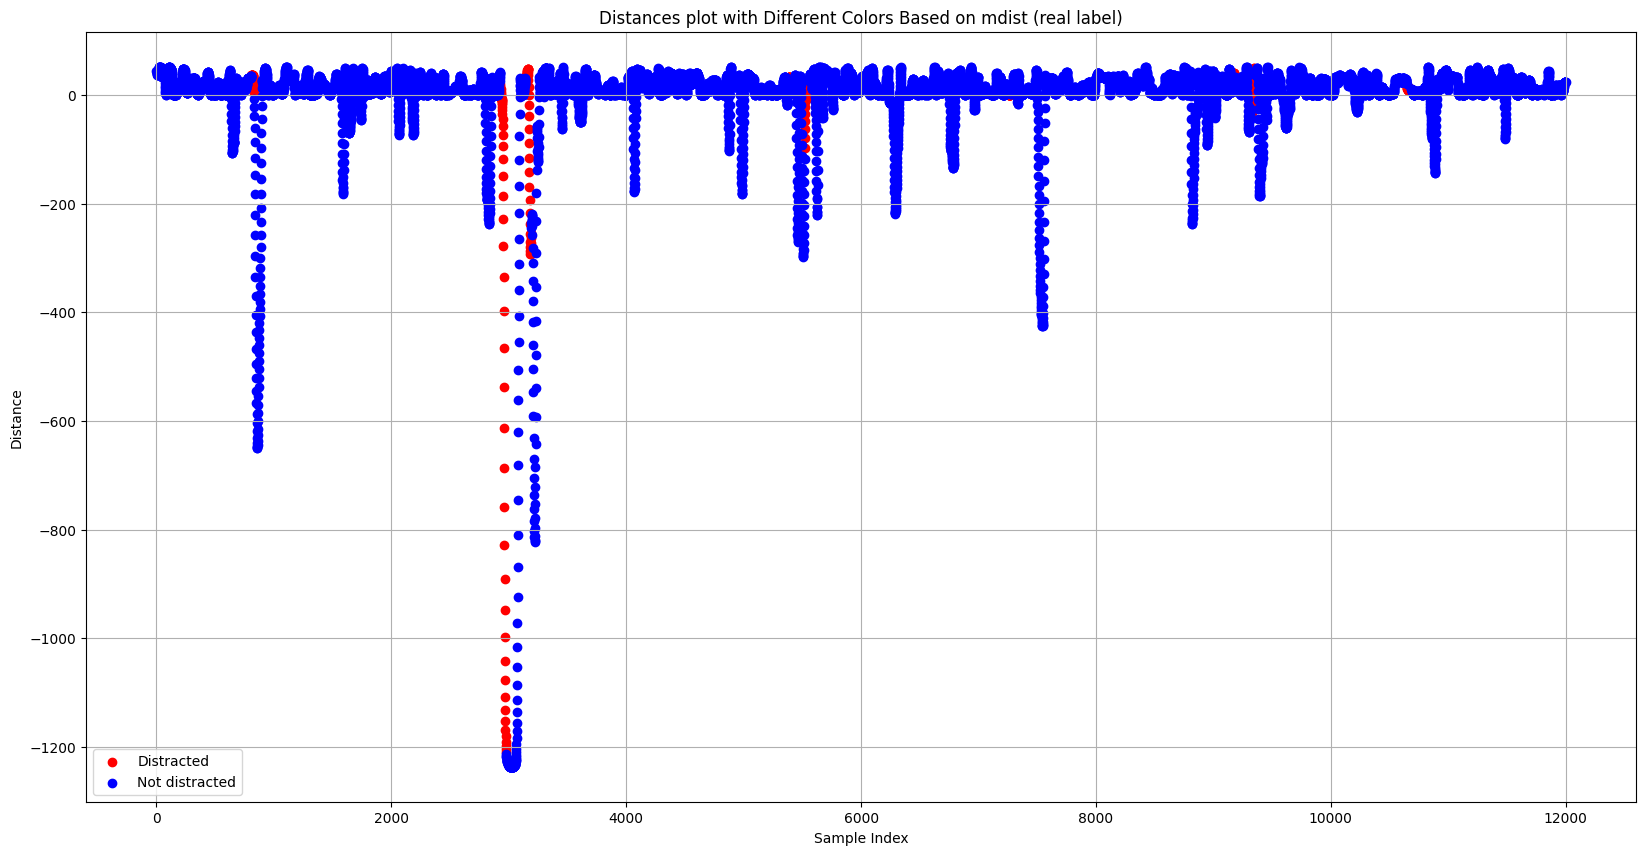

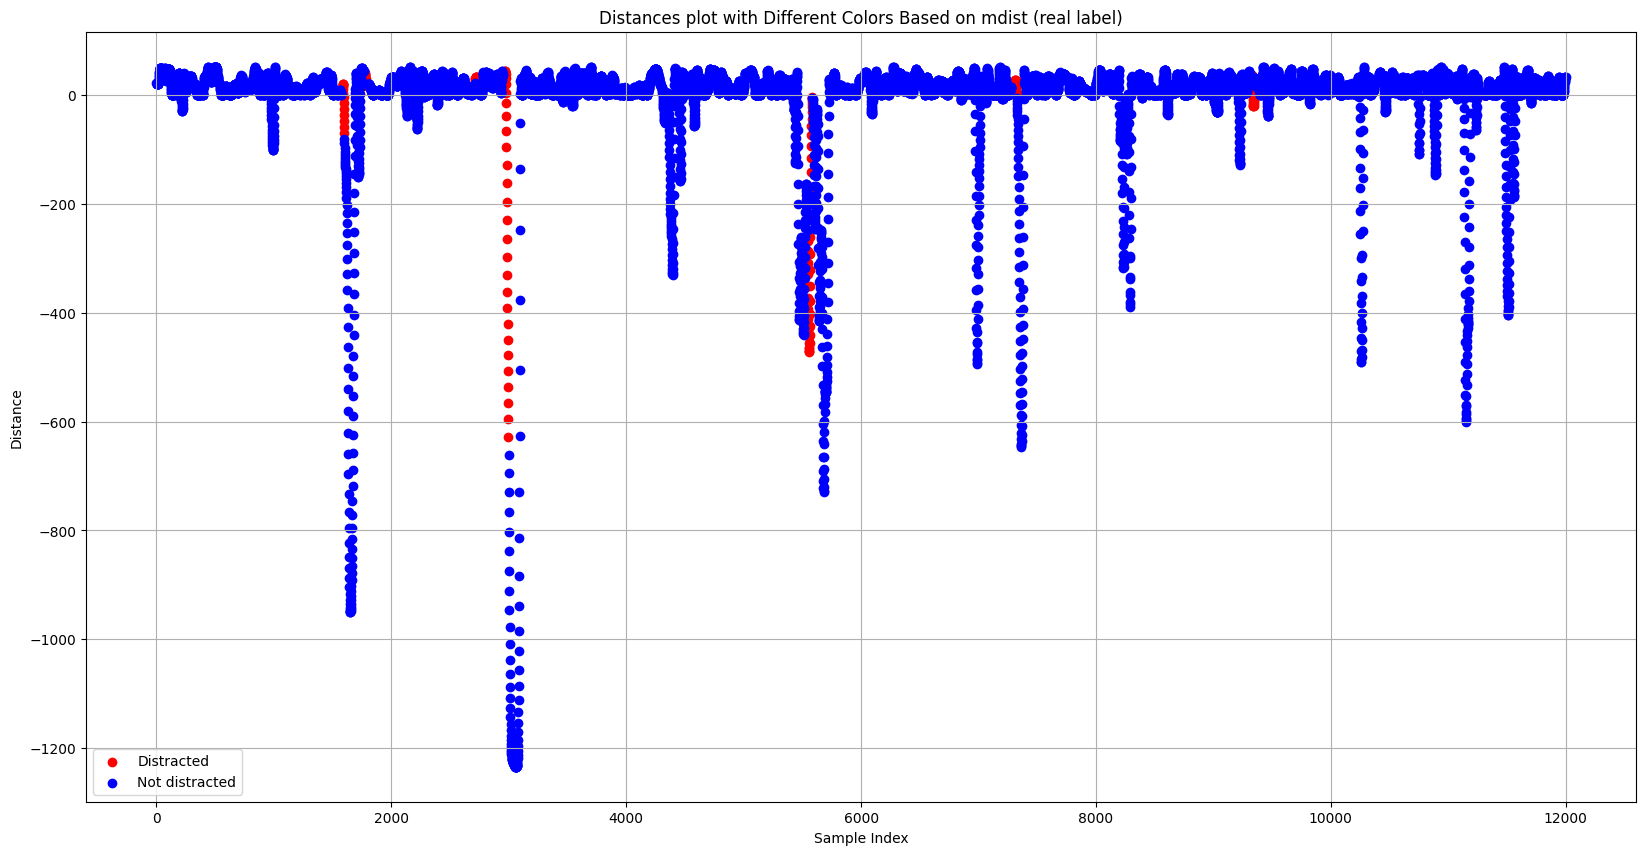

In [33]:
distances_ocsvm = np.loadtxt("distances_ocsvm.csv", delimiter=',')
 
for run_idx in range(40):
    tc_test_run = tc_test[:,run_idx]
    distances_ocsvm_run = distances_ocsvm[run_idx]
    plot_masked_signal(tc_test_run, distances_ocsvm_run)

In [34]:
def trigger_ocsvm_alarm(distances, threshold=-500):
    """
    Detect when 10 consecutive samples have distances below a specified threshold and trigger an alarm.
    
    Parameters:
        distances (numpy.ndarray): Array of distances from the decision boundary (signed distances).
    
    Returns:
        alarm_indices (list): List of starting indices for alarms where the condition is met.
    """

    # Initialize variables
    alarm_indices = []
    consecutive_count = 0
    
    # Iterate through the distances
    for i in range(len(distances)):
        if distances[i] < threshold:
            consecutive_count += 1
            # If 10 consecutive samples meet the condition, trigger the alarm
            if consecutive_count == 10:
                # Record the starting index of the alarm
                alarm_indices.append(i - 9)  # Subtract 9 to get the starting index of the 10-sample sequence
        else:
            # Reset the consecutive count if condition is broken
            consecutive_count = 0
    
    return alarm_indices

alarm_ocsvm_indices = []

for distances_ocsvm_run in distances_ocsvm:
    alarm_indices = trigger_ocsvm_alarm(distances_ocsvm_run, threshold=-500)
    print(f"Alarm indices: {alarm_indices}")
    alarm_ocsvm_indices.append(alarm_indices)

total_precision, total_recall, total_f1_score = compute_total_precision_recall_f1(real_changepoints, alarm_ocsvm_indices, tolerance=150)

Alarm indices: [4927, 5034, 6800, 10996]
Alarm indices: [9192, 10792]
Alarm indices: [3043, 5239, 7182, 8876]
Alarm indices: [2986, 5444, 7232]
Alarm indices: [5250, 8843, 8921, 10485]
Alarm indices: [5407, 7442, 9262, 10870]
Alarm indices: [2957, 7325, 8505, 10757]
Alarm indices: [1450, 2721, 3097, 4126, 4890, 10584]
Alarm indices: [1579, 3591, 7457]
Alarm indices: [1004, 3014, 6847, 7497, 10456, 11728]
Alarm indices: [5035, 6300, 6831, 6872, 9129]
Alarm indices: [1747, 3064, 5724, 7165, 9199, 11125]
Alarm indices: [1776, 3068, 5327, 9073, 10778]
Alarm indices: [1474, 3620, 4704, 11209]
Alarm indices: [1631, 3467, 4958, 11191]
Alarm indices: [3015, 5509, 8833, 10619]
Alarm indices: [6787]
Alarm indices: [4429, 5714, 5916, 6363, 9077, 9188, 10959]
Alarm indices: [1458, 3057, 10410]
Alarm indices: [1350, 6141, 8205, 8690, 10620]
Alarm indices: [1462, 3011, 3435, 3462, 6627, 8861, 10597]
Alarm indices: [3583, 5906, 10880]
Alarm indices: [1469, 3192, 3516, 6994, 10454, 10879]
Alarm indice

In [46]:
real_changepoints =  compute_changepoints(tc_test)

In [47]:
total_precision, total_recall, total_f1_score = compute_total_precision_recall_f1(real_changepoints, alarm_ocsvm_indices, tolerance=150)
print(f"precision: {np.round(total_precision,3)}, recall: {np.round(total_recall,3)}, f1 score: {np.round(total_f1_score,3)}")

precision: 0.738, recall: 0.41, f1 score: 0.5


In [48]:
total_precision, total_recall, total_f1_score = compute_total_precision_recall_f1(real_changepoints, whitebox_changepoints, tolerance=150)
print(f"precision: {np.round(total_precision,3)}, recall: {np.round(total_recall,3)}, f1 score: {np.round(total_f1_score,3)}")

NameError: name 'whitebox_changepoints' is not defined

In [39]:
# Define the heatmap function
def generate_heatmap(real_changepoints, distances_ocsvm, tolerances, thresholds):
    precision_grid = np.zeros((len(tolerances), len(thresholds)))
    recall_grid = np.zeros((len(tolerances), len(thresholds)))
    f1_score_grid = np.zeros((len(tolerances), len(thresholds)))

    # Iterate over tolerances and thresholds
    for i, tolerance in enumerate(tolerances):
        for j, threshold in enumerate(thresholds):
            alarm_ocsvm_indices = []

            # Generate alarms for the current threshold
            for distances_ocsvm_run in distances_ocsvm:
                alarm_indices = trigger_ocsvm_alarm(distances_ocsvm_run, threshold=threshold)
                alarm_ocsvm_indices.append(alarm_indices)

            # Compute precision, recall, F1 score
            total_precision, total_recall, total_f1_score = compute_total_precision_recall_f1(
                real_changepoints, alarm_ocsvm_indices, tolerance=tolerance
            )

            # Store the results in the grid
            precision_grid[i, j] = total_precision
            recall_grid[i, j] = total_recall
            f1_score_grid[i, j] = total_f1_score

    # Plot the heatmaps
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    
    sns.heatmap(precision_grid, xticklabels=thresholds, yticklabels=tolerances, ax=axs[0], cmap='Blues', annot=True, fmt=".2f")
    axs[0].set_title("Precision Heatmap")
    axs[0].set_xlabel("Threshold")
    axs[0].set_ylabel("Tolerance")

    sns.heatmap(recall_grid, xticklabels=thresholds, yticklabels=tolerances, ax=axs[1], cmap='Greens', annot=True, fmt=".2f")
    axs[1].set_title("Recall Heatmap")
    axs[1].set_xlabel("Threshold")
    axs[1].set_ylabel("Tolerance")

    sns.heatmap(f1_score_grid, xticklabels=thresholds, yticklabels=tolerances, ax=axs[2], cmap='Reds', annot=True, fmt=".2f")
    axs[2].set_title("F1 Score Heatmap")
    axs[2].set_xlabel("Threshold")
    axs[2].set_ylabel("Tolerance")

    plt.tight_layout()
    plt.show()

    return precision_grid, recall_grid, f1_score_grid

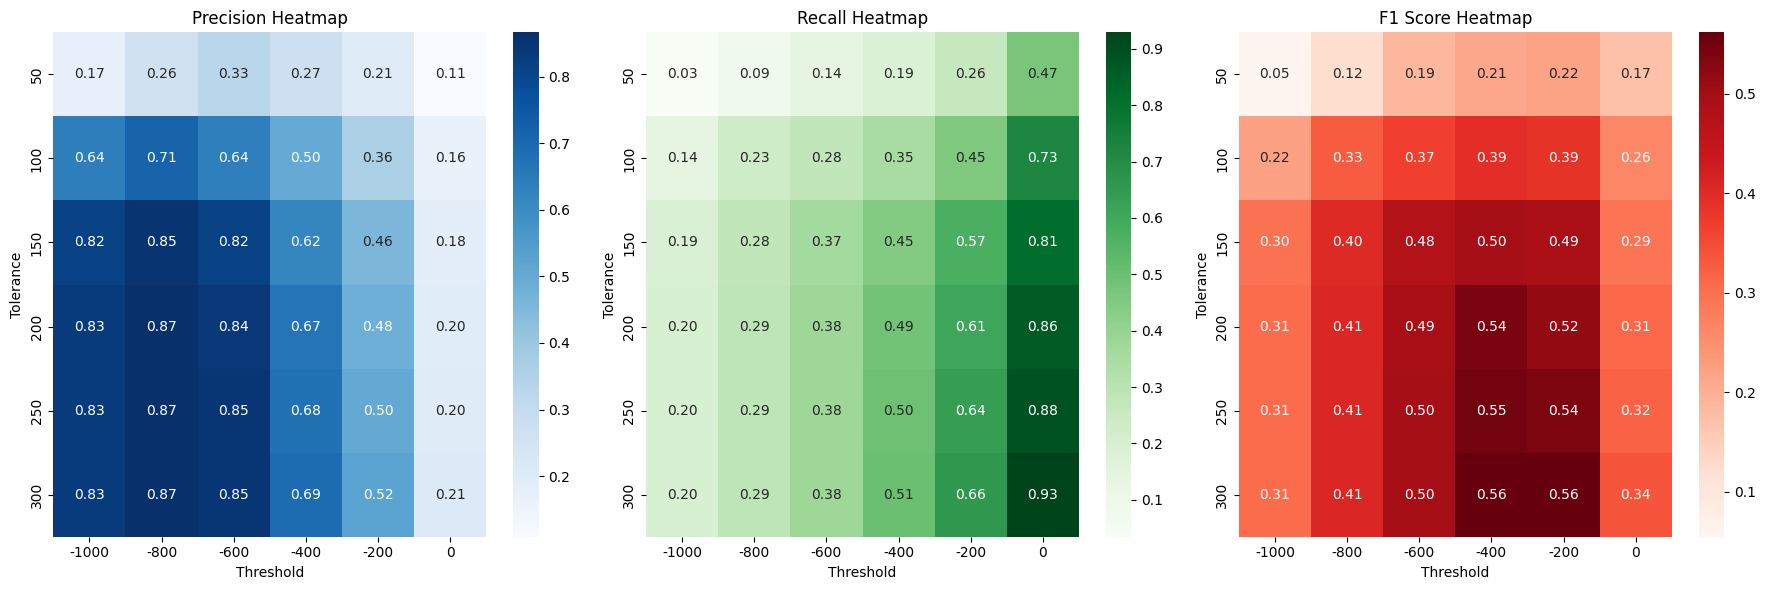

In [40]:
tolerances = np.arange(50, 301, 50)  # Tolerance values to test
thresholds = np.arange(-1000, 1, 200)  # Threshold values to test
kde_model_path = f'kde_person_{person_idx}.pkl'

# Assuming real_changepoints and distances_ocsvm are defined
precision_grid, recall_grid, f1_score_grid = generate_heatmap(
    real_changepoints, distances_ocsvm, tolerances, thresholds
)


In [1]:
# Match changepoints function
def compute_avg_delay_aux(true_changepoints, predicted_changepoints, tolerance=5):
    """
    Matches predicted changepoints to true changepoints within a tolerance window and computes metrics.
    """
    # Ensure inputs are lists
    true_changepoints = list(true_changepoints)
    predicted_changepoints = list(predicted_changepoints)

    true_matched = set()  # Tracks matched true changepoints
    pred_matched = set()  # Tracks matched predicted changepoints
    detection_delays = []  # Stores time differences between matched pairs

    for pred_cp in predicted_changepoints:
        for true_cp in true_changepoints:
            if abs(pred_cp - true_cp) <= tolerance and true_cp not in true_matched:
                true_matched.add(true_cp)
                pred_matched.add(pred_cp)
                detection_delays.append(abs(pred_cp - true_cp))  # Record delay
                break

    avg_detection_delay = sum(detection_delays) / len(detection_delays) if detection_delays else None

    return avg_detection_delay

def compute_avg_delay(true_changepoints, predicted_changepoints, tolerance=5):
    avg_detection_delays = []
    for idx, true_cp in enumerate(true_changepoints):
        avg_detection_delay = compute_avg_delay_aux(true_cp, predicted_changepoints[idx], tolerance=tolerance)
        avg_detection_delays.append(avg_detection_delay)

    return np.array(avg_detection_delays)


# Heatmap generation function
def generate_delay_grid(real_changepoints, predicted_distances, tolerances, thresholds):
    """
    Generates precision, recall, F1-score, and average delay metrics for each combination of tolerances and thresholds.
    """
    avg_delay_grid = np.full((len(tolerances), len(thresholds)), 0)  # Initialize average delay grid with 0

    for i, tolerance in enumerate(tolerances):
        for j, threshold in enumerate(thresholds):
            for run_idx, predicted_distances_run in enumerate(predicted_distances):
                predicted_changepoints = trigger_ocsvm_alarm(predicted_distances_run, threshold=threshold)
                
                avg_detection_delay = compute_avg_delay_aux(real_changepoints[run_idx], np.array(predicted_changepoints), tolerance=tolerance)
               
                if avg_detection_delay is not None:
                    avg_delay_grid[i, j] += avg_detection_delay  # Average delay for this combination

    return avg_delay_grid / len(predicted_distances)  # Return the average delay for each combination


# Assuming real_changepoints and distances_ocsvm are defined
avg_delay_grid = generate_delay_grid(
    real_changepoints, distances_ocsvm, tolerances, thresholds
)

# avg_delay_grid will contain the average delay for each tolerance-threshold pair

# print as a heatmap the average delay
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(avg_delay_grid, xticklabels=thresholds, yticklabels=tolerances, annot=True, fmt=".1f", cmap='viridis', ax=ax)
ax.set_title("Average Detection Delay Heatmap for the vanilla OCSVM")
ax.set_xlabel("Threshold")
ax.set_ylabel("Tolerance")
plt.show()


NameError: name 'real_changepoints' is not defined

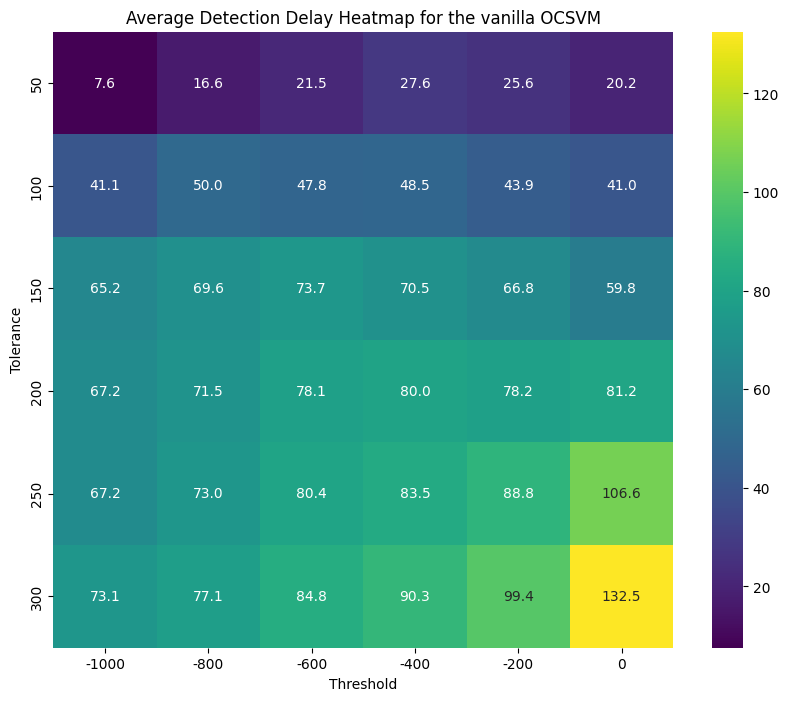

In [42]:
# print as a heatmap the average delay
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(avg_delay_grid, xticklabels=thresholds, yticklabels=tolerances, annot=True, fmt=".1f", cmap='viridis', ax=ax)
ax.set_title("Average Detection Delay Heatmap for the vanilla OCSVM")
ax.set_xlabel("Threshold")
ax.set_ylabel("Tolerance")
plt.show()

